<span style="font-family: 'Times New Roman', serif; font-size: 30px;">
<center>
MARKETING
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 24px;">
Required libraries
</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, f_oneway, chi2_contingency
from itertools import combinations
from pandas.api.types import is_numeric_dtype
from scipy.stats import pointbiserialr
from plottable import Table
from sklearn.preprocessing import MinMaxScaler
from itertools import product


<span style="font-family: 'Times New Roman', serif; font-size: 24px;">
Import Data
</span>

In [2]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\mini_project_s\marketing.csv")

<span style="font-family: 'Times New Roman', serif; font-size: 24px;">
Data Understanding
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

In this section, we explore the dataset to understand its structure, variables, and key characteristics. The goal of this project is to identify which user attributes and marketing channels contribute most to conversions. To achieve this, we review all variables, examine their types and distributions, and highlight the key performance indicators (KPIs) that will be used to evaluate user behavior and marketing effectiveness.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 15px;">

Customer ID = Numerical, Unique identifier assigned to each customer

Age = Numerical, Age of each customer (18 - 69 years old)

Gender = Categorical, Sex of each customer (Male, Female)

Income = Numerical, The money each person receives monthly

Campaign Channel = Categorical, The specific pathway used to deliver a marketing message to a target audience and achieve a specific marketing goal (Email, Referral, Social Media, PPC, SEO)

Campaign Type = Categorical, The overall approach or the specific strategy and channel used to achieve a goal (Consideration, Awareness, Retention, Conversion)

AdSpend = Numerical, The total amount of money a business invests in paid marketing campaigns to promote its products or services

Click Through Rate = Numerical, The rate of customer who click on an ad or link after seeing it(0 - 1)

Conversion Rate = Numerical, The rate of the number of desired action, such as purchases & etc. completed by a user to the total number of opportunities or interactions that user had (0 - 1)

Website Visits = Numerical, A single instance when a user accesses a website

Pages Per Visit = Numerical, The average number of pages a user views during a single visit

Time On Site (min) = Numerical, The average time a customer spends on the site per visit

Social Shares = Numerical, The number of times a content is shared by customer on social media platform

Email Opens = Numerical, The number of times a sent email is opened by customers

Email Clicks = Numerical, The number of times customer click on links inside an email

previous Purchases = Numerical, The number of times customer bought a product in past

Loyalty Points = Numerical, Reward given to customers for their purchases

Advertising Platform = Categorical, A digital Service that allows businesses to create, manage and track advertisements across different channels(IsConfid)

Advertising Tools = Categorical, Software, apps or platform used by marketers to create, manage, optimize and analyze advertising campaigns(ToolConfid)

Conversion = Categorical, The customer completed the desired action ( 0 or 1)
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 15px;">
A summary of the dataset and information provided is as follows:

In [3]:
data.head(30)

CustomerID  Age  Gender    Income CampaignChannel   CampaignType  \
0        13300   36  Female   47648.0           Email  Consideration   
1        10429   32  Female   47491.0           Email  Consideration   
2        10557   52    Male   83830.0        Referral      Awareness   
3        12602   52    Male  116342.0    Social Media  Consideration   
4         8592   58  Female   90994.0           Email      Retention   
5         9926   28    Male       NaN             PPC     Conversion   
6         8926   25    Male   45493.0             SEO      Retention   
7         8934   44    Male   56253.0             PPC  Consideration   
8        14022   33  Female  127318.0    Social Media     Conversion   
9        10706   59  Female  108909.0        Referral     Conversion   
10       15972   33  Female  148646.0        Referral      Awareness   
11        8375   45  Female   96023.0    Social Media      Retention   
12       11263   23    Male   78507.0        Referral     Conversion   
13        9861   48  Female  108487.0    Social Media      Retention   
14       12139   55  Female  134063.0             PPC     Conversion   
15       13151   42  Female  131157.0             PPC      Awareness   
16        8553   49    Male   47260.0             PPC  Consideration   
17       15950   50  Female   51308.0             PPC      Retention   
18       14378   21  Female   60533.0           email      Awareness   
19       10817   45  Female  116815.0             PPC     Conversion   
20       14751   36  Female  140992.0             SEO     Conversion   
21       11667   39  Female   33635.0             PPC     Conversion   
22       15688   44  Female   38989.0             PPC     Conversion   
23       15131   62    Male  111530.0             NaN     Conversion   
24       12033   31  Female  123229.0           Email      Awareness   
25        9562   62    Male   65874.0    Social Media      Awareness   
26        9905   44    Male  124150.0        Referral     Conversion   
27       14820   60  Female  129870.0           email     Conversion   
28       14634   42  Female  115446.0             PPC      Awareness   
29       10986   69  Female  110382.0        Referral      Retention   

               AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0    893.7554921892273          0.132078        0.198063             38   
1    7330.251375088103          0.120810        0.088416             27   
2    7720.360685483039          0.125472        0.082197             35   
3     8337.45315727269          0.158739        0.089032             25   
4    5273.098832292671          0.226054        0.099792             13   
5    6140.692084655652          0.290509        0.061431              8   
6    9580.333882970706          0.181050        0.105205              7   
7    7257.788852501013          0.059053        0.139160             14   
8   1893.8409330689187          0.061941        0.111206              5   
9    526.0384147362745          0.035578        0.103091             25   
10  1436.3711882043283          0.230675        0.148815             33   
11   7824.310334802829          0.245740        0.173919             29   
12           $8,849.97          0.151560        0.173417             27   
13   656.0450289941009          0.080642        0.045882              5   
14   4705.901372073763          0.013709        0.029145             38   
15   4120.373582525753          0.237322        0.084651             39   
16   5800.875973245347          0.191573        0.079329             28   
17   5925.401061982387          0.087390        0.035925             13   
18   285.5374706897695          0.113687        0.072248             32   
19  2202.9425760429467          0.272130        0.068151             46   
20   5531.017384041029          0.109784        0.029514             42   
21   722.2476074615228          0.196535        0.064140             20   
22   707.2521289045945          0.285231      

In [4]:
print(f'This Data contains {data.shape[0]} rows')
print(f'This Data have {data.shape[1]} variables')

This Data contains 2010 rows
This Data have 20 variables


In [5]:
print(f'This data have {data.duplicated().sum()} duplicate rows')

This data have 0 duplicate rows


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           2010 non-null   int64  
 1   Age                  2010 non-null   int64  
 2   Gender               2010 non-null   object 
 3   Income               1931 non-null   float64
 4   CampaignChannel      1856 non-null   object 
 5   CampaignType         2010 non-null   object 
 6   AdSpend              2010 non-null   object 
 7   ClickThroughRate     2010 non-null   float64
 8   ConversionRate       2010 non-null   float64
 9   WebsiteVisits        2010 non-null   int64  
 10  PagesPerVisit        2010 non-null   float64
 11  TimeOnSite           1931 non-null   float64
 12  SocialShares         2010 non-null   int64  
 13  EmailOpens           2010 non-null   int64  
 14  EmailClicks          2010 non-null   int64  
 15  PreviousPurchases    2010 non-null   i

In [7]:
columns = list(data.columns)

In [8]:
categorical_col = ['Gender','CampaignChannel','CampaignType','AdvertisingPlatform','AdvertisingTool']
categorical_col

['Gender',
 'CampaignChannel',
 'CampaignType',
 'AdvertisingPlatform',
 'AdvertisingTool']

In [9]:
numerical_col = list(set(columns)-set(categorical_col))
numerical_col

['CustomerID',
 'TimeOnSite',
 'ConversionRate',
 'PagesPerVisit',
 'Age',
 'WebsiteVisits',
 'ClickThroughRate',
 'Conversion',
 'AdSpend',
 'EmailClicks',
 'SocialShares',
 'EmailOpens',
 'Income',
 'PreviousPurchases',
 'LoyaltyPoints']

In [10]:
data['AdSpend'] = data['AdSpend'].str.replace('[,\$]', '', regex=True)
data['AdSpend'] = pd.to_numeric(data['AdSpend'], errors='coerce')
data.describe().T

count          mean            std           min  \
CustomerID         2010.0  11987.962687    2322.660774   8003.000000   
Age                2010.0     43.010448      14.740003     18.000000   
Income             1931.0  96320.667530  108713.012820  20014.000000   
AdSpend            2010.0   5028.022186    2788.010340    100.668227   
ClickThroughRate   2010.0      0.156358       0.083178      0.010514   
ConversionRate     2010.0      0.102761       0.054845      0.010059   
WebsiteVisits      2010.0     24.638806      14.275219      0.000000   
PagesPerVisit      2010.0      5.492500       2.620329      1.001882   
TimeOnSite         1931.0      7.624579       4.253885      0.501684   
SocialShares       2010.0     49.002985      28.960985      0.000000   
EmailOpens         2010.0      9.410945       5.740643      0.000000   
EmailClicks        2010.0      4.529851       3.262584      0.000000   
PreviousPurchases  2010.0      4.539801       2.898079      0.000000   
LoyaltyPoints      2010.0   2520.113433    1435.928358      1.000000   
Conversion         2010.0      0.876617       0.328958      0.000000   

                            25%           50%            75%           max  
CustomerID          9927.000000  12048.500000   13983.250000  1.599700e+04  
Age                   30.000000     43.000000      55.000000  6.900000e+01  
Income             53631.000000  86481.000000  117831.500000  1.470150e+06  
AdSpend             2639.654462   5023.946852    7362.637876  9.997348e+03  
ClickThroughRate       0.084726      0.156852       0.229806  2.995574e-01  
ConversionRate         0.054680      0.101575       0.148428  1.999947e-01  
WebsiteVisits         13.000000     25.000000      37.000000  4.900000e+01  
PagesPerVisit          3.134389      5.446222       7.758085  9.997134e+00  
TimeOnSite             3.866825      7.575437      11.464522  1.499280e+01  
SocialShares          24.250000     49.000000      74.000000  9.900000e+01  
EmailOpens             5.000000      9.000000      14.000000  1.900000e+01  
EmailClicks            2.000000      4.000000       7.000000  3.200000e+01  
PreviousPurchases      2.000000      5.000000       7.000000  9.000000e+00  
LoyaltyPoints       1287.000000   2527.500000    3752.000000  4.999000e+03  
Conversion             1.000000      1.000000       1.000000  1.000000e+00

In [11]:
missing_data = data.isnull().sum()
missing_data

CustomerID               0
Age                      0
Gender                   0
Income                  79
CampaignChannel        154
CampaignType             0
AdSpend                  0
ClickThroughRate         0
ConversionRate           0
WebsiteVisits            0
PagesPerVisit            0
TimeOnSite              79
SocialShares             0
EmailOpens               0
EmailClicks              0
PreviousPurchases        0
LoyaltyPoints            0
AdvertisingPlatform      0
AdvertisingTool          0
Conversion               0
dtype: int64

In [12]:
def categorical_summary(data, cols):
    summary = pd.DataFrame(columns=['Column', 'Counts', 'Mode', 'Unique'])

    for col in cols:
       summary = pd.concat([summary, pd.DataFrame({
          'Column': [col],
          'Counts': [data[col].count()],
          'Mode': [data[col].mode().tolist()],
          'Unique': [data[col].unique().tolist()]
          })
        ], ignore_index=True)
    return summary
   

In [13]:
categorical_summary(data, categorical_col)

Column Counts          Mode  \
0               Gender   2010      [Female]   
1      CampaignChannel   1856         [PPC]   
2         CampaignType   2010  [Conversion]   
3  AdvertisingPlatform   2010    [IsConfid]   
4      AdvertisingTool   2010  [ToolConfid]   

                                              Unique  
0                                     [Female, Male]  
1  [Email, Referral, Social Media, PPC, SEO, emai...  
2  [Consideration, Awareness, Retention, Conversion]  
3                                         [IsConfid]  
4                                       [ToolConfid]

<span style="font-family: 'Times New Roman', serif; font-size: 15px;">
The data for Advertising Platform and Advertising Tool are confidential and therefore cannot be used in the exploratory data analysis (EDA).
</span>


<span style="font-family: 'Times New Roman', serif; font-size: 24px;">
<center>
Univariate Analysis
</span>

In [14]:
#plot for univariate analysis_ Numerical
def hist_plot(col, ax):
    sns.histplot(data=data, x=col, kde=True, color='darkcyan', ax=ax)
    ax.set_title(f'Histogram & KDE of {col}', fontweight='bold')
    ax.set_xlabel(col, fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

def box_plot(col, ax):
    sns.boxplot(data=data, x=col, color='cornflowerblue', ax=ax,
                medianprops=dict(color='orangered', linewidth=1))
    ax.set_title(f'Boxplot of {col}', fontweight = 'bold')
    ax.set_xlabel(col, fontsize = 16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

def all_num_plot(col):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    box_plot(col, ax[0])
    hist_plot(col, ax[1])
    plt.tight_layout()
    plt.show()
    

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Count of Males and Females
</span>

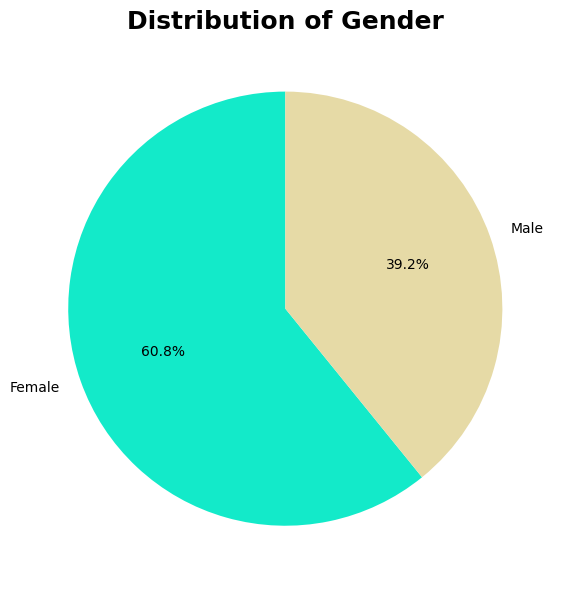

In [15]:
def pie_chart(data, column):
    
    colors = ['#13EAC9', '#E6DAA6', '#FF81C0', '#76FF7B', '#FF796C']  

    plt.figure(figsize=(6, 6))
 
    channel_counts = data[column].value_counts()
    channel_counts.plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Distribution of {column}', fontweight = 'bold', fontsize = 18)
    plt.ylabel('')  
    plt.tight_layout()
    plt.show()

pie_chart(data, 'Gender')

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Age Analysis
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


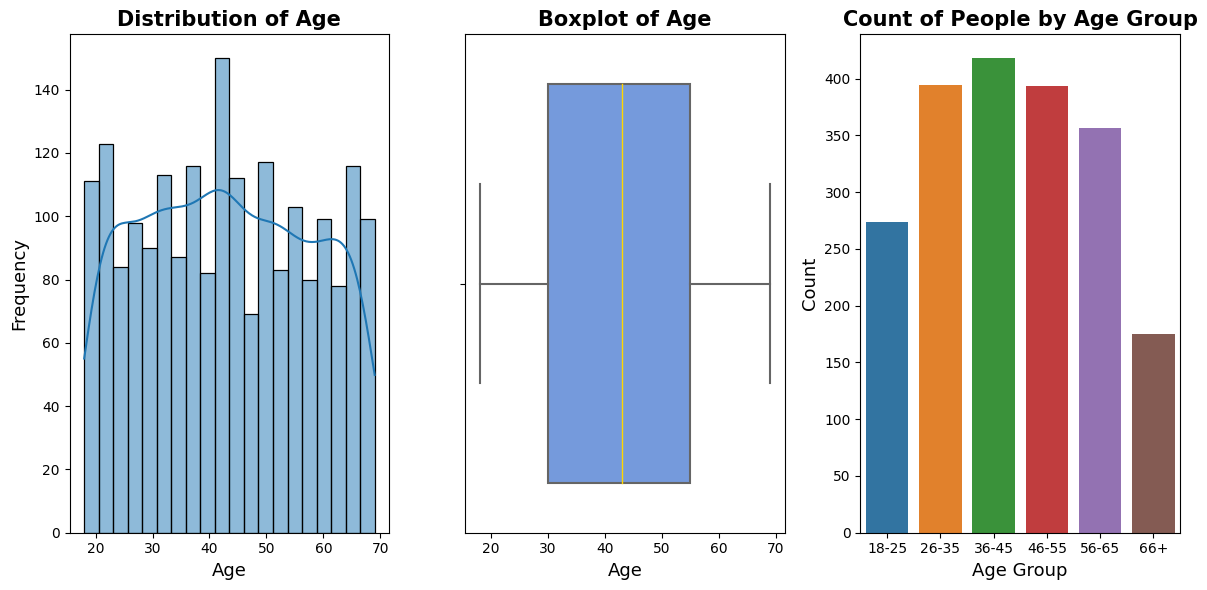

In [16]:
def age_analysis(data):
    plt.figure(figsize=(12, 6))
    #Histogram
    plt.subplot(1, 3, 1)  
    sns.histplot(data['Age'], kde=True, bins=20)
    plt.title('Distribution of Age', fontweight = 'bold', fontsize = 15)
    plt.xlabel('Age', fontsize = 13)
    plt.ylabel('Frequency', fontsize = 13)
    
    #Box Plot
    plt.subplot(1, 3, 2)  
    sns.boxplot(x=data['Age'], color='cornflowerblue', medianprops=dict(color='gold', linewidth=1))
    plt.title('Boxplot of Age', fontweight = 'bold', fontsize = 15)
    plt.xlabel('Age', fontsize = 13)
    
    #Count Plot
    bins = [18, 25, 35, 45, 55, 65, 100]
    labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
    data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
    
    plt.subplot(1, 3, 3)  
    sns.countplot(x='Age Group', data=data)
    plt.title('Count of People by Age Group', fontweight = 'bold', fontsize = 15)
    plt.xlabel('Age Group', fontsize = 13)
    plt.ylabel('Count', fontsize = 13)
    
    plt.tight_layout()
    plt.show()

age_analysis(data)


<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

1. Histogram (Distribution of Age):

The age distribution appears generally bell-shaped, indicating a normal distribution of ages.

The KDE (Kernel Density Estimate) curve suggests that the majority of individuals are concentrated in the middle age range (around 30 to 45 years).

There are fewer individuals in the younger and older age groups.

Overall, the data suggests a distribution where more individuals are concentrated in the middle ages, and fewer are in the extreme age ranges.

2. Boxplot (Boxplot of Age):

The median age is around 40 years, as indicated by the Gold line in the middle of the box.

The interquartile range (IQR), between the first quartile (25%) and the third quartile (75%), shows that most data points fall between approximately 30 and 50 years.

The whiskers extend from around 20 to 60 years, indicating the spread of the age data.

There are no apparent outliers, as the plot does not show any points outside of the whiskers.

3. Bar Plot (Count of People by Age Group):

The chart reveals that the majority of individuals are in the 26-35 and 36-45 age groups, which have the highest counts.

The 18-25 and 56-65 age groups have fewer individuals.

The 66+ group has the least number of people, which might indicate a lower population in this age group.

The distribution of individuals in the middle age groups (around 30-50 years) shows the highest concentration.

There are no significant outliers in the data.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Income Analysis
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


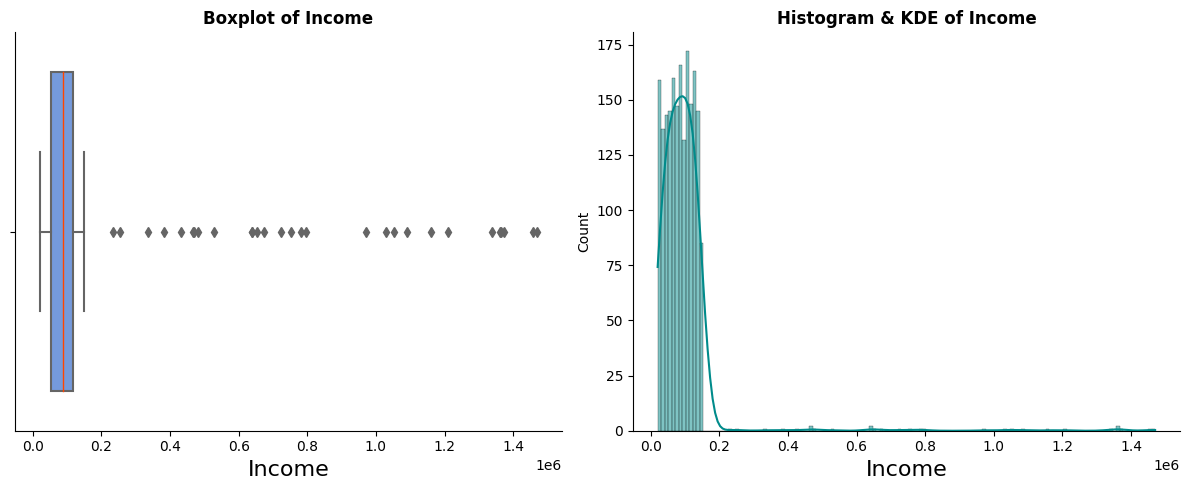

In [17]:
all_num_plot('Income')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">
Annual income of customers (users):
Based on the histogram and the density plot, the income distribution is strongly positively skewed (right-skewed). This means:

Most individuals in this dataset have low incomes.

A small number of people have very high incomes, which pulls the distribution to the right.

The mean income ($95,933) is higher than the median ($86,481). This is one of the main signs of positive skewness, because very high incomes pull the mean upward.

The standard deviation ($106,571) is very large, indicating high dispersion and the presence of outliers. As the boxplot shows, the income data contain many outliers—extremely high and unusual incomes that are far from the rest of the data and clearly visible as separate points. These outliers are the individuals who stretch the distribution and increase the mean.

In summary: most customers in your dataset have low or moderate incomes, and a limited number have very high incomes that appear as outliers.

At the end of the notebook, we normalize the distribution of the values using a logarithmic transformation and then plot the charts again.
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


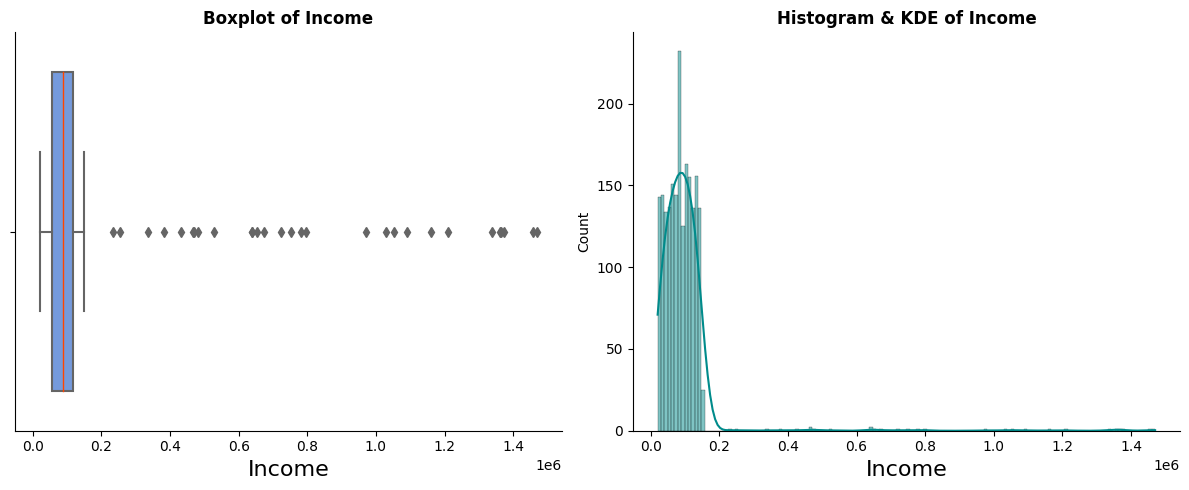

In [18]:
data['Income'] = data['Income'].fillna(data['Income'].median())
all_num_plot('Income') 

In [19]:
def shapiro_wilk(col):
    stat, p_value = stats.shapiro(data[col])
    return(stat, p_value)

shapiro_wilk('Income')

(0.34738758372969825, 1.2489572014136946e-64)

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">
The value of 0.35 indicates that the data is significantly deviating from a normal distribution. The Shapiro-Wilk test statistic typically ranges from 0 to 1, and the closer it is to 0, the greater the deviation from a normal distribution.

Since the p-value is less than the typical significance level of 0.05, the null hypothesis (that the data follows a normal distribution) is rejected. Therefore, it can be concluded that the "Income" data does not follow a normal distribution.

</span>

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Log Transformation
</span>

In [20]:
data['Income_log'] = np.log(data['Income'] + 1)
data['Income_log']

0       10.771617
1       10.768317
2       11.336558
3       11.664298
4       11.418560
          ...    
2005    11.393534
2006    11.607290
2007    11.581051
2008    10.386562
2009    11.030590
Name: Income_log, Length: 2010, dtype: float64

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


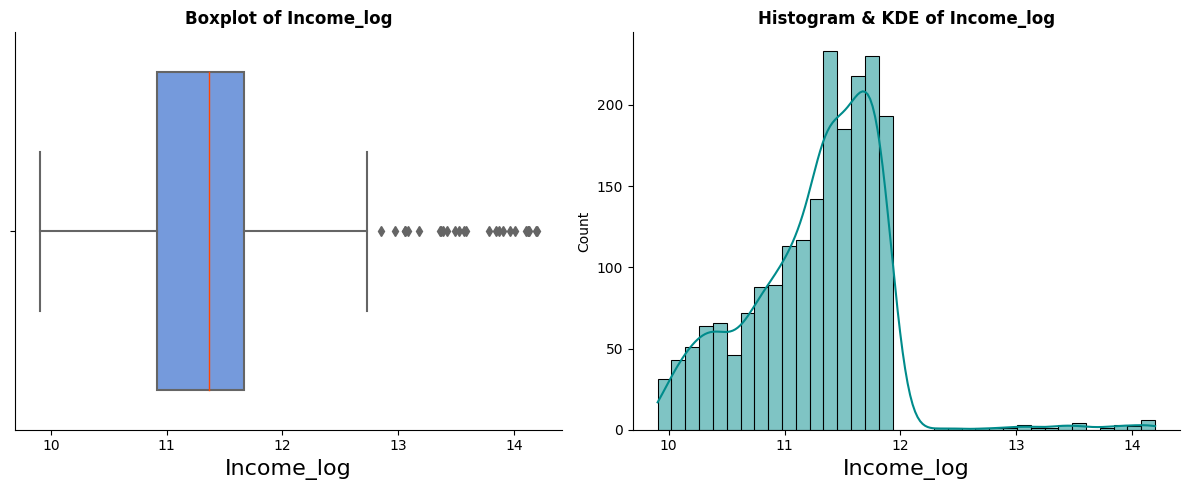

In [21]:
all_num_plot('Income_log')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">
The logarithmic transformation applied to the Income column has, as the charts show, produced a significant improvement in the data distribution. Based on the new histogram and density plot, the distribution has shifted from being positively skewed (right-skewed) to one that is close to a normal distribution. This means:

The data are more symmetric and follow a single central peak.

The data are no longer heavily compressed on the left, and the long right tail has largely disappeared.

The new boxplot clearly shows a substantial reduction in the number of outliers.

The outliers that previously appeared as scattered points stretching to the end now fall within a much narrower range.

This improvement is due to the nature of the logarithmic transformation, which compresses the spacing between large values and thus reduces the influence of extremely high observations.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Shapiro-Wilk Test Again
</span>

In [22]:
shapiro_wilk('Income_log')

(0.9173875400691993, 8.434958761901461e-32)

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">
The Shapiro-Wilk test statistic is close to 1, which indicates that the data is close to a normal distribution. The closer the test statistic is to 1, the more the data follows a normal distribution.

Since the p-value is less than 0.05, the null hypothesis (that the data follows a normal distribution) is rejected.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Campaign Channel
</span>


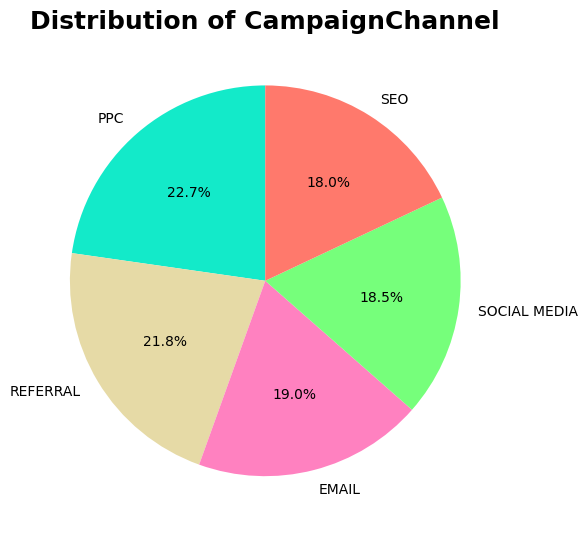

In [23]:
data['CampaignChannel'] = data['CampaignChannel'].str.upper()

pie_chart(data, 'CampaignChannel')  

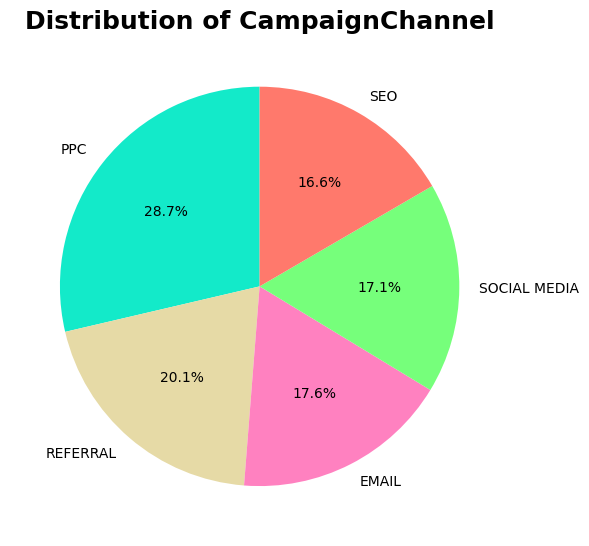

In [24]:
data['CampaignChannel'] = data['CampaignChannel'].fillna(data['CampaignChannel'].mode()[0])
pie_chart(data,'CampaignChannel')  

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Campaign Type
</span>

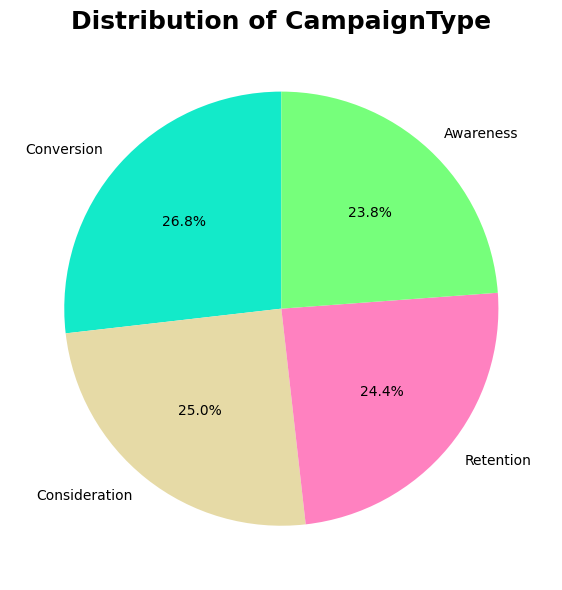

In [25]:
pie_chart(data, 'CampaignType')

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Ad Spend
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


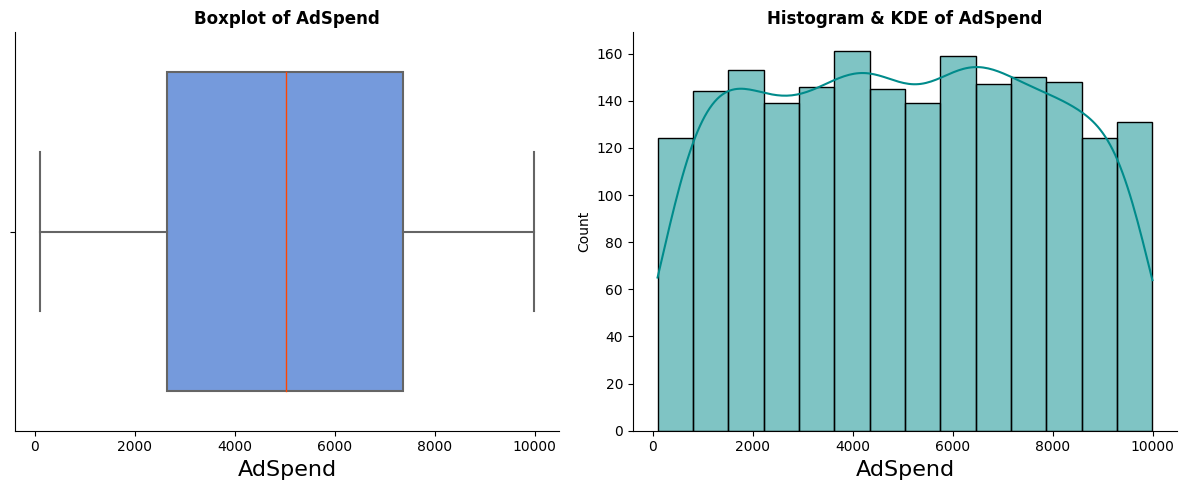

In [26]:
#AdSpend
all_num_plot('AdSpend')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">
As we can see there are no outlires, median is close to center, values are(almost) pretty evenly distributed and flat(uniform), no obvious skewes and no missing values.

We don't need to change anything, it's clean enough.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Click Through Rate
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


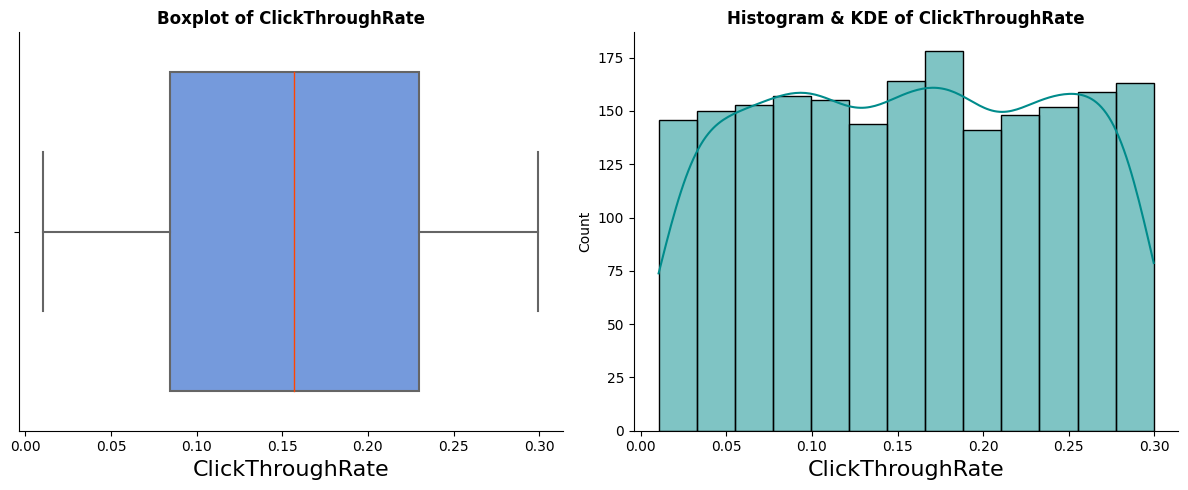

-0.011576760986007998


In [27]:
# ClickThroughRate
all_num_plot('ClickThroughRate')

# This line of code ensures wheter our data is symmetric and has no strong skewes, closer to zero -> more symmetry.
print(skew(data['ClickThroughRate']))

<span style="font-family: 'Times New Roman', serif; font-size: 15px;">

Again as we can see there are no outlires, median is close to center, values are(almost) pretty evenly distributed and flat(uniform), no obvious skewes and no missing values.

Still no need for change or cleaning.

</span>

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Conversion Rate
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


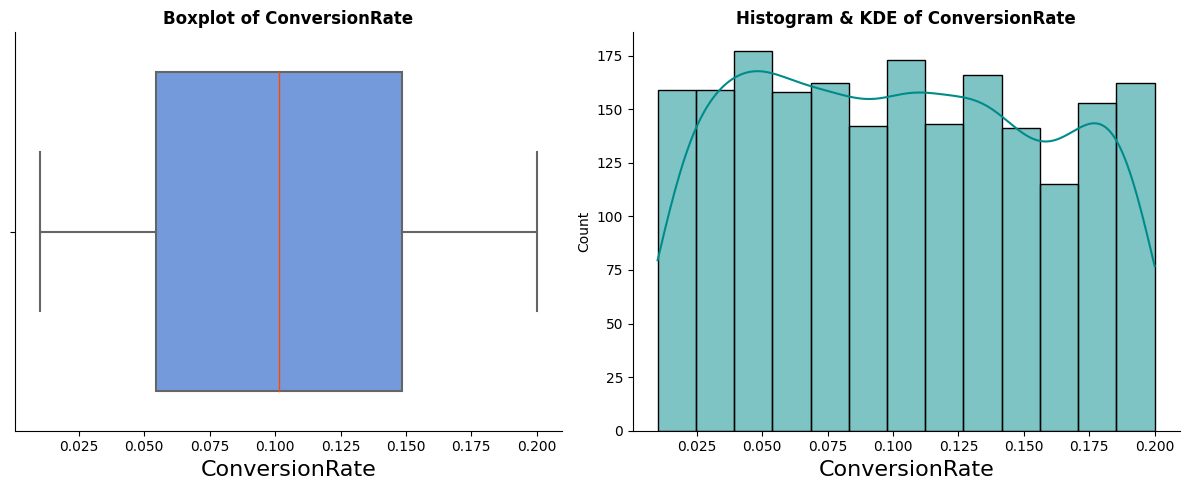

0.07277971832820204


In [28]:
# ConversionRate
all_num_plot('ConversionRate')
# This line of code ensures wheter our data is symmetric and has no strong skewes, closer to zero -> more symmetry.
print(skew(data['ConversionRate']))

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Again as we can see there are no outlires, median is close to center, values are(almost) pretty evenly distributed and flat(uniform), no obvious skewes and no missing values.

We don't need to change anything, it's clean enough.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Website Visits
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


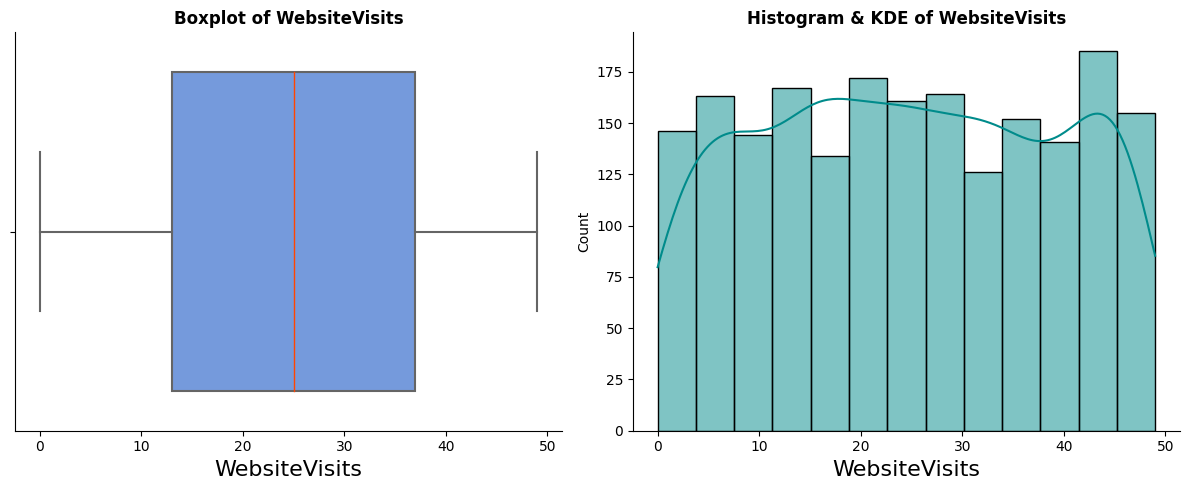

In [29]:
# WebsiteVisits
all_num_plot('WebsiteVisits')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Again as we can see there are no outlires, median is close to center, values are(almost) pretty evenly distributed and flat(uniform), no obvious skewes and no missing values.

We don't need to change anything, it's clean enough.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Pages Per Visit
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


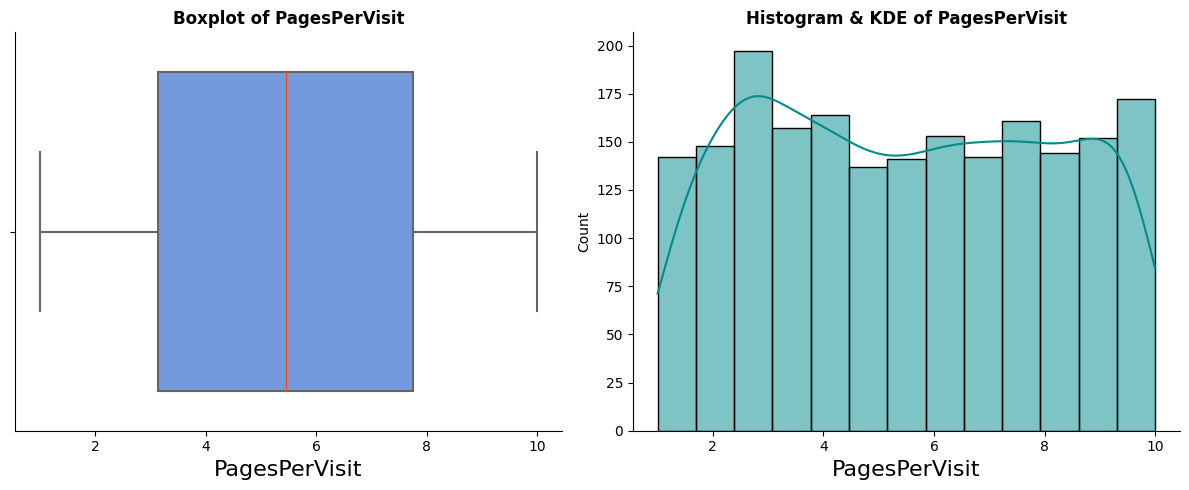

In [30]:
# PagesPerVisit
all_num_plot('PagesPerVisit')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">
Like previous ones this data seems pretty clean too, no outlires, median is close to center, values are fairly evenly distributed, no heavy skewes and no missing values.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 20px;">
Time On Site
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


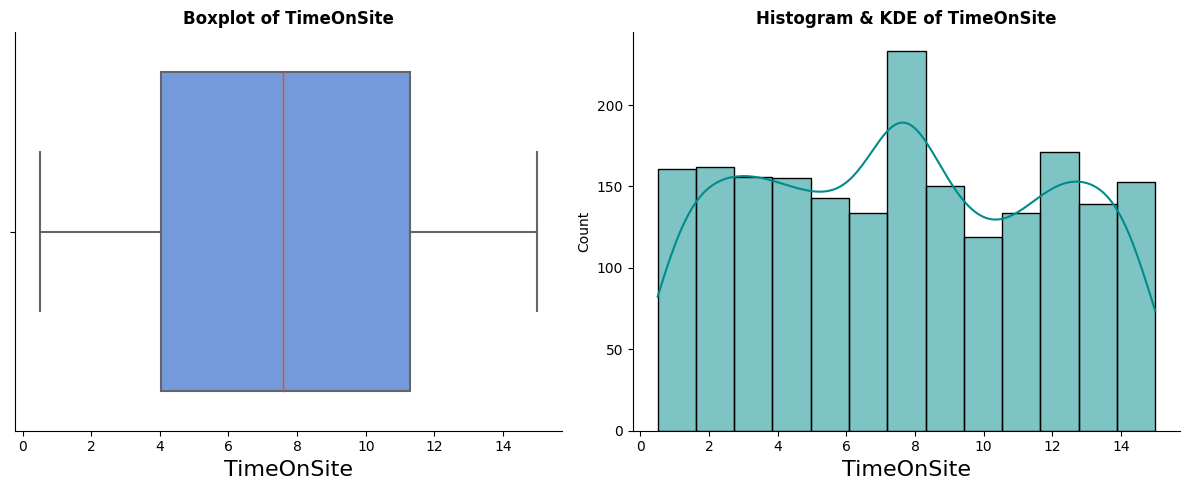

In [31]:
# TimeOnSite
median_val = data['TimeOnSite'].median()
data['TimeOnSite'] = data['TimeOnSite'].fillna(median_val)
all_num_plot('TimeOnSite')


<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

In this attribute unlike many others we have some missing values, it's not huge amount and is small but still a considerable amount (roughly ~3.9%) so we need to address this matter, since it's not a significant amount we could drop and not consider those records with a missing value, or generate a way to predict the missing values based on other given columns of that record, but that seems unnecessary for such dataset so I decided to replace them with median of the attribute.

At first it had a fairly flatish look on histogram like others but after replacing the missing values as expected middle part raised a little bit, but still no obvious or harsh skewes and no missing values so no problem.
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


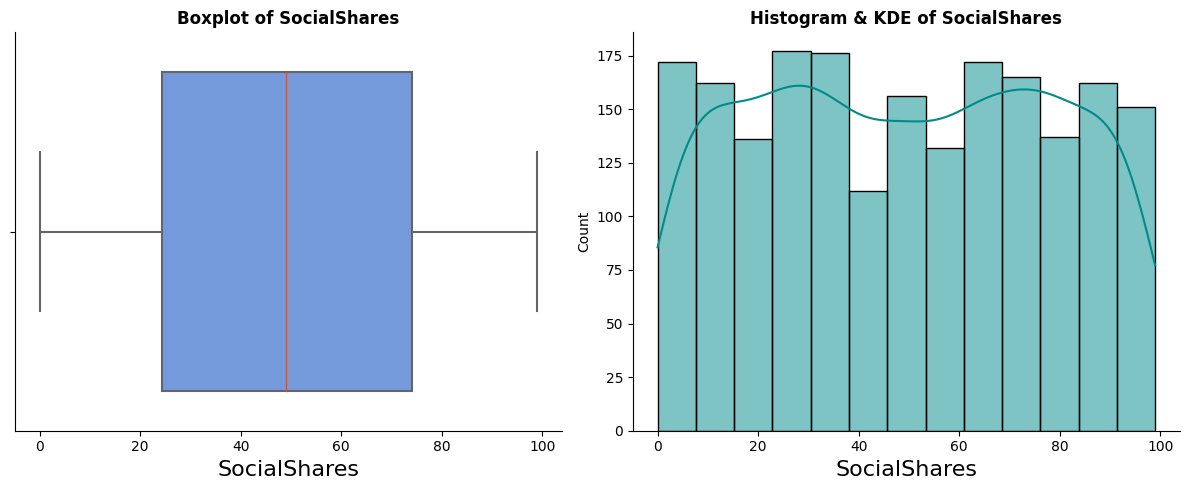

In [32]:
all_num_plot('SocialShares')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">
Box Plot:

From this chart, we can see that half of the customers shared on social media fewer than 49 times on average, while the other half shared more. There are also no outliers in this part of the data.

Histogram:

Considering the distribution of this chart, which is multimodal and ranges from 0 to 100, it is necessary to segment it into several groupes and investigate the reasons for the significant differences in sharing behavior among customers.

Additionally, the distribution of this data is not normal.
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


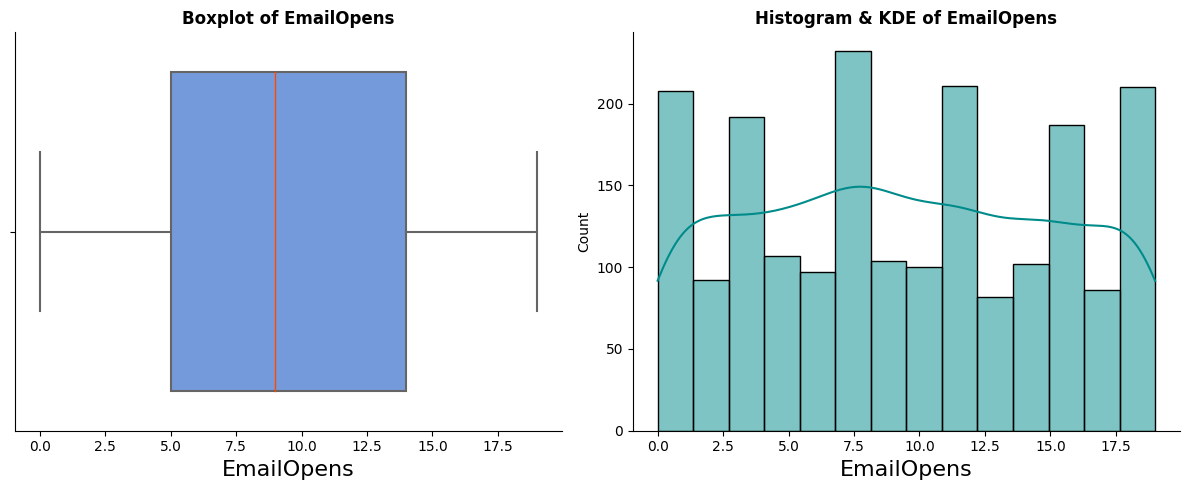

In [33]:
all_num_plot('EmailOpens')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">
Box Plot:

From this chart, we can see that half of the customers opened email fewer than 9 times on average, while the other half opened more. There are also no outliers in this part of the data.

Histogram:

Considering the distribution of this chart, which is multimodal and ranges from 0 to 100, it is necessary to segment it into several groupes and investigate, it can be done as per their jobs.
The number of customers who opened their email 17 times is equal to the number of customers who did not open any emails. This difference in behavior should be further investigated.

Additionally, the distribution of this data is not normal.
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


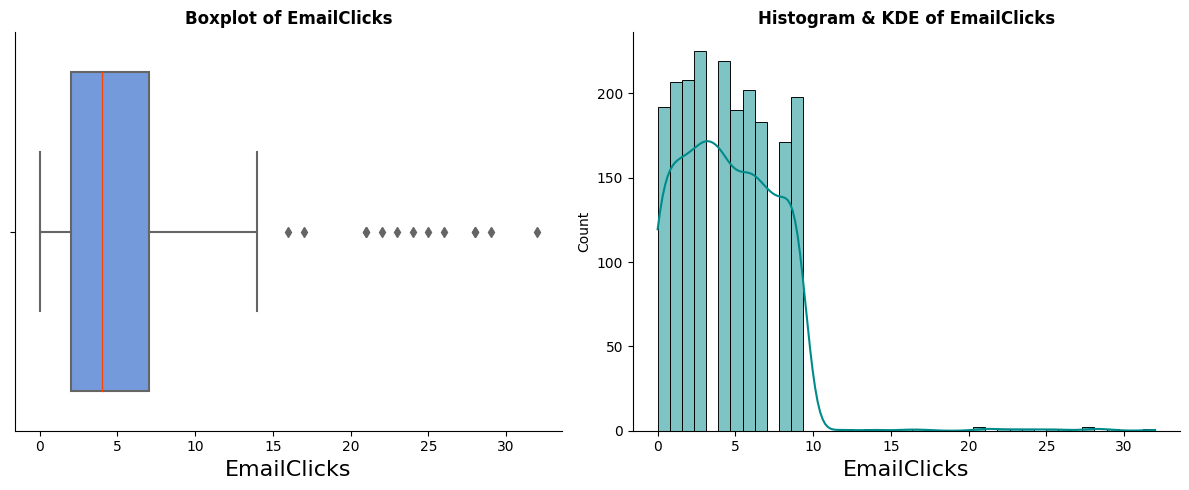

In [34]:
all_num_plot('EmailClicks')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Box Plot: 

We can see from this chart that half of the customers clicked fewer than 4 times on average, while the other half clicked more than 4 times. Some customers clicked more than 15 times, and even up to 30 times, indicating that certain customers exhibited different behavior. This data should be examined to determine whether these customers are loyal customers or spam.

Histogram:

The chart is right-skewed, which indicates that most customers clicked between 0 and 10 times. It also shows a multimodal pattern, suggesting that we need to segment customers based on their interactions and investigate the reasons behind the distinct behavior of high-click customers (outliers).

Additionally, the distribution of this data is not normal.
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


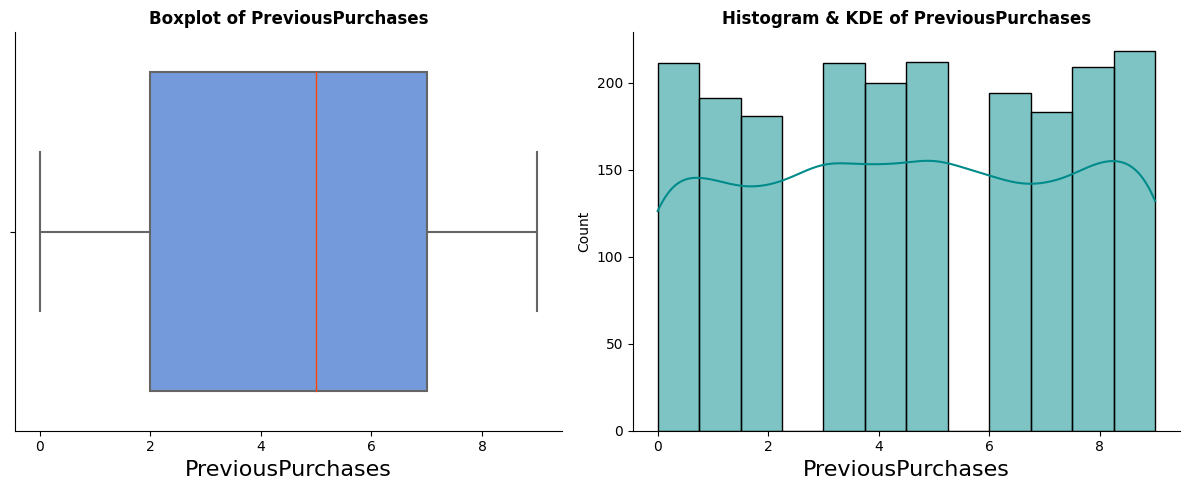

In [35]:
all_num_plot('PreviousPurchases')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Box Plot: 

As shown in this chart, half of the customers have made fewer than 5 purchases, while the other half have made more than 5 purchases. The number of previous purchases by users ranges between 2 and 7.

Histogram:

This table also shows the distribution of the number of previous purchases by customers, which is clearly divided into three groups. The first group consists of customers with few previous purchases, ranging from 0 to 2 times. The second group includes those with 3 to 5 previous purchases. The last group comprises customers who have made more previous purchases than half of the customer base, ranging from 6 to 9 times. It would be useful to investigate why some customers have so few previous purchases—are they new customers?

Additionally, the distribution of this data is not normal.
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


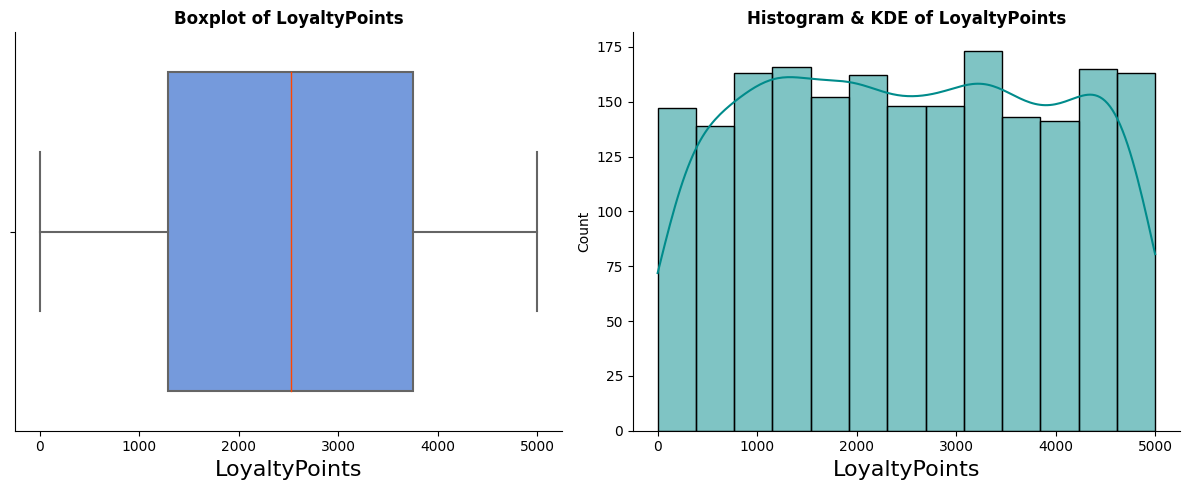

In [36]:
all_num_plot('LoyaltyPoints')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Box Plot: 

Half of the customers have a loyalty score below the average of 2,500, and most customers have scores between 1,200 and 3,800.

Histogram:

Based on the distribution in the histogram, the data appears to be multimodal, but overall, the loyalty scores are not noticeably skewed toward low or high values. However, it would still be useful to investigate these differences.

Additionally, the distribution of this data is not normal.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

_________________________________________________________________________________________________________________________________________________
As mentioned above, the data for Advertising Platform and Advertising Tool are confidential and therefore cannot be used in the exploratory data analysis (EDA).

Based on the above charts and the distributions shown, it would be beneficial to further investigate the impact of Email Clicks and Email Opens on conversion.
_________________________________________________________________________________________________________________________________________________

</span>

In [37]:
def correlation_num(data, numerical_col):
    corr_matrix = data[numerical_col].corr(method='spearman')
    plt.figure(figsize=(15,15))
    sns.heatmap(corr_matrix, cmap='RdYlBu', annot=True, vmax=1, vmin=-1, alpha= 0.5)
    plt.title('Correlation between numeric columns with spearmen method', pad=20)
    plt.show

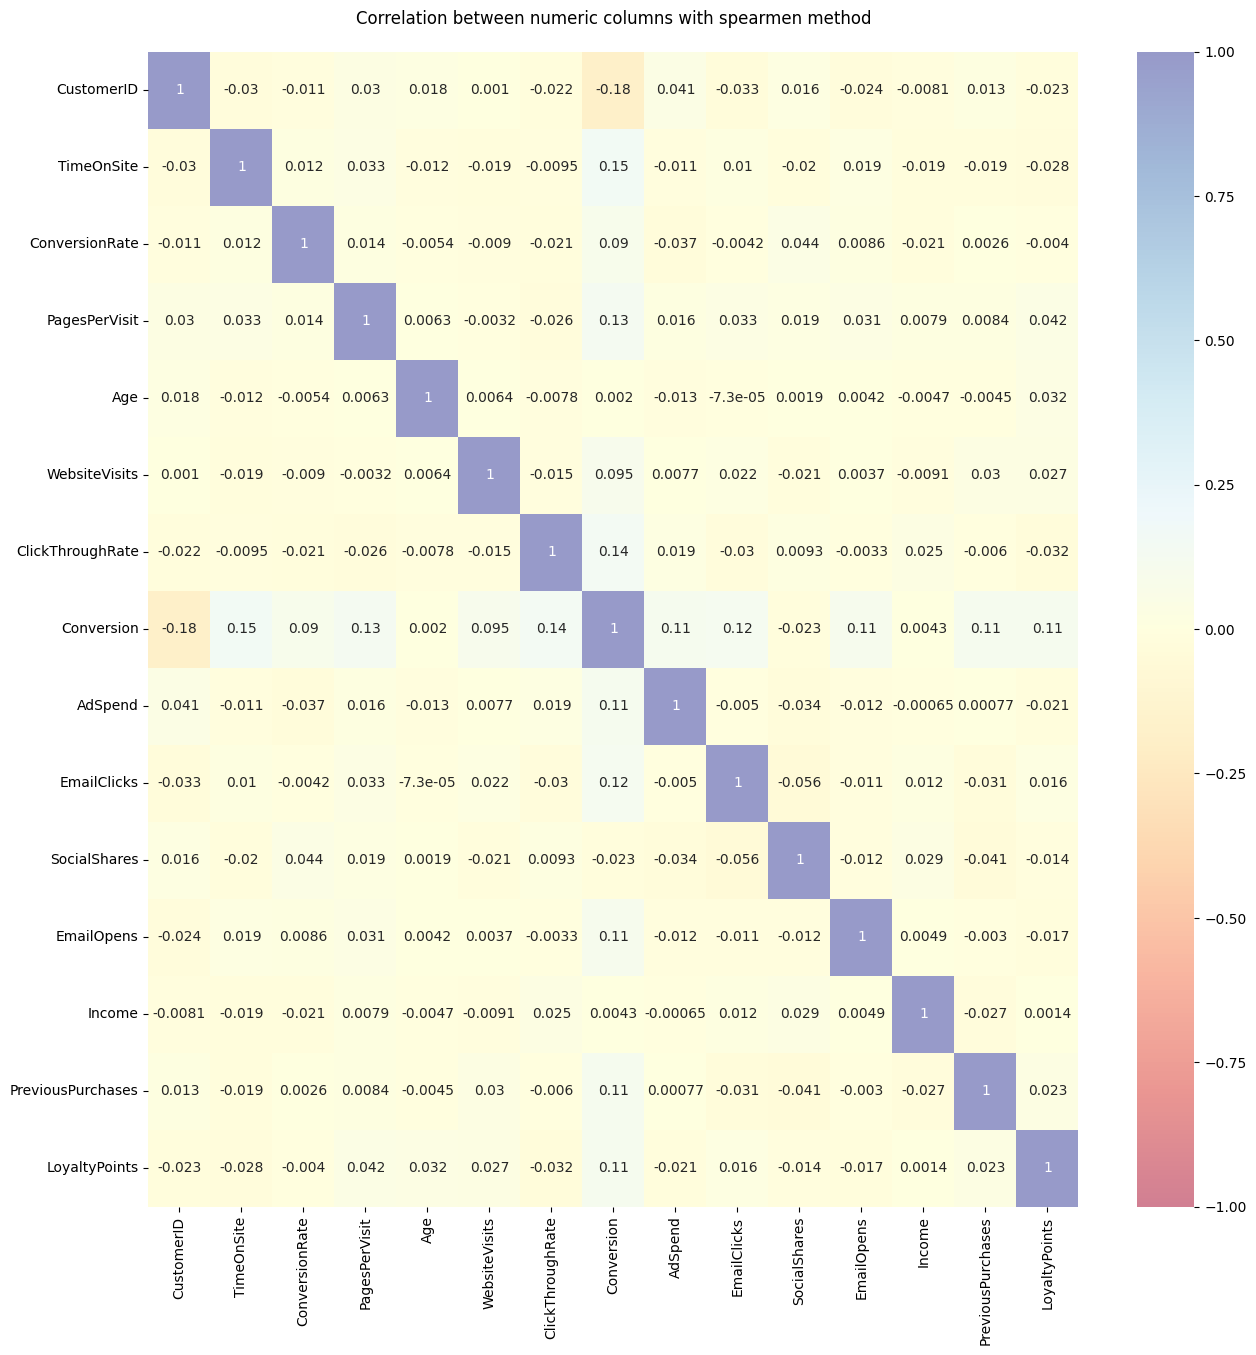

In [38]:
correlation_num(data, numerical_col)

<span style="font-family: 'Times New Roman', serif; font-size: 24px;">
<center>
Bivariate Analysis _ Categorical vs. Numerical
</span>

In [39]:
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    vx, vy = np.var(x, ddof=1), np.var(y, ddof=1)
    s_pooled = np.sqrt(((nx-1)*vx + (ny-1)*vy) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / s_pooled

def cliffs_delta(x, y):
    comp = [np.sign(a - b) for a, b in product(x, y)]
    return np.sum(comp) / (len(x) * len(y))


def numerical_vs_target(df, numerical_col, target_col):
    x0 = df.loc[df[target_col]==0, numerical_col].dropna().astype(float)
    x1 = df.loc[df[target_col]==1, numerical_col].dropna().astype(float)
   
    
    grouped = df.groupby(target_col)[numerical_col].agg(["count","mean","median","std"]).round(2)
    
    
    p_norm0 = shapiro(x0)[1] if len(x0)>3 else np.nan
    p_norm1 = shapiro(x1)[1] if len(x1)>3 else np.nan
    p_levene = levene(x0, x1).pvalue if (len(x0)>2 and len(x1)>2) else np.nan
    
    if (p_norm0>0.05) and (p_norm1>0.05):
        stat, p = ttest_ind(x0,x1, equal_var=(p_levene>0.05))
        test_name = "t-test"
        effect = cohens_d(x0, x1)
        effect_name = "Cohen's d"
    else:
        stat, p = mannwhitneyu(x0,x1, alternative="two-sided")
        test_name = "Mann–Whitney U"
        effect = cliffs_delta(x0, x1)
        effect_name = "Cliff's delta"
    print(f'P_value: {p:.4f}')
    test_table = pd.DataFrame([{
        "Test": test_name, 
        "Statistic": round(stat,3), 
        "p-value": round(p,6),
        "Normality_g0": round(p_norm0,4),
        "Normality_g1": round(p_norm1,4),
        "Levene_p": round(p_levene,4)
    }])
    
    
    vmin, vmax = df[numerical_col].min(), df[numerical_col].max()
    rng = vmax - vmin
    range_table = pd.DataFrame([{"min":vmin, "max":vmax, "range":rng}])
    
    
    corr, p_corr = pointbiserialr(df[target_col], df[numerical_col])
    corr_table = pd.DataFrame([{"Correlation": round(corr,3), "p-value": round(p_corr,6)}])
    
    
    effect_table = pd.DataFrame([{
        "Effect": effect_name,
        "Value": round(effect,3)
    }])
    
    
    fig, axes = plt.subplots(2,3, figsize=(20,15))
    
    
    # Group summary
    axes[0,0].axis("off")
    tbl = axes[0,0].table(cellText=grouped.values, rowLabels=grouped.index, colLabels=grouped.columns, loc="center")
    tbl.scale(1,1); axes[0,0].set_title(f"Group-wise Summary for {numerical_col}")
    
    # Statistical tests
    axes[0,1].axis("off")
    tbl = axes[0,1].table(cellText=test_table.values, colLabels=test_table.columns, loc="center")
    tbl.scale(1,1); axes[0,1].set_title(f"Statistical Test for {numerical_col}")
 
    # Effect Size
    axes[0,2].axis("off")
    tbl = axes[0,2].table(cellText=effect_table.values, colLabels=effect_table.columns, loc="center")
    tbl.scale(1,1); axes[0,2].set_title(f"Effect Size for {numerical_col}")
    
    # Boxplot
    sns.boxplot(x=target_col, y=numerical_col, data=df, ax=axes[1,0])
    axes[1,0].set_title(f"Boxplot {numerical_col} by Target")
    
    # KDE Plot
    for g in df[target_col].unique():
        sns.kdeplot(df.loc[df[target_col]==g, numerical_col], ax=axes[1,1], label=f"{target_col}={g}", fill=True, alpha=0.4)
    axes[1,1].set_title(f"KDE Plot {numerical_col} by Target")
    axes[1,1].legend()
    
    # Violin
    sns.violinplot(x=target_col, y=numerical_col, data=df, ax=axes[1,2])
    axes[1,2].set_title(f"Violin {numerical_col} by Target")
    
    plt.tight_layout()
    plt.show()


P_value: 0.0000


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


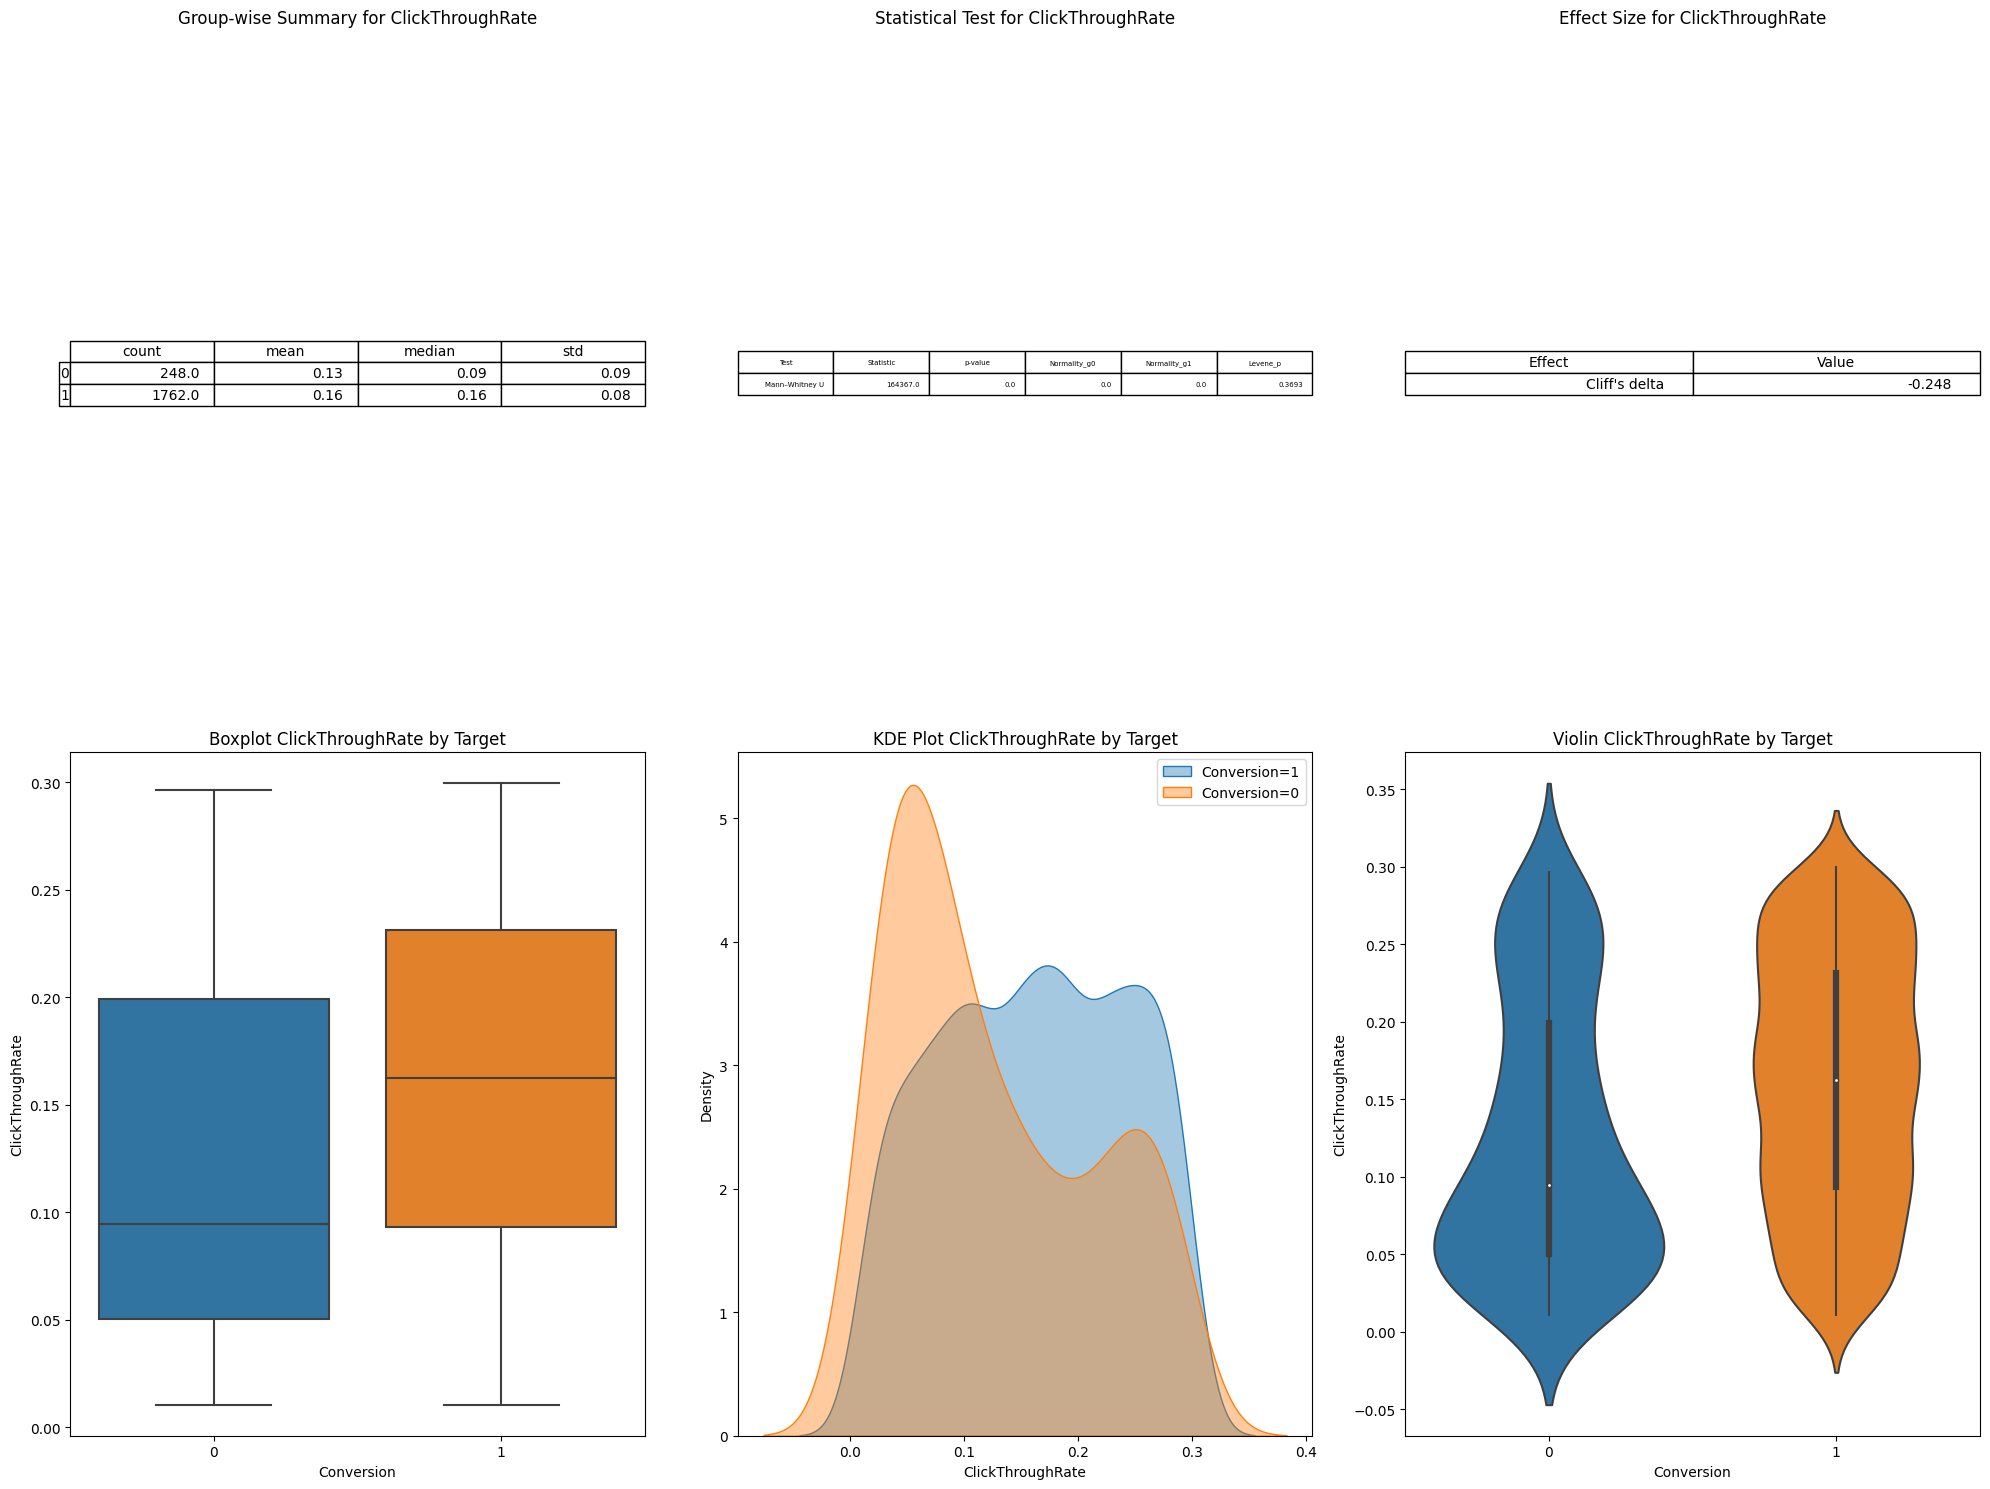

In [40]:
numerical_vs_target(data, 'ClickThroughRate', 'Conversion')

---

![](eda_charts/ClickThroughRate__box.png)
![](eda_charts/ClickThroughRate__histkde.png)

**What we see.** Converters show **higher** ClickThroughRate (median₁=0.1625 vs median₀=0.0948; approx change ~71.4%; **Mann–Whitney U**, p=0).

**So what.** A strong early‑funnel signal; better creative/targeting yields more qualified traffic that is primed to convert.

**Action.** Double‑down on high‑CTR creatives/audiences; link ad‑level CTR to downstream engagement for scoring.

**Key stats.** n₀=248, n₁=1762; effect = *Cliff's delta* = 0.248; CLES=0.624; point‑biserial r = 0.141 (p=0).


P_value: 0.0001


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


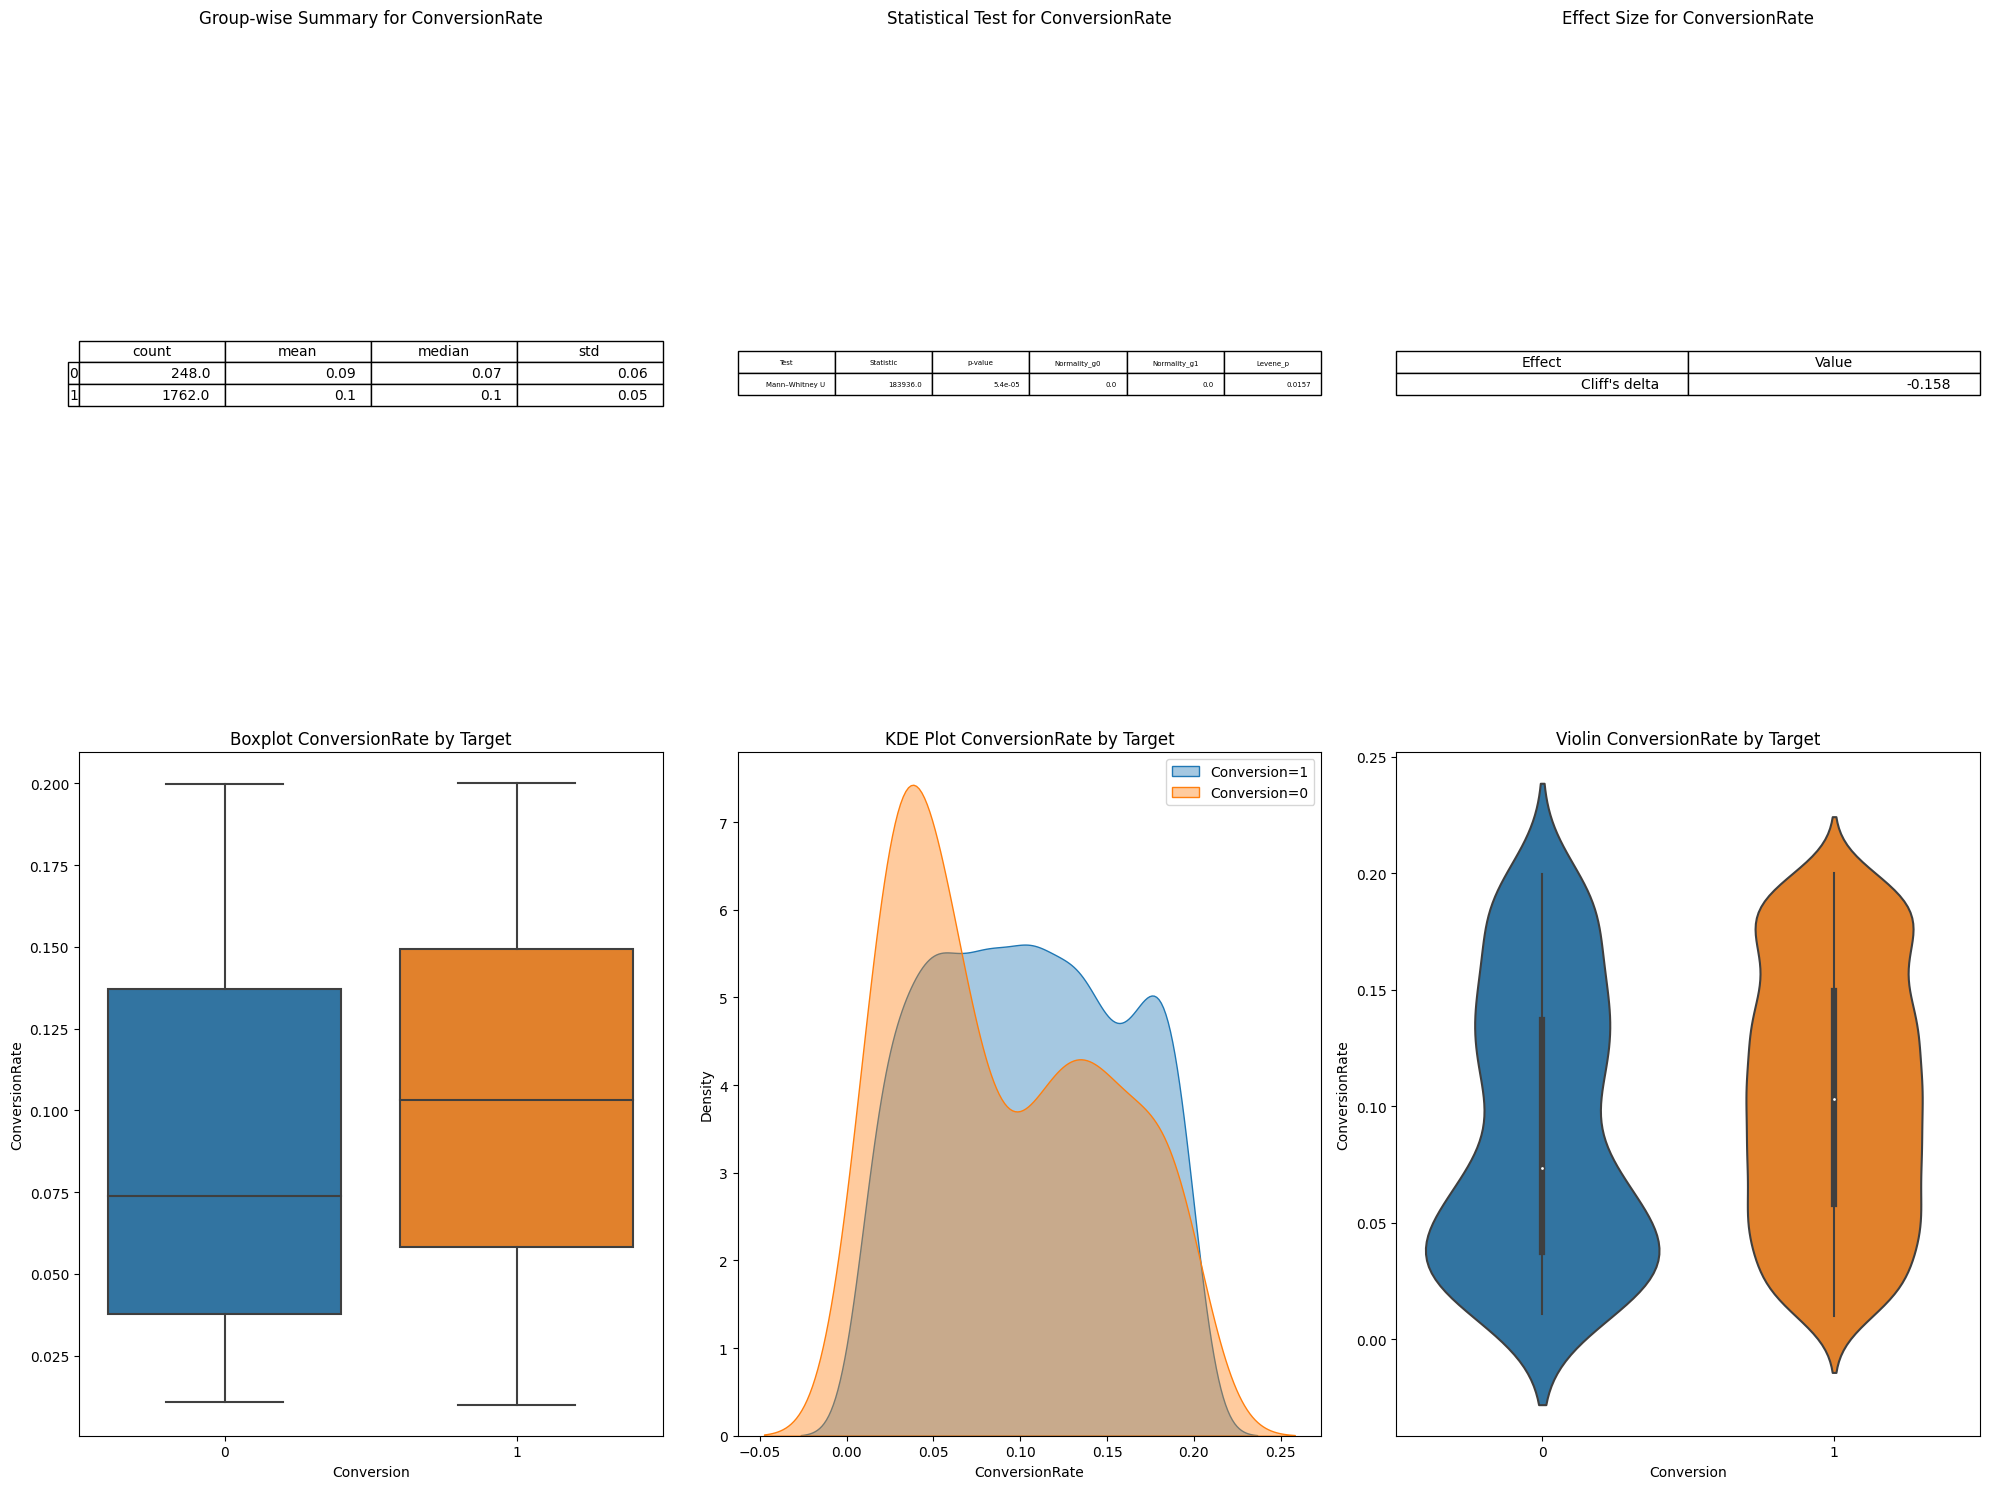

In [41]:
numerical_vs_target(data, 'ConversionRate', 'Conversion')

---

![](eda_charts/ConversionRate__box.png)
![](eda_charts/ConversionRate__histkde.png)

**What we see.** Converters show **higher** ConversionRate (median₁=0.1032 vs median₀=0.0737; approx change ~40%; **Mann–Whitney U**, p=0.0001).

**So what.** This metric is conceptually entangled with the target; uplift is expected and not an independent driver.

**Action.** Exclude from predictive models to avoid target leakage; keep for monitoring/diagnostics.

**Key stats.** n₀=248, n₁=1762; effect = *Cliff's delta* = 0.158; CLES=0.579; point‑biserial r = 0.0881 (p=0.0001).


P_value: 0.0000


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


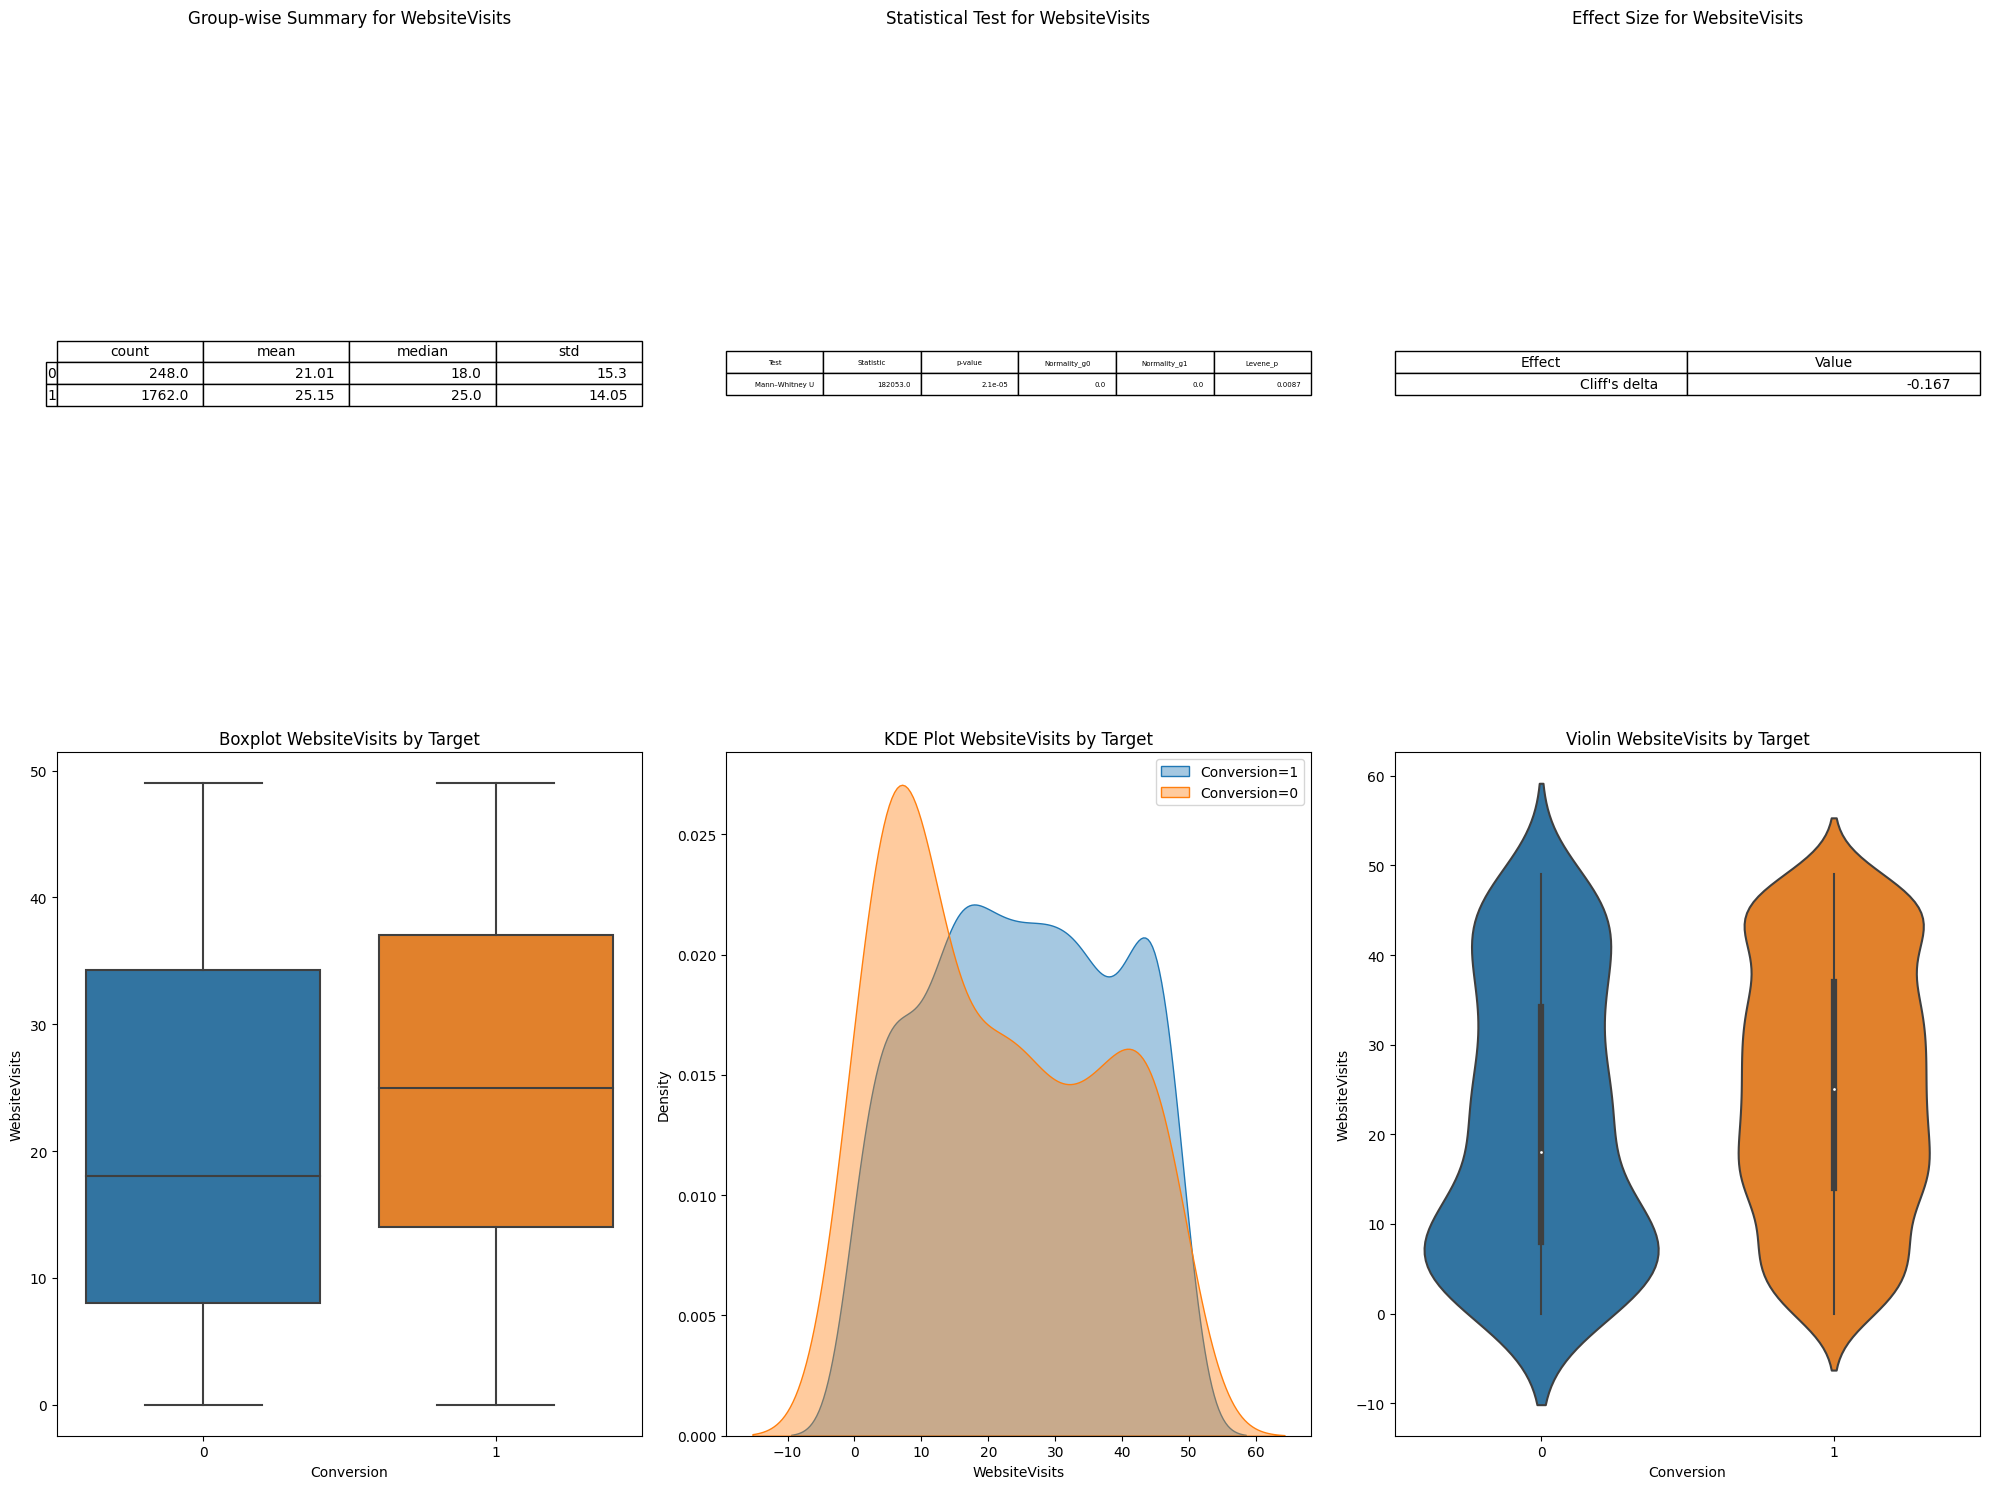

In [42]:
numerical_vs_target(data, 'WebsiteVisits', 'Conversion')

---

![](eda_charts/WebsiteVisits__box.png)
![](eda_charts/WebsiteVisits__histkde.png)

**What we see.** Converters show **higher** WebsiteVisits (median₁=25 vs median₀=18; approx change ~38.9%; **Mann–Whitney U**, p=0).

**So what.** Converters return more often and require multiple touches before buying.

**Action.** Use recency‑frequency thresholds for remarketing and thoughtful sequence planning.

**Key stats.** n₀=248, n₁=1762; effect = *Cliff's delta* = 0.167; CLES=0.583; point‑biserial r = 0.0954 (p=0).


P_value: 0.0000


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


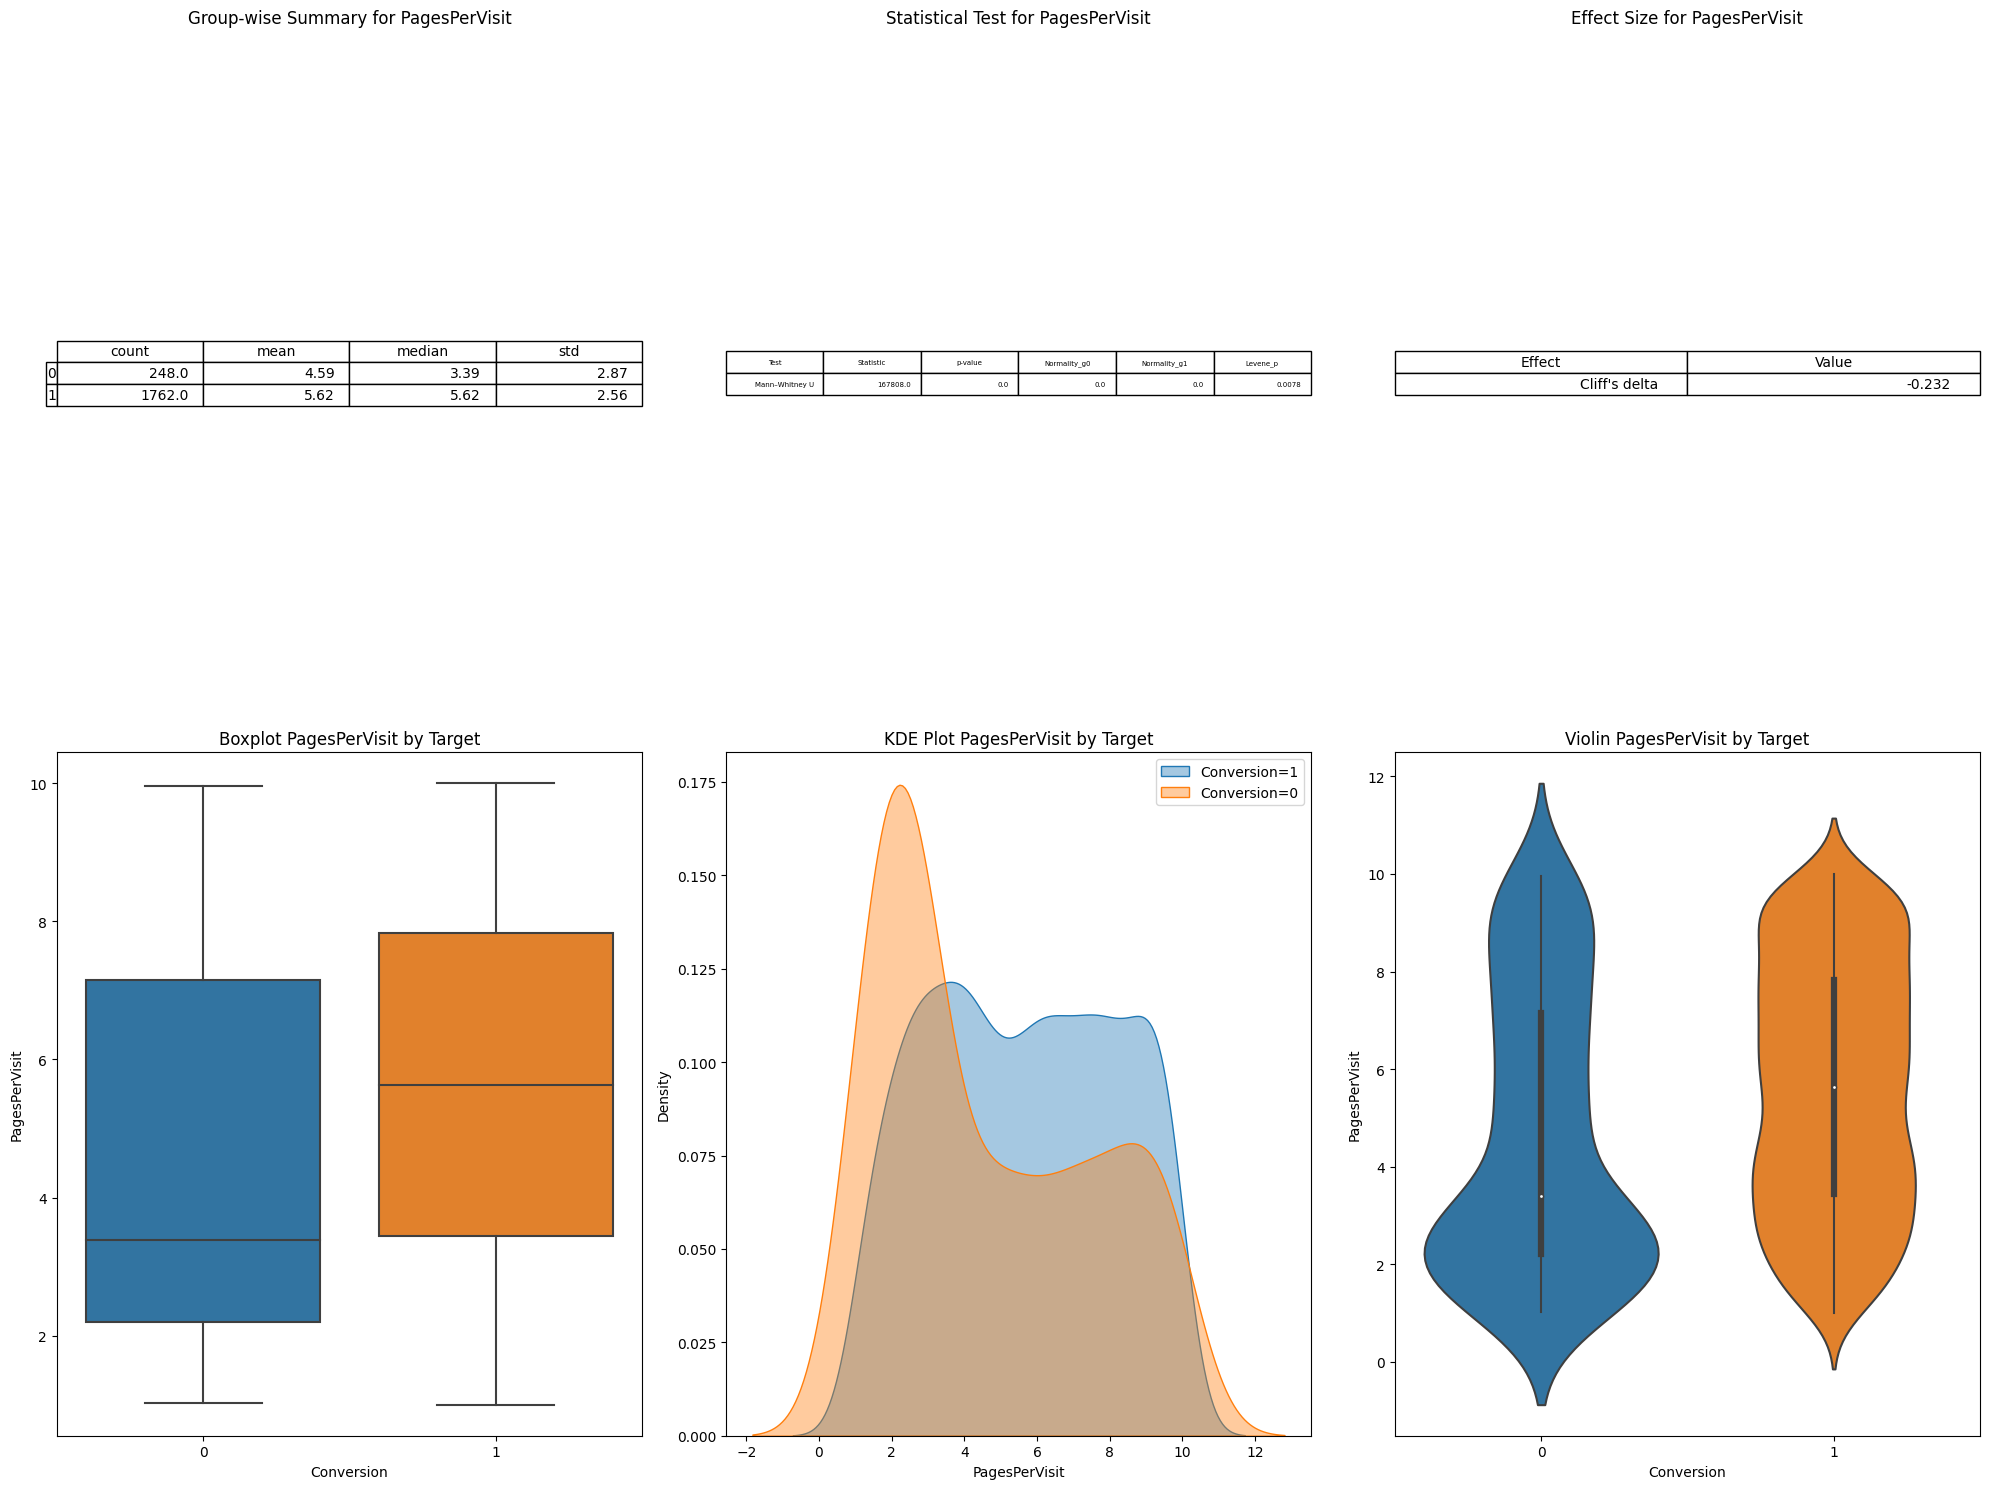

In [43]:
numerical_vs_target(data, 'PagesPerVisit', 'Conversion')

---

![](eda_charts/PagesPerVisit__box.png)
![](eda_charts/PagesPerVisit__histkde.png)

**What we see.** Converters show **higher** PagesPerVisit (median₁=5.623 vs median₀=3.392; approx change ~65.8%; **Mann–Whitney U**, p=0).

**So what.** Converters explore deeper site structure (product/pricing/trust content) before committing.

**Action.** Design clear discovery paths and surface proof points (reviews, guarantees) one click from CTAs.

**Key stats.** n₀=248, n₁=1762; effect = *Cliff's delta* = 0.232; CLES=0.616; point‑biserial r = 0.129 (p=0).


P_value: 0.0000


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


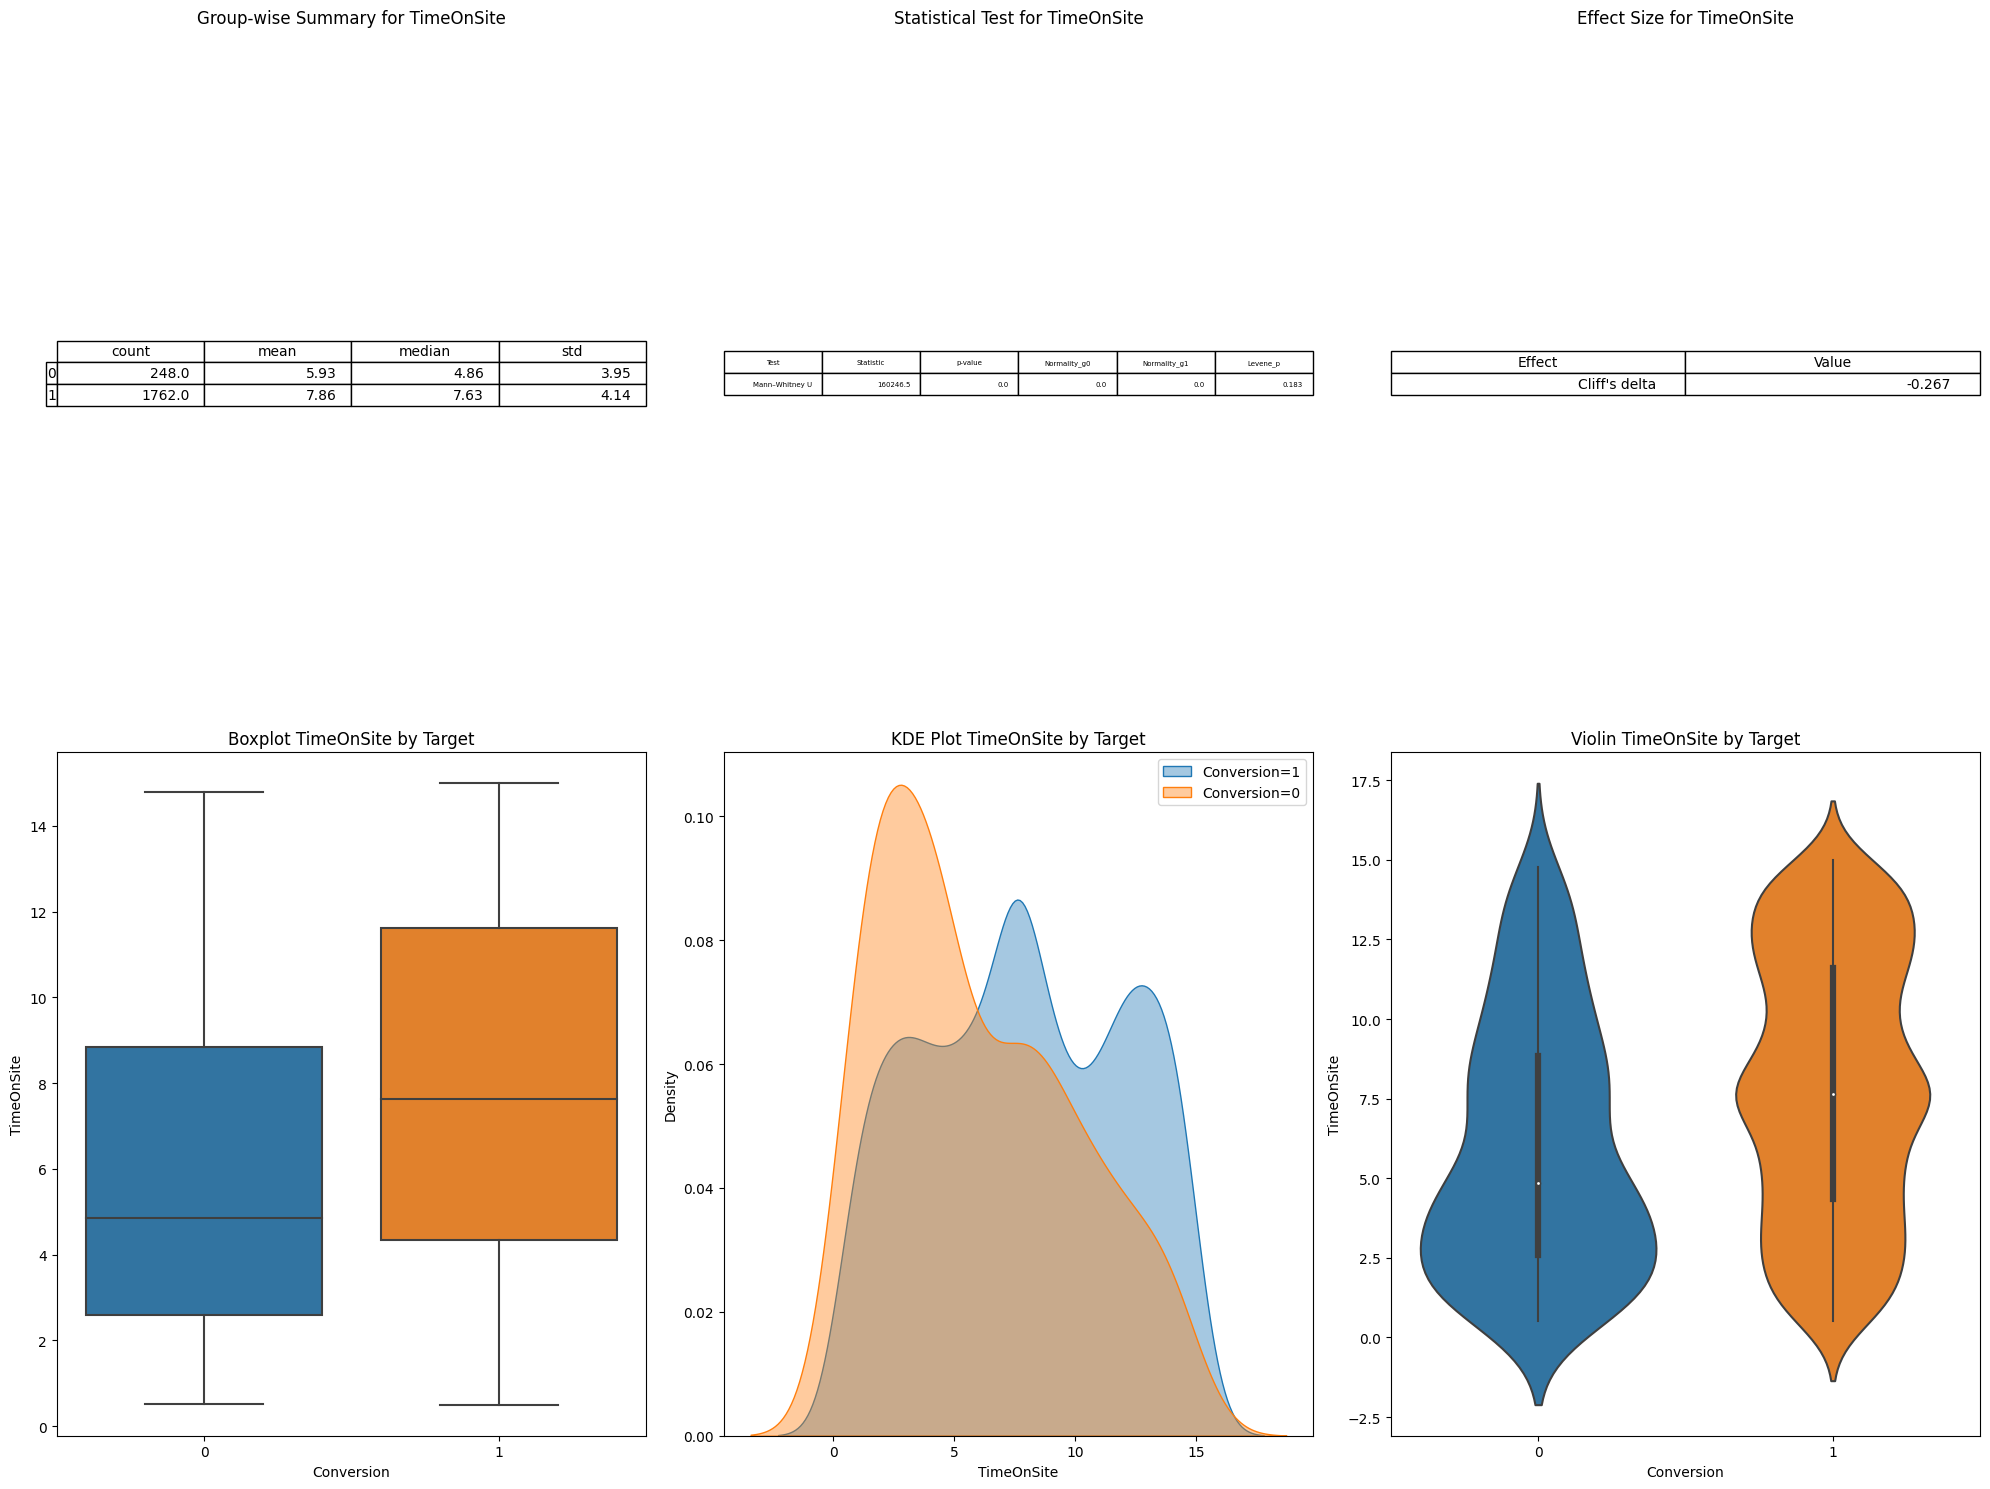

In [44]:
numerical_vs_target(data, 'TimeOnSite', 'Conversion')

---

![](eda_charts/TimeOnSite__box.png)
![](eda_charts/TimeOnSite__histkde.png)

**What we see.** Converters show **higher** TimeOnSite (median₁=7.866 vs median₀=4.734; approx change ~66.2%; **Mann–Whitney U**, p=0).

**So what.** Converting sessions appear more engaged and deliberate; visitors spend longer exploring and completing tasks before deciding.

**Action.** Add deep content and on‑page guidance (comparisons, FAQs near CTAs, progress indicators) to sustain qualified engagement.

**Key stats.** n₀=237, n₁=1694; effect = *Cliff's delta* = 0.275; CLES=0.637; point‑biserial r = 0.156 (p=0).


P_value: 0.3120


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


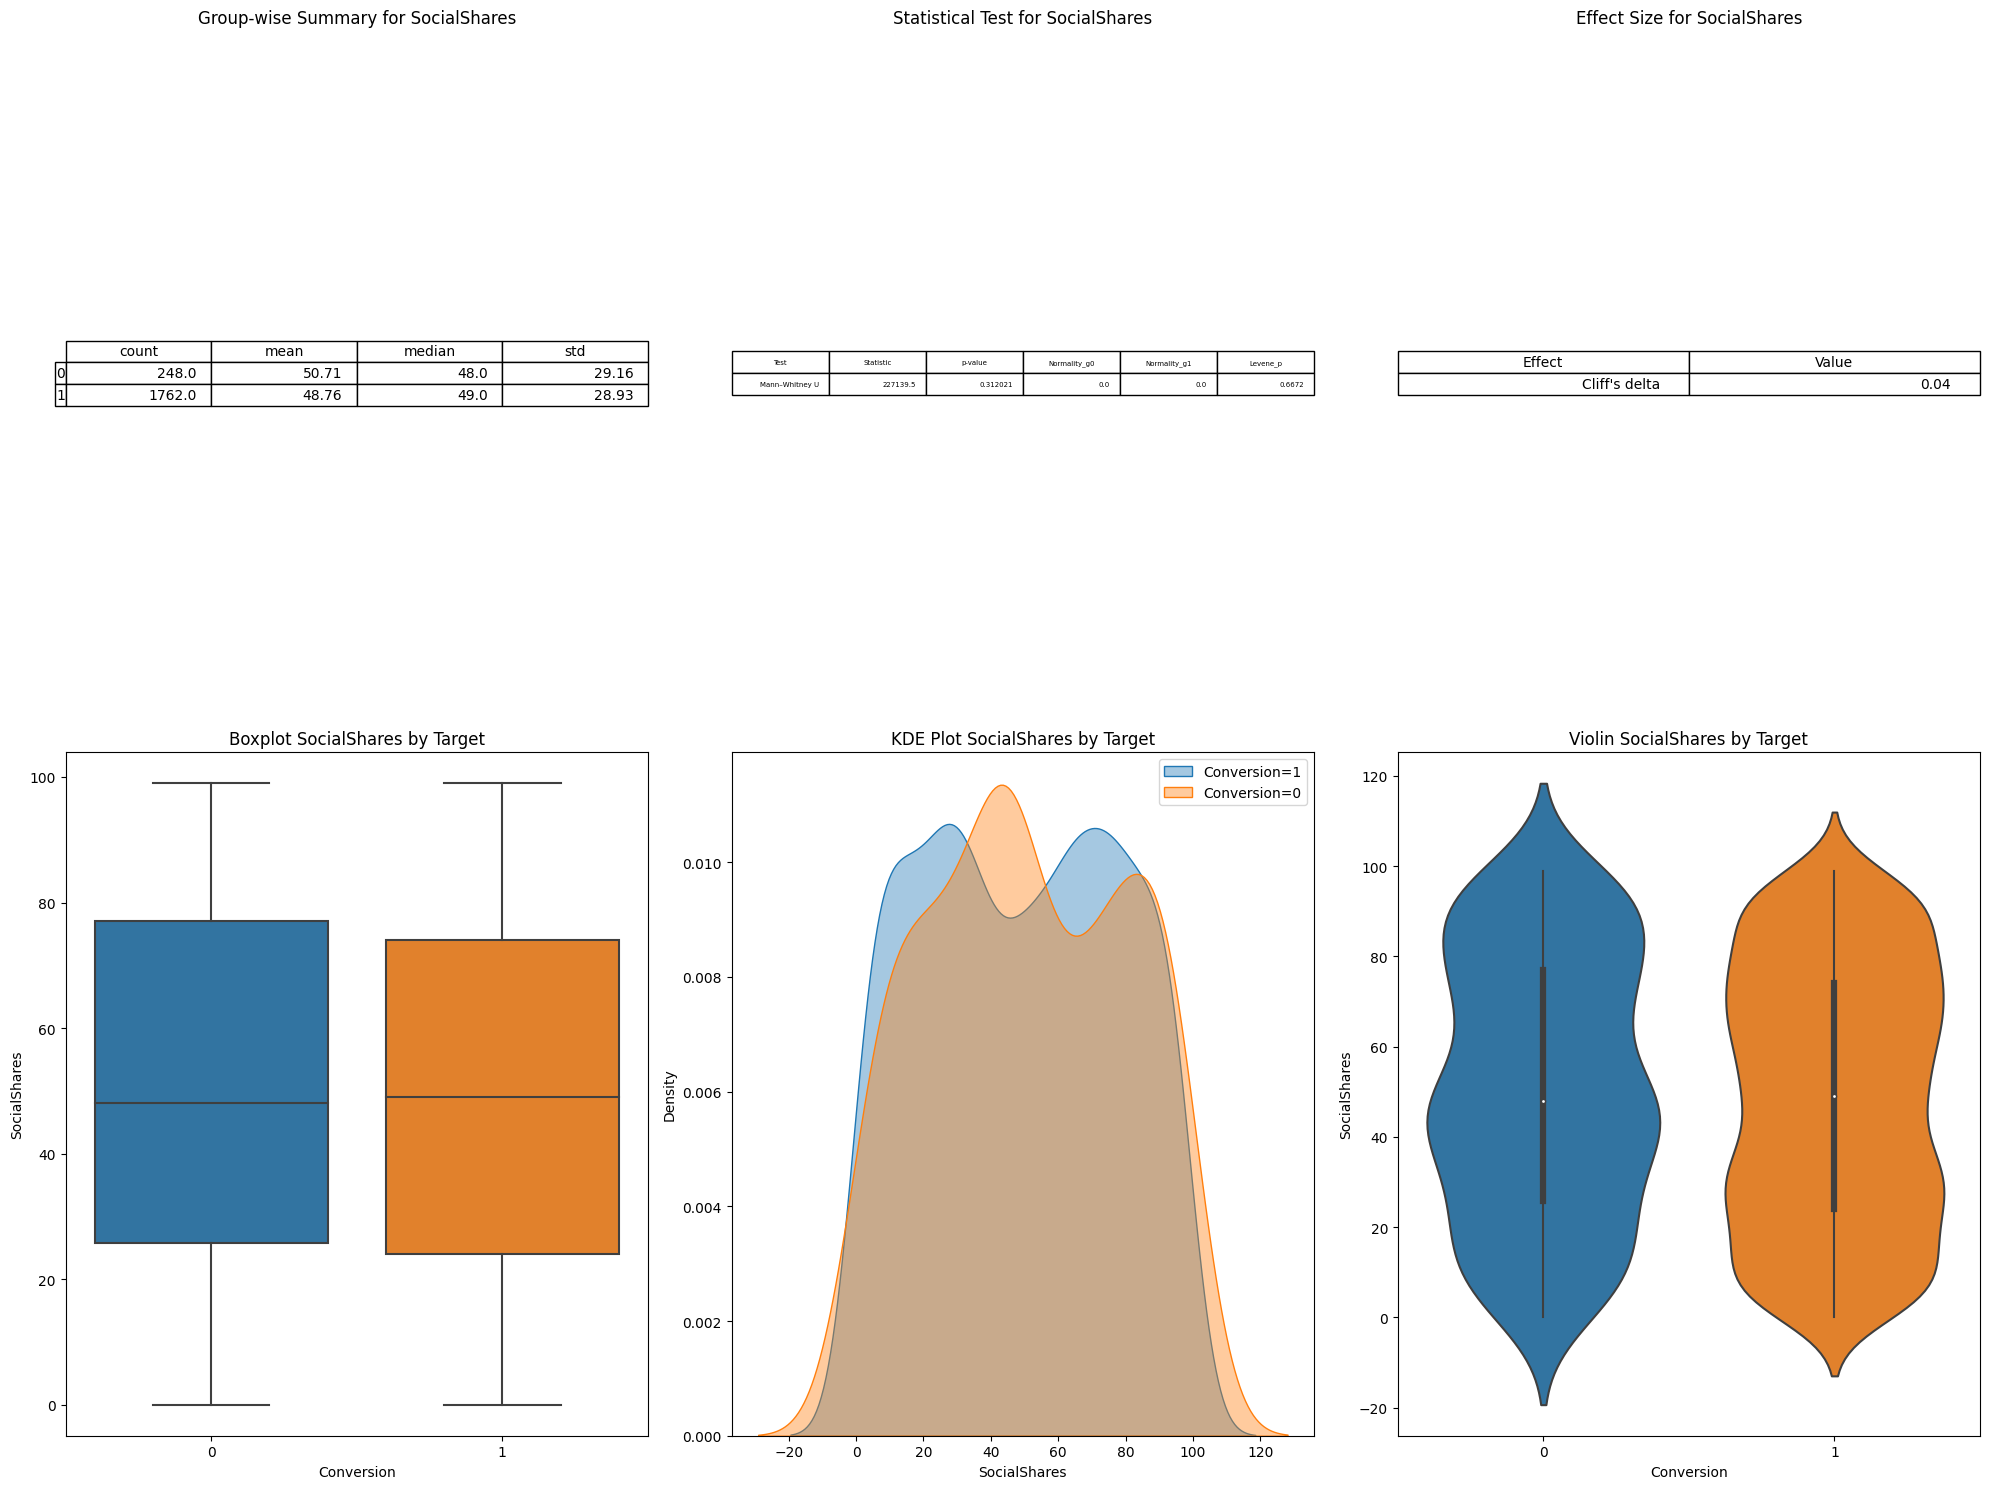

In [45]:
numerical_vs_target(data, 'SocialShares', 'Conversion')

---

![](eda_charts/SocialShares__box.png)
![](eda_charts/SocialShares__histkde.png)

**What we see.** Converters show **higher** SocialShares (median₁=49 vs median₀=48; approx change ~2.08%; **Mann–Whitney U**, p=0.312).

**So what.** Social enthusiasm here doesn’t translate into transactional intent in this sample.

**Action.** Track as a brand KPI rather than a conversion predictor.

**Key stats.** n₀=248, n₁=1762; effect = *Cliff's delta* = -0.0396; CLES=0.48; point‑biserial r = -0.0221 (p=0.322).


P_value: 0.0000


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


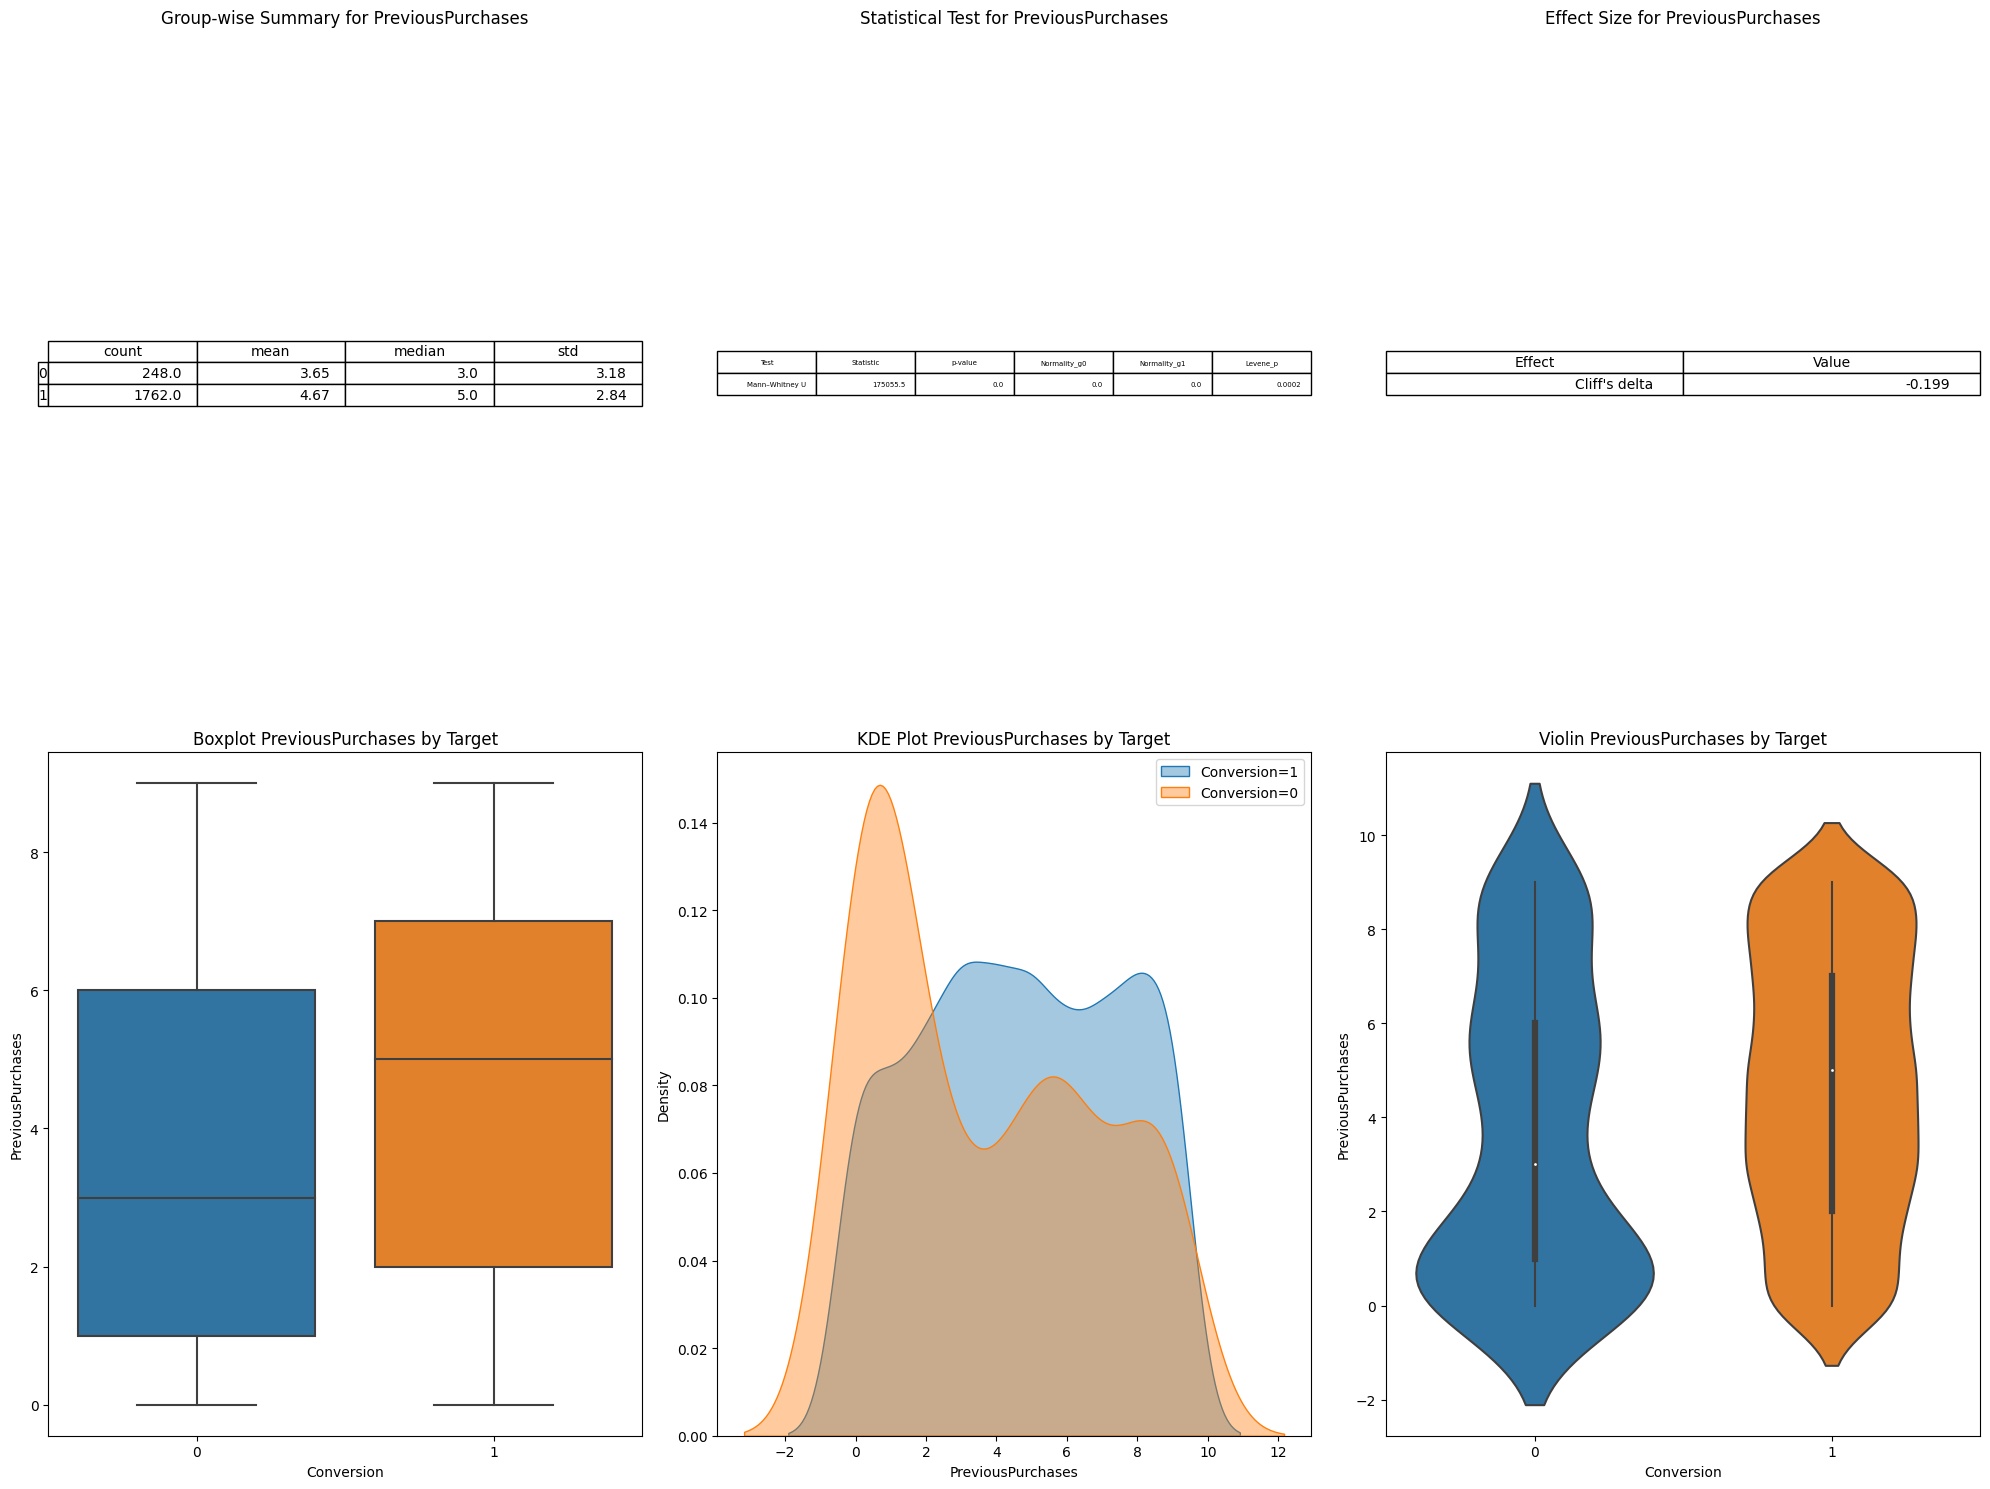

In [46]:
numerical_vs_target(data, 'PreviousPurchases', 'Conversion')

---

![](eda_charts/PreviousPurchases__box.png)
![](eda_charts/PreviousPurchases__histkde.png)

**What we see.** Converters show **higher** PreviousPurchases (median₁=5 vs median₀=3; approx change ~66.7%; **Mann–Whitney U**, p=0).

**So what.** A loyalty flywheel: prior buyers are easier to convert and respond better to offers.

**Action.** Deploy return‑buyer nudges (bundles, tiered perks) and CRM winbacks.

**Key stats.** n₀=248, n₁=1762; effect = *Cliff's delta* = 0.199; CLES=0.599; point‑biserial r = 0.115 (p=0).


P_value: 0.0000


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


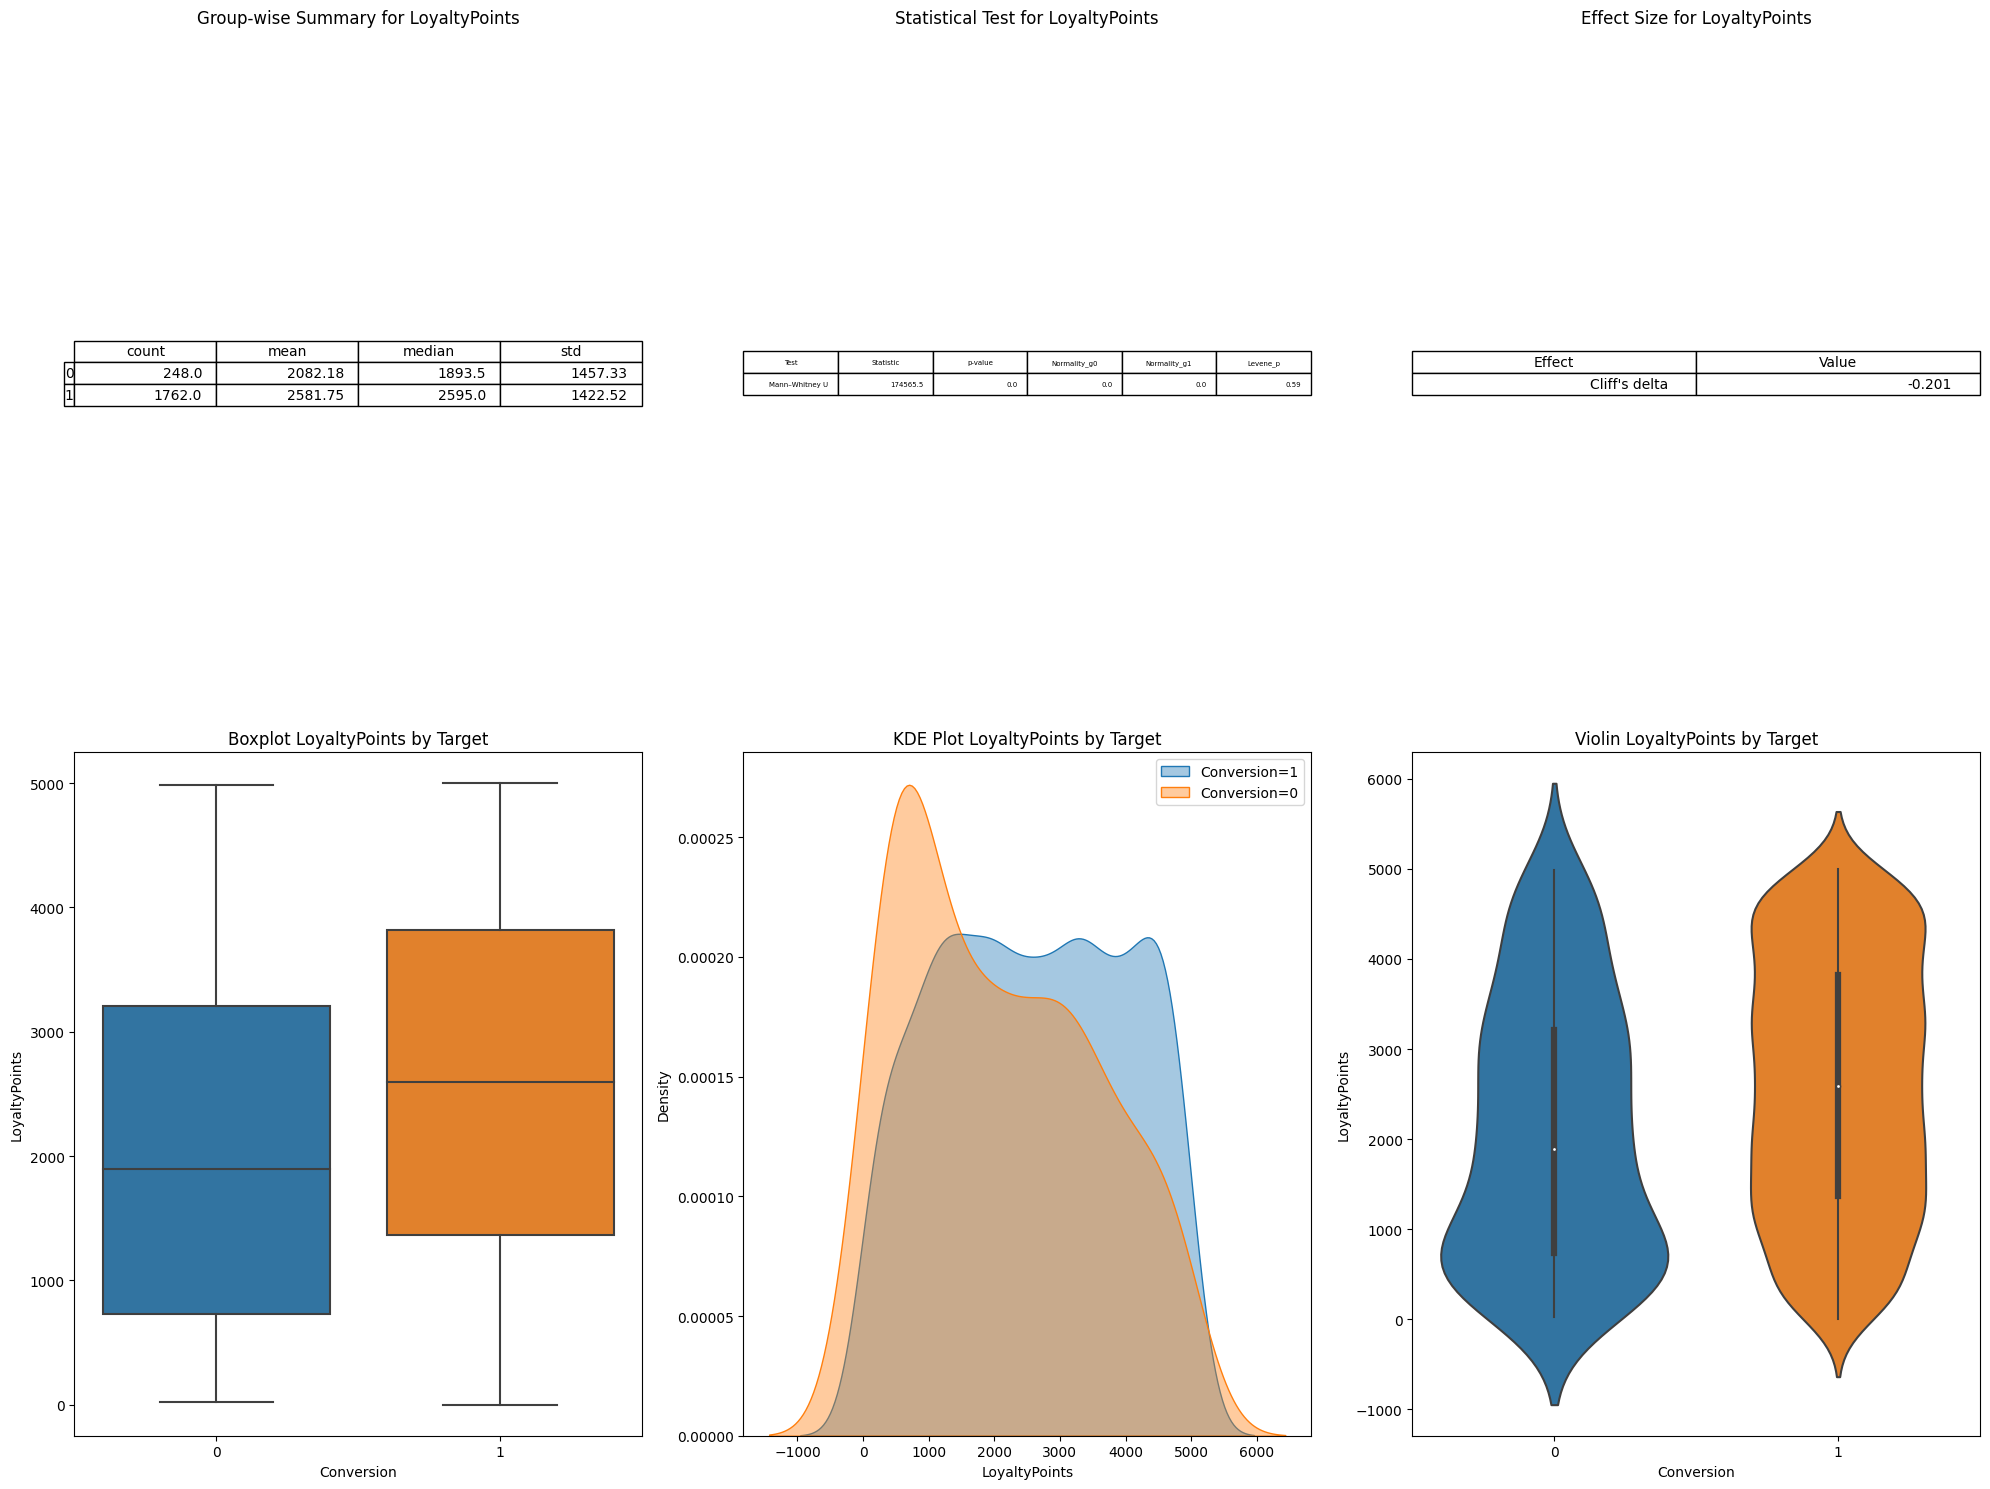

In [47]:
numerical_vs_target(data, 'LoyaltyPoints', 'Conversion')

---

![](eda_charts/LoyaltyPoints__box.png)
![](eda_charts/LoyaltyPoints__histkde.png)

**What we see.** Converters show **higher** LoyaltyPoints (median₁=2595 vs median₀=1894; approx change ~37%; **Mann–Whitney U**, p=0).

**So what.** Accrued rewards align with propensity to convert; status and perks nudge users toward purchase.

**Action.** Promote points redemption moments and tier‑based motivators close to conversion windows.

**Key stats.** n₀=248, n₁=1762; effect = *Cliff's delta* = 0.201; CLES=0.601; point‑biserial r = 0.114 (p=0).


P_value: 0.9275


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


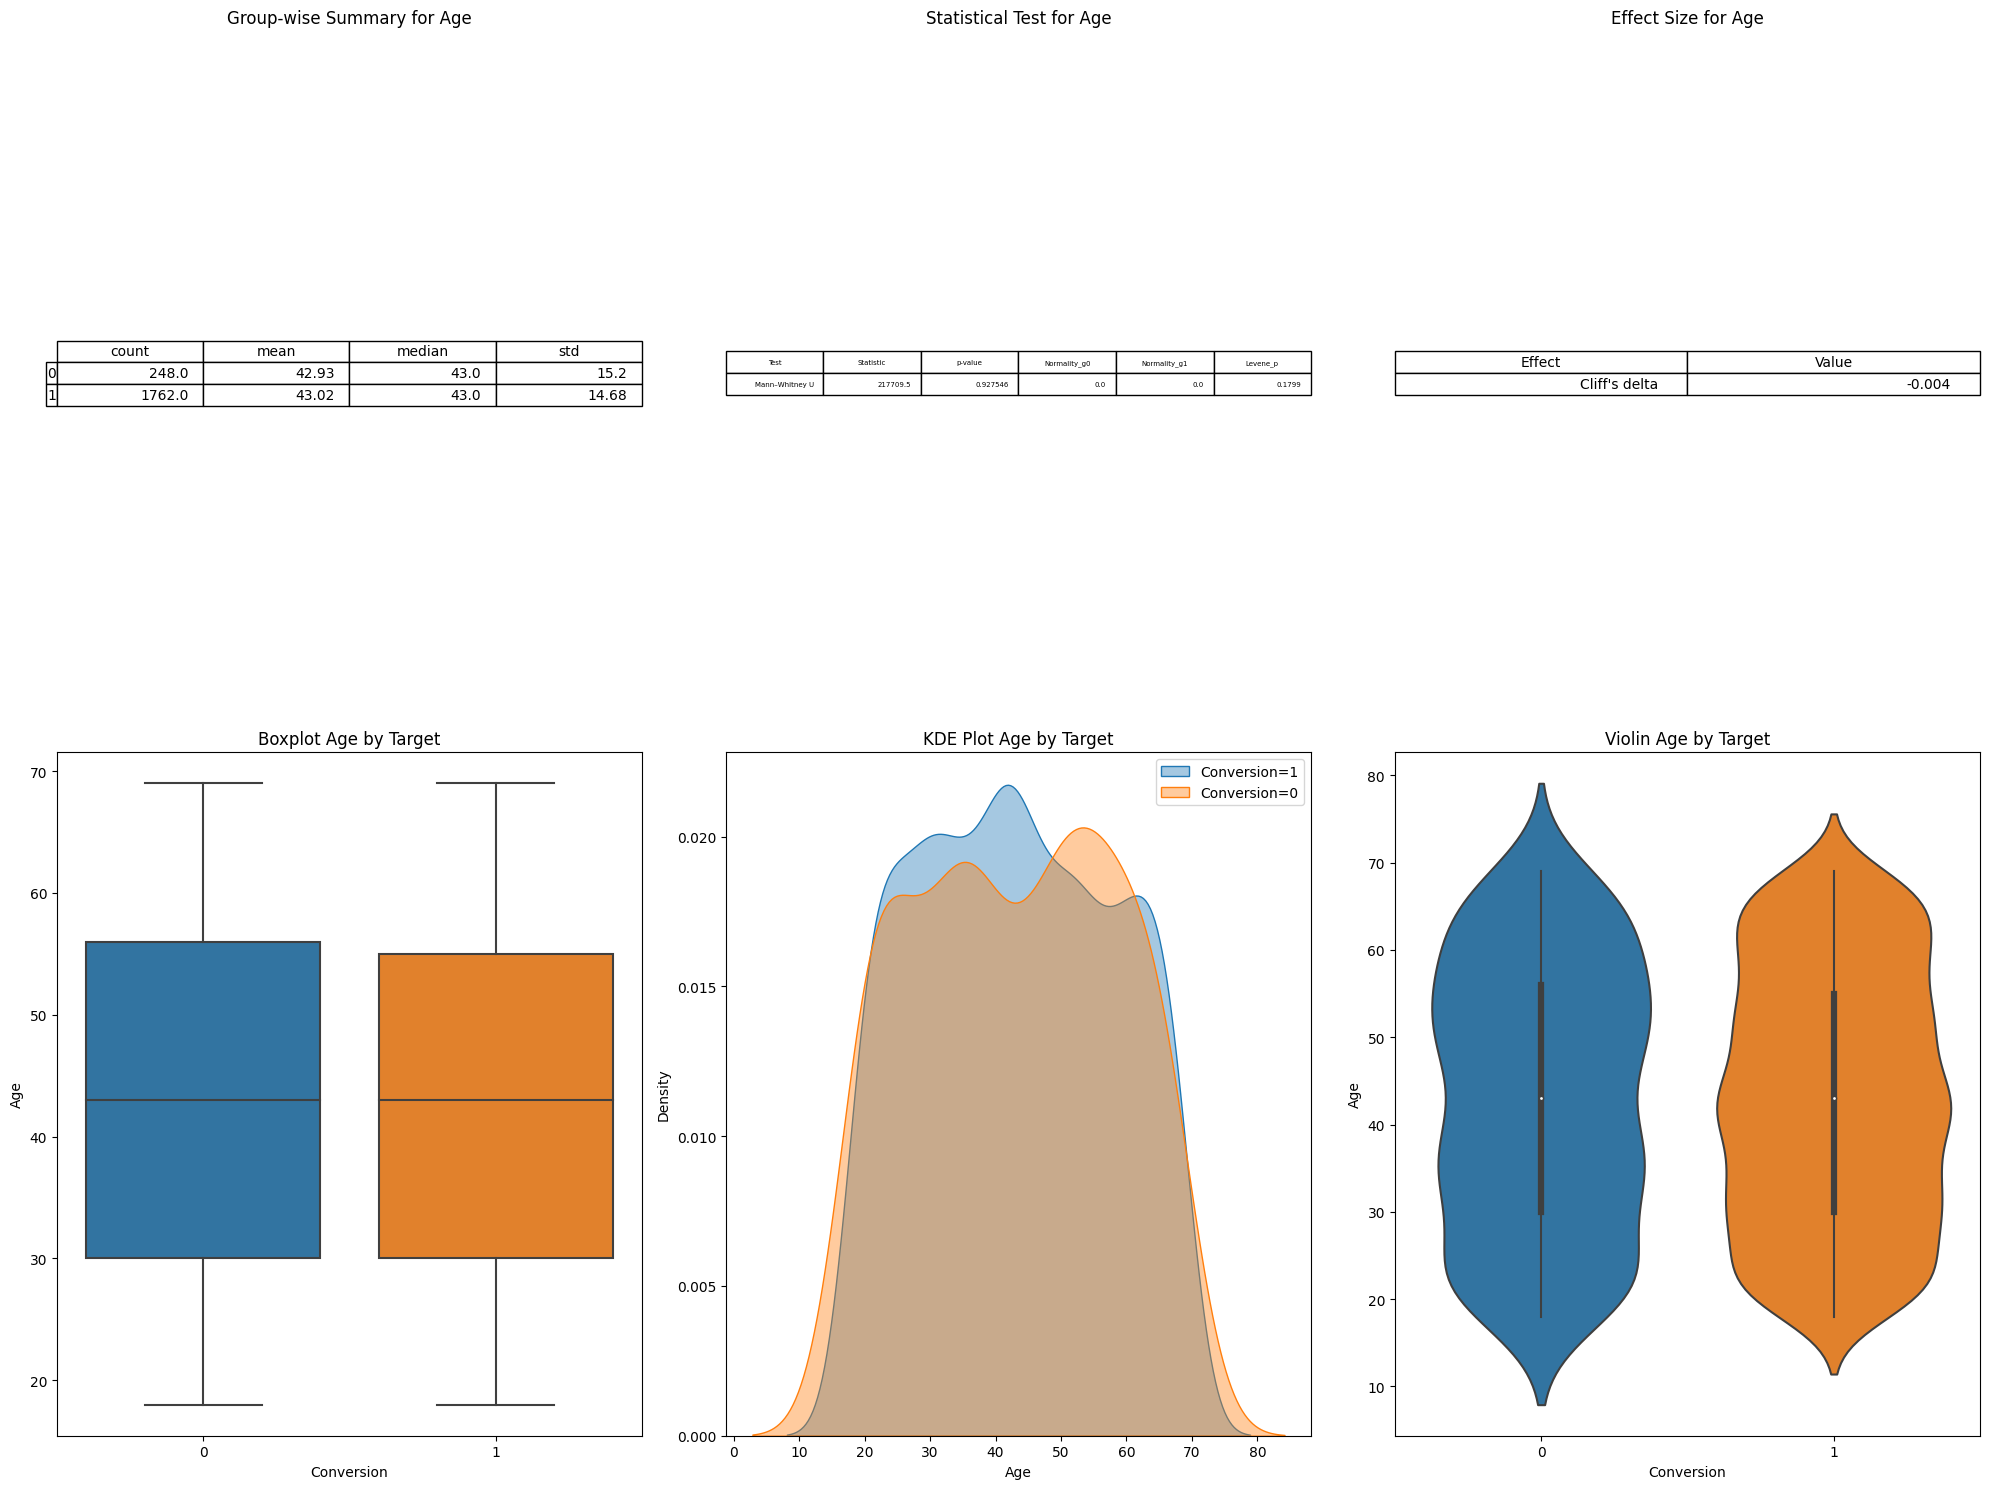

In [48]:
numerical_vs_target(data, 'Age', 'Conversion')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Definition: Age of the customer at the time of the campaign (numeric, continuous).

Hypothesis Test: Mann–Whitney U between converters and non-converters.

Null Hypothesis (H0): Age distribution is the same across both groups.

Alternative Hypothesis (H1): Age distribution differs between groups.

Interpretation: If p < 0.05, age has a significant effect on conversion.
</span>

P_value: 0.8487


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


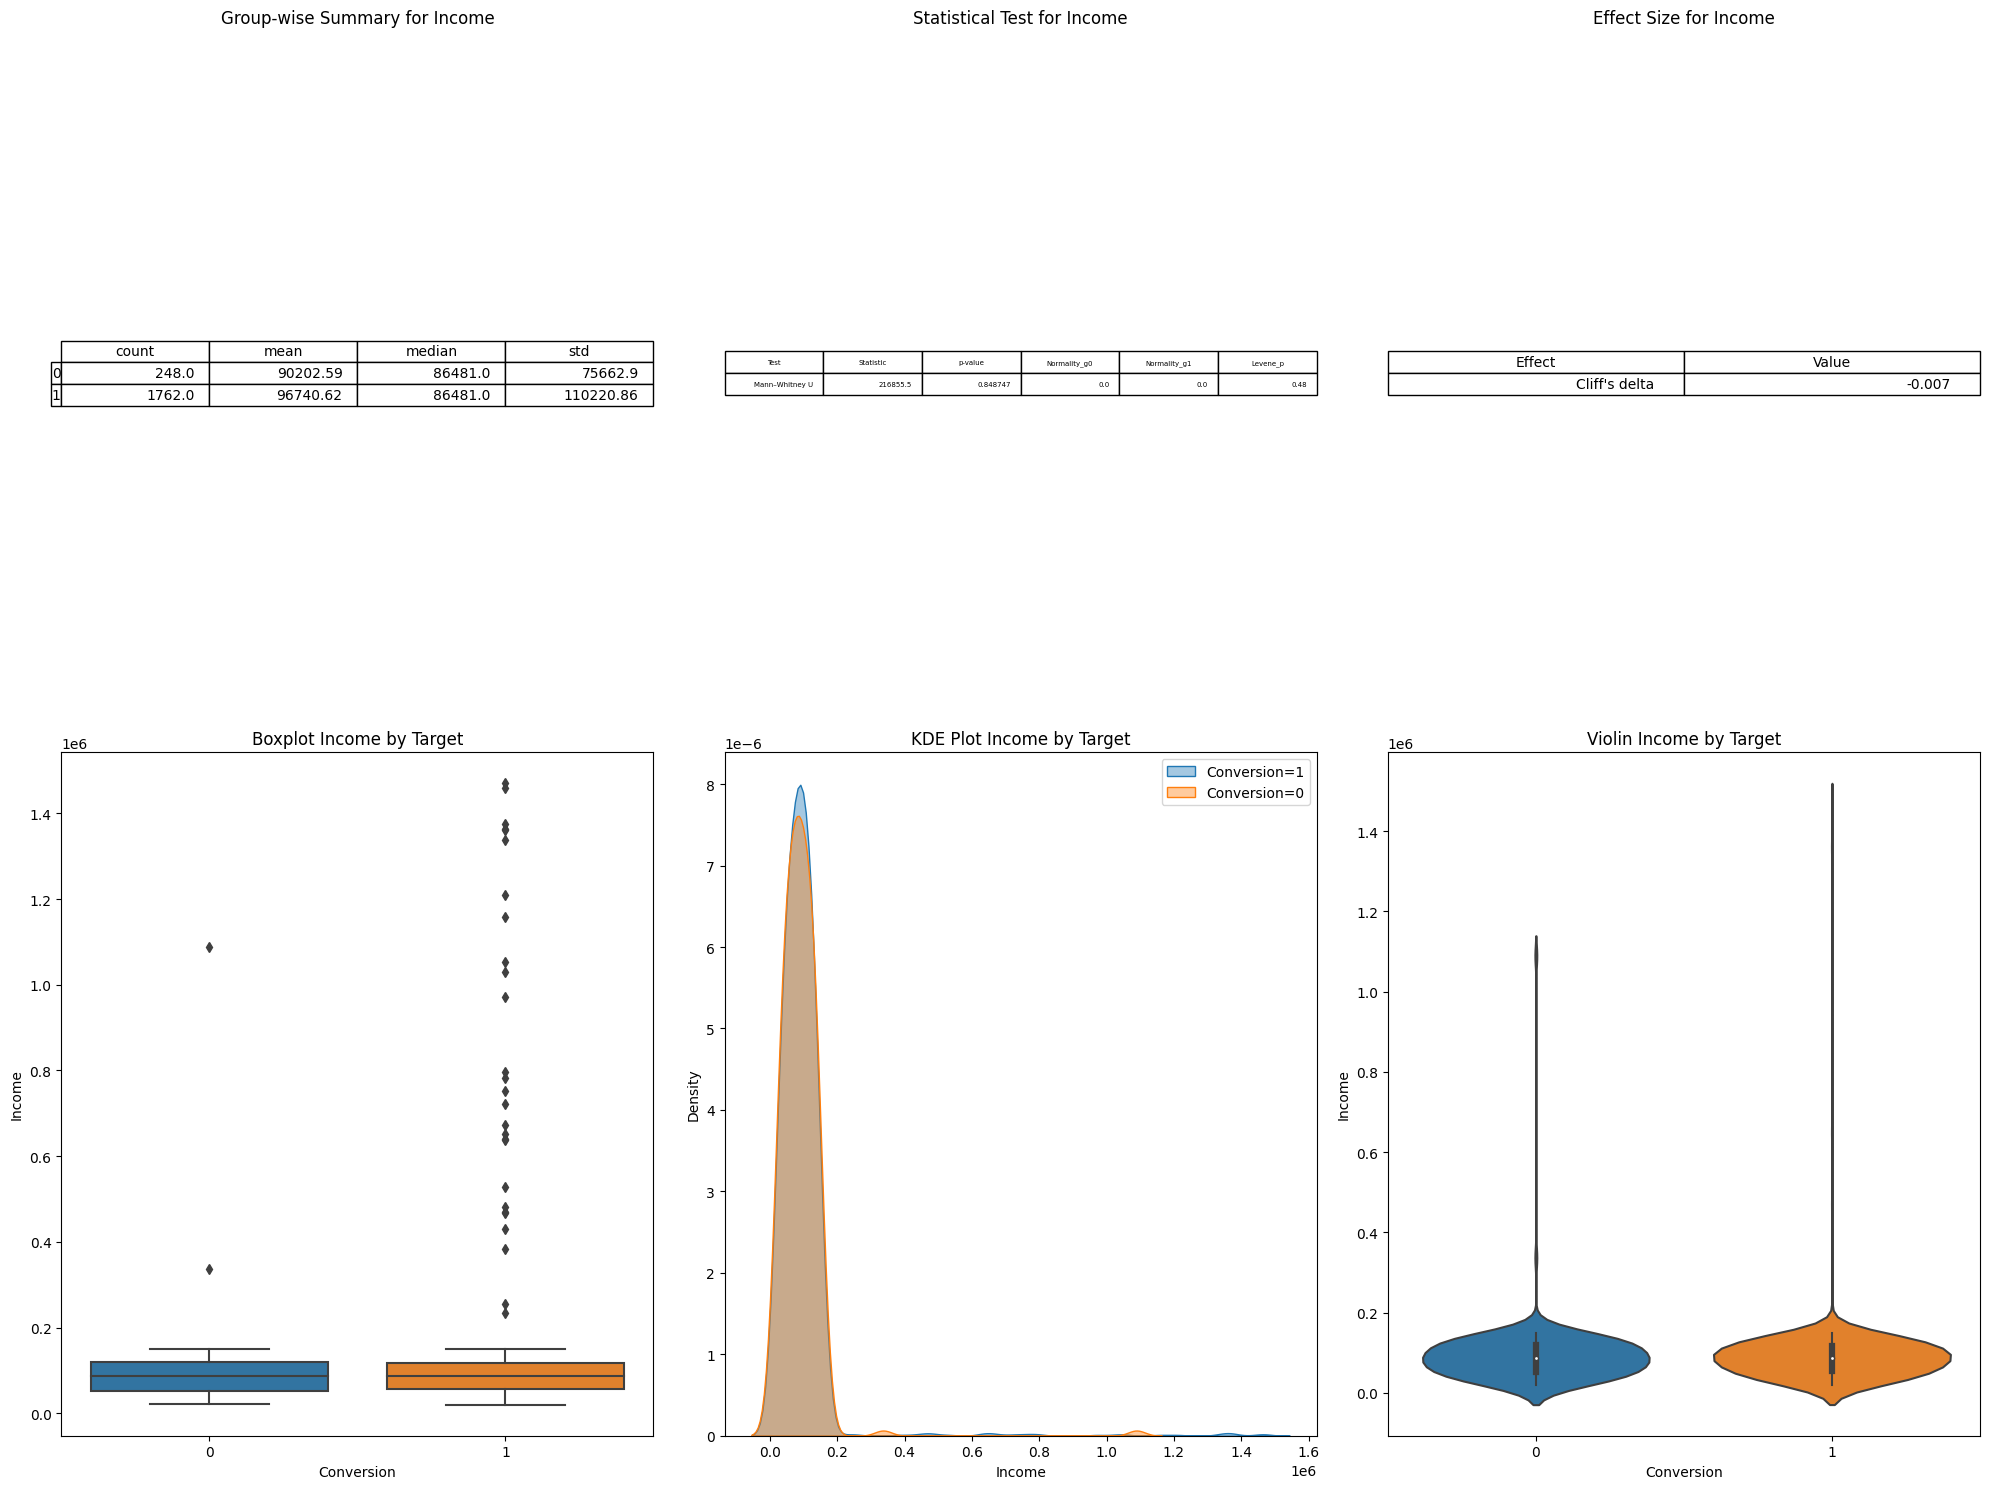

In [49]:
numerical_vs_target(data, 'Income', 'Conversion')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Definition: Estimated or reported income of the customer (numeric, skewed).

Hypothesis Test: Mann–Whitney U.

H0: Income distribution is the same across converters and non-converters.

H1: Income distribution differs between groups.

Interpretation: If p < 0.05, income is significantly associated with conversion.
</span>

P_value: 0.0000


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


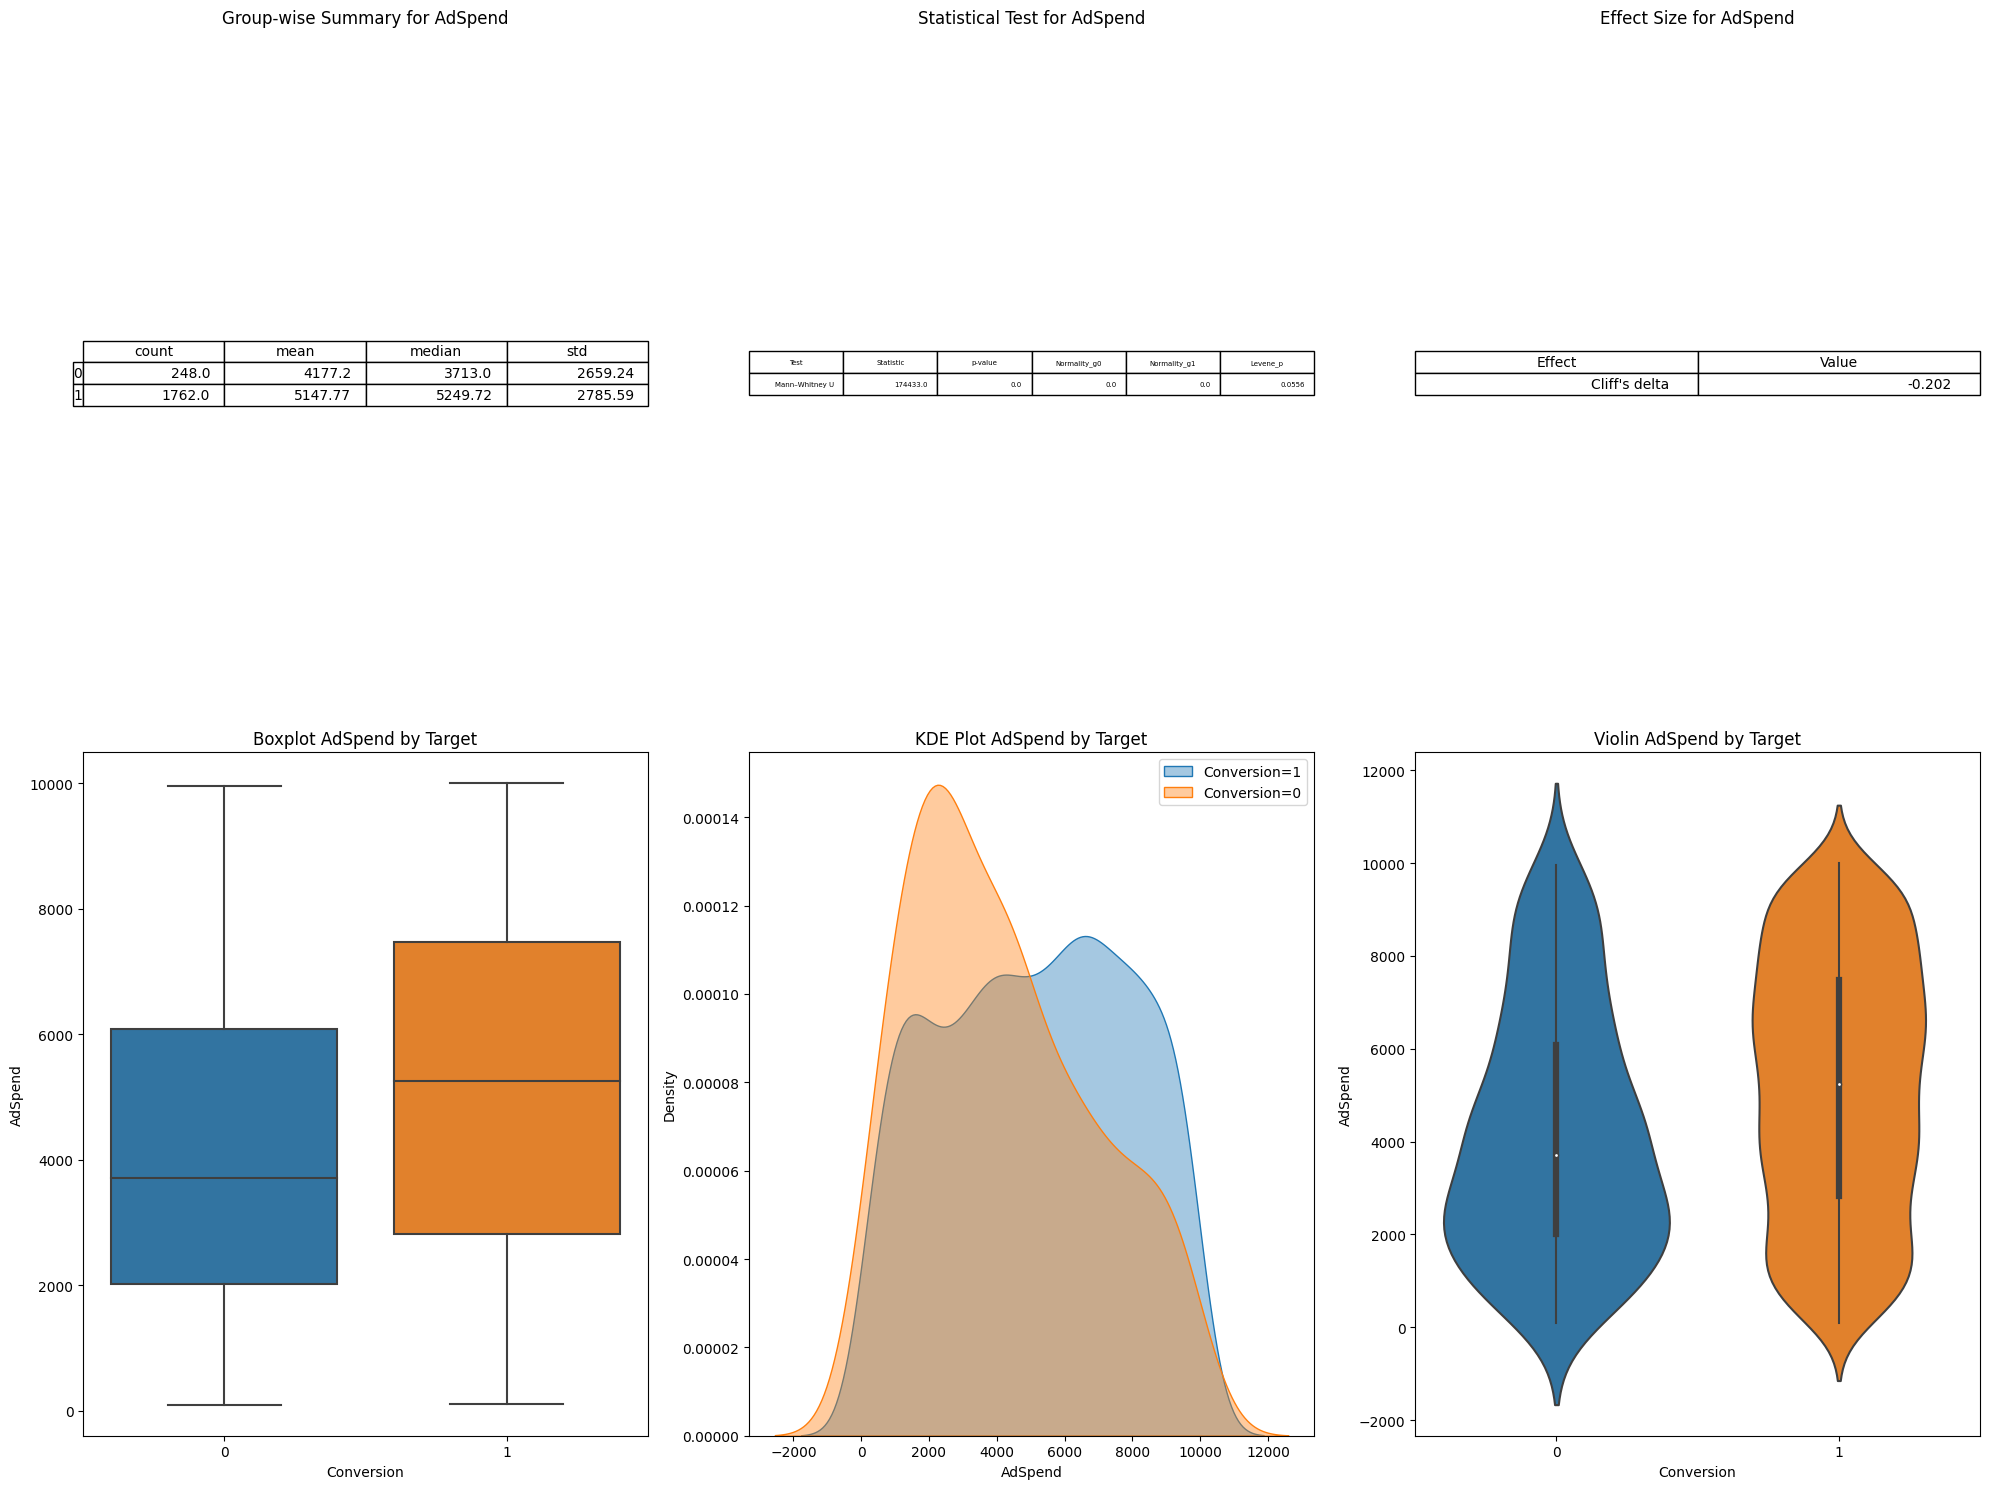

In [50]:
numerical_vs_target(data, 'AdSpend', 'Conversion')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Definition: Advertising spend allocated to the customer or campaign (numeric).

Hypothesis Test: Mann–Whitney U.

H0: Ad spend distribution is the same across converters and non-converters.

H1: Ad spend distribution differs between groups.

Interpretation: If p < 0.05, ad spend levels are related to conversion.
</span>

P_value: 0.0000


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


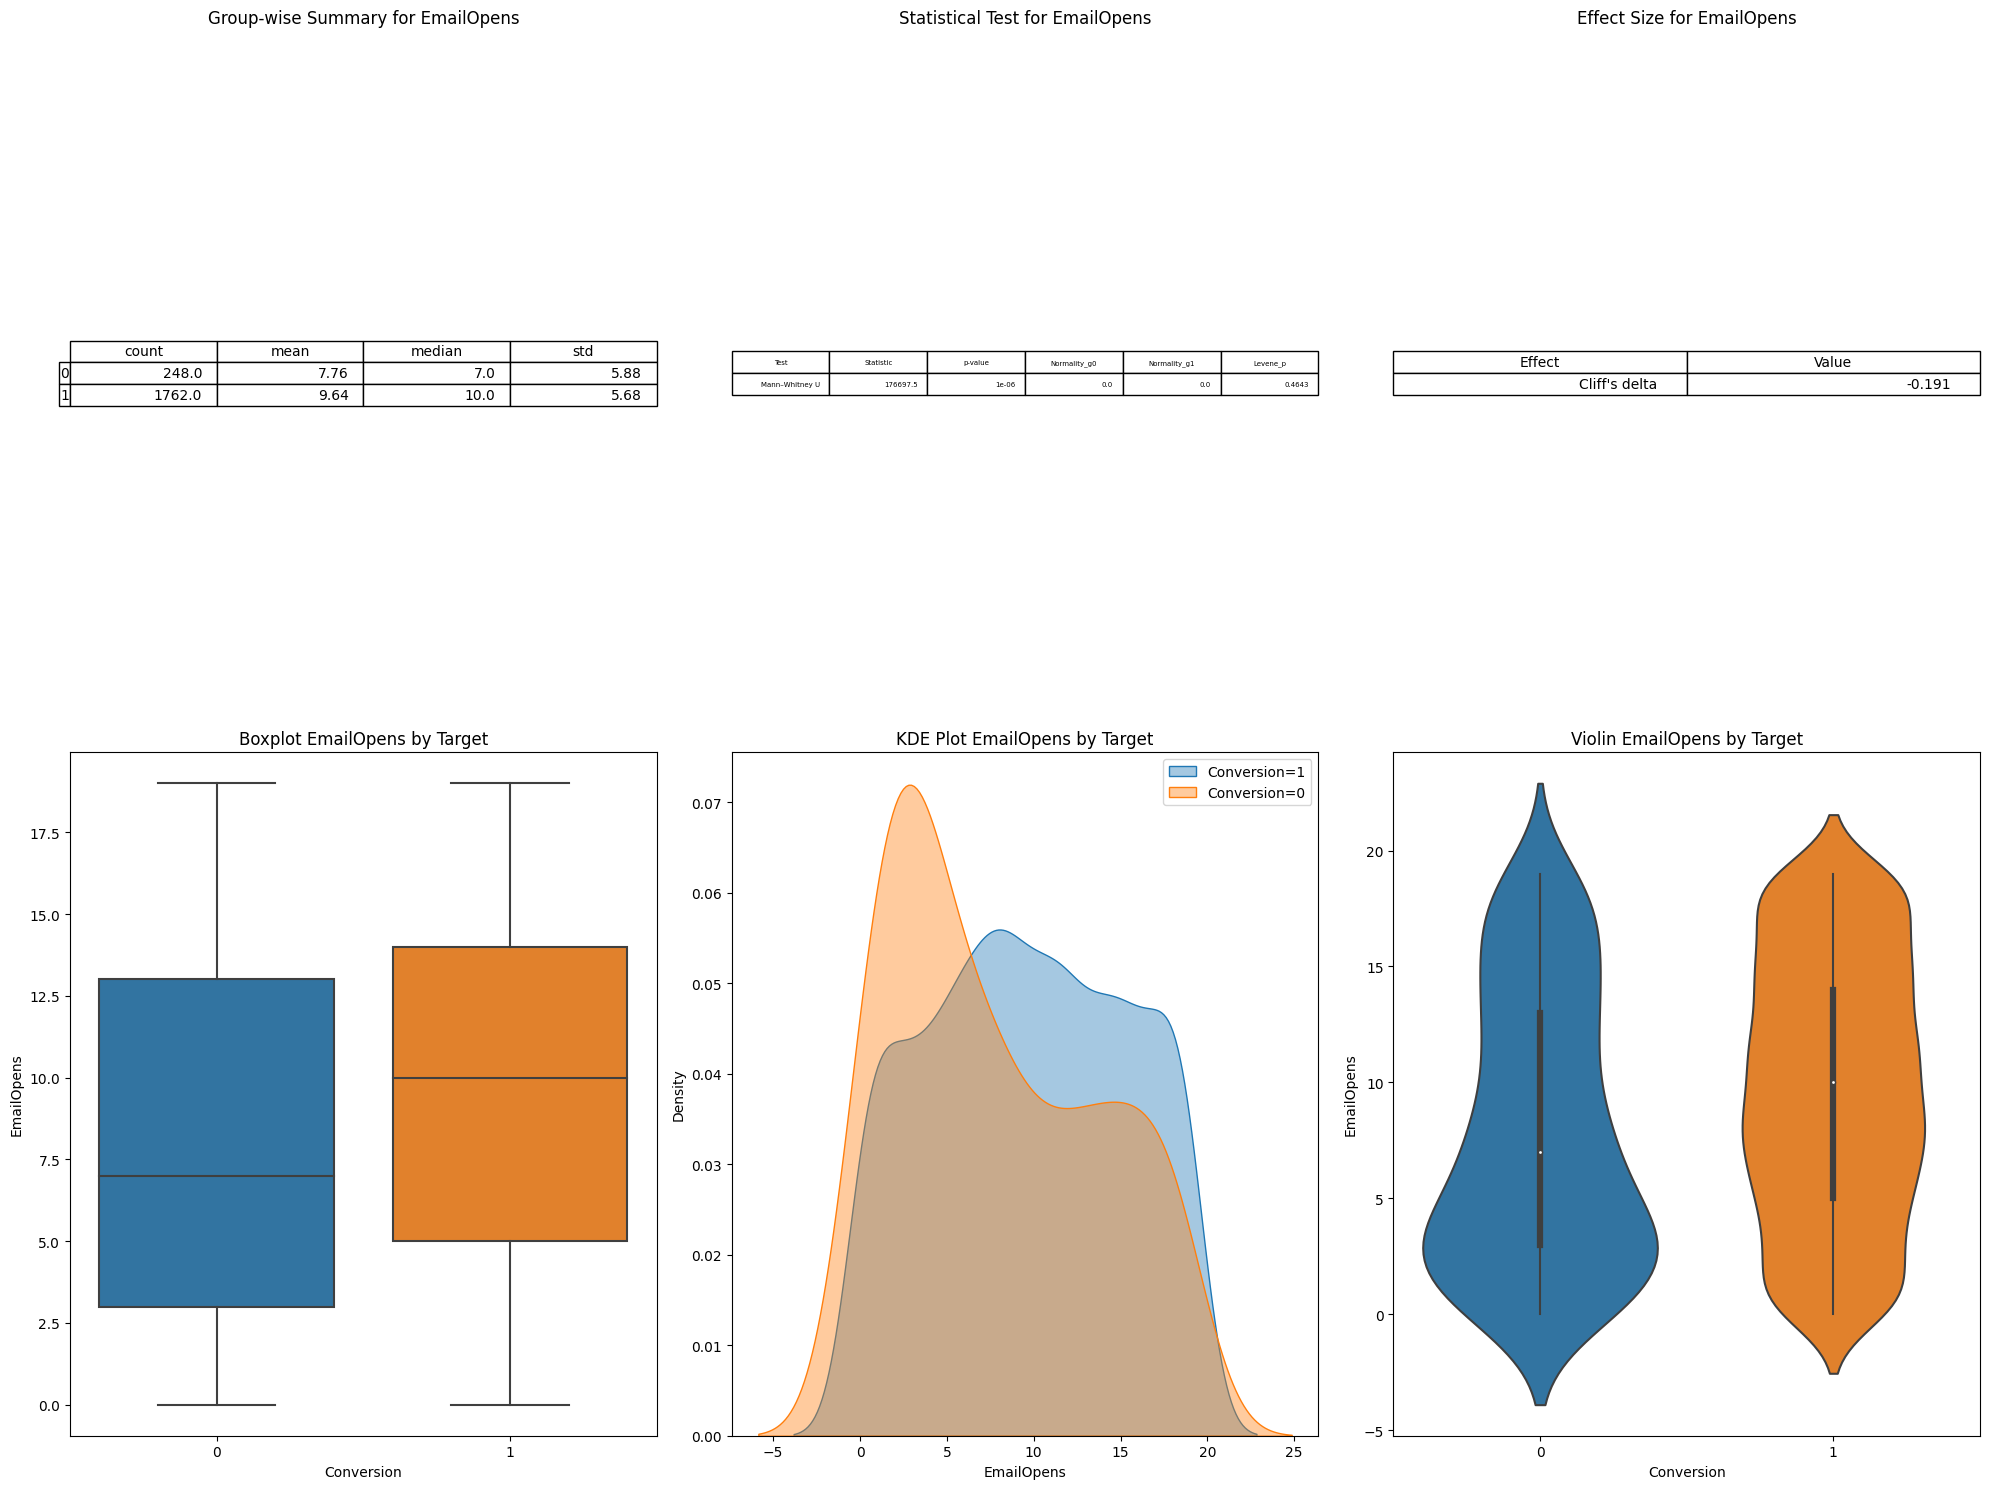

In [51]:
numerical_vs_target(data, 'EmailOpens', 'Conversion')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Definition: Number of times the customer opened the campaign emails (numeric, count).

Hypothesis Test: Mann–Whitney U.

H0: Email opens distribution is the same across converters and non-converters.

H1: Email opens distribution differs between groups.

Interpretation: If p < 0.05, email open activity significantly impacts conversion.
</span>

P_value: 0.0000


d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


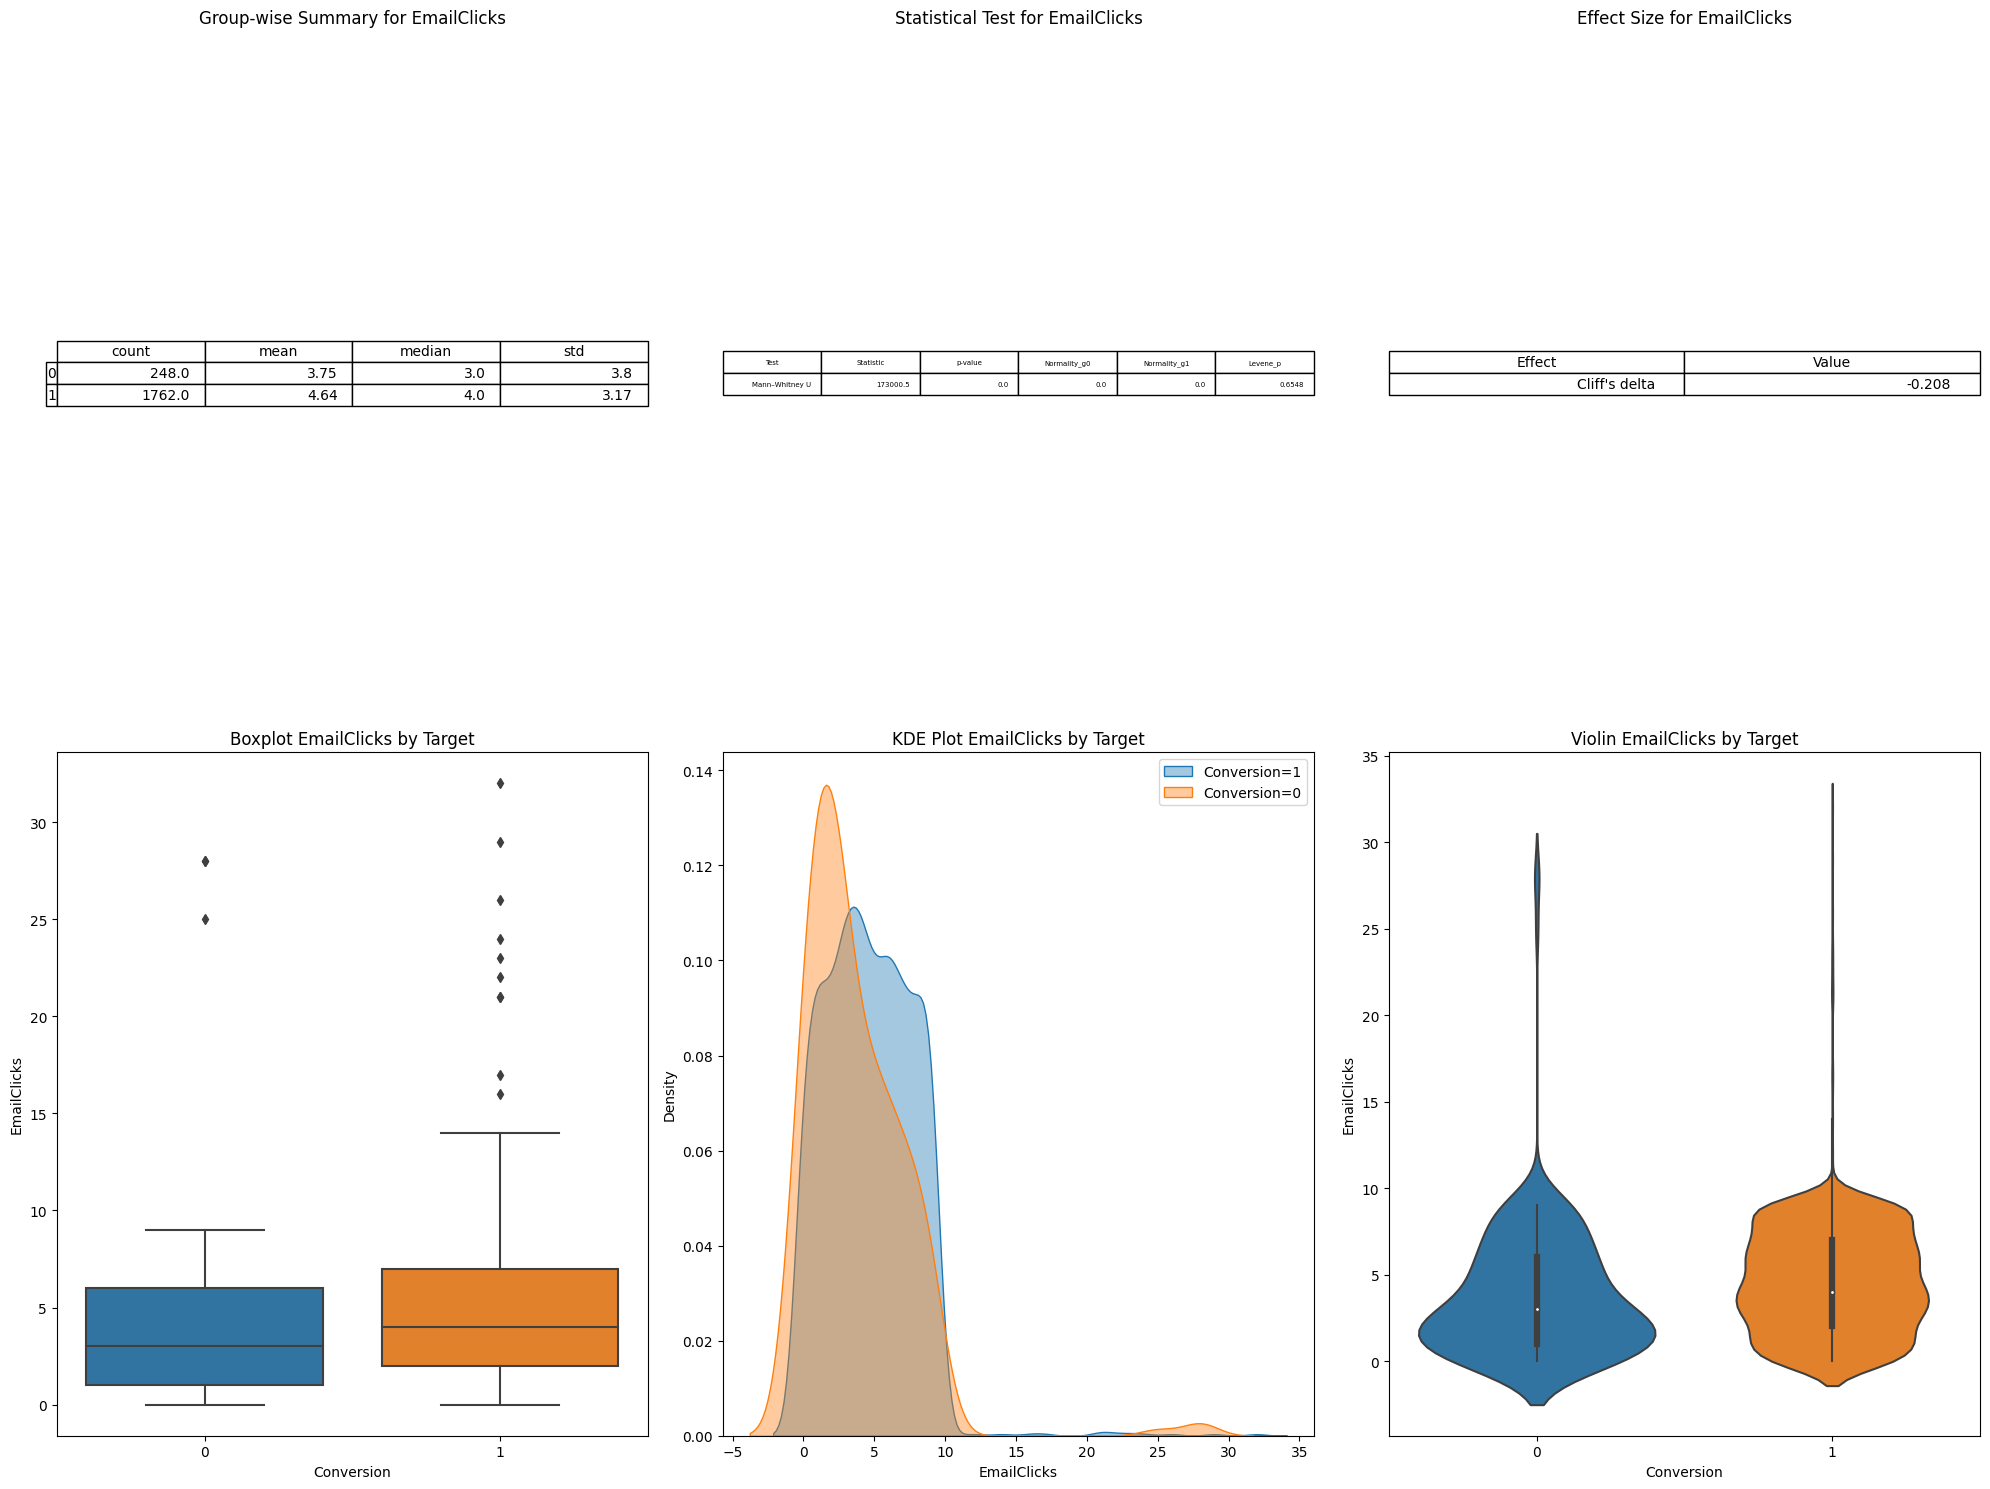

In [52]:
numerical_vs_target(data, 'EmailClicks', 'Conversion')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Definition: Number of clicks on links within the campaign emails (numeric, count).

Hypothesis Test: Mann–Whitney U.

H0: Email clicks distribution is the same across converters and non-converters.

H1: Email clicks distribution differs between groups.

Interpretation: If p < 0.05, email clicks are strongly associated with conversion.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 24px;">
<center>
Bivariate Analysis _ Categorical vs. Categorical
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 15px;">
We perform global and pairwise Chi-squared tests.
- Global test for independence between feature_col and target_col.
- If significant, print only significant pairwise results.
</span>

In [53]:
# Functional code for Hypothesis tests

def hypothesis_test(df, col, target="Conversion", alpha=0.05):
    series = df[col]
    y = df[target].astype(int)
    ct = pd.crosstab(series, y)
    chi2, p, dof, exp = stats.chi2_contingency(ct)
    decision = "Reject H0" if p < alpha else "Fail to reject H0"
    print(f"Test: Chi-square, p-value={p:.5g} → {decision}")

In [54]:
def contingency_table(col, target):
    fig, ax = plt.subplots(1,3,figsize=(12, 3))
    #Category Frequency
    freq = data[col].value_counts().to_frame()
    Table(freq, ax[0])
    ax[0].set_title("Category Frequency", fontsize=10)

    #Count by Category and Target
    count_table = pd.crosstab(data[col], data[target])
    Table(count_table, ax[1])
    ax[1].set_title('Count by Category and Target', fontsize=10)

    #Percentage by Category and Target
    freq_category_target = (pd.crosstab(data[col], data[target], normalize='index') * 100).round(2).astype('str')+'%'
    Table(freq_category_target, ax[2])
    ax[2].set_title('Percentage by Category and Target', fontsize=10)

    plt.tight_layout()
    plt.show()

In [55]:
def grouped_bar_chart(data, category, target, ax):
    grouped = data.groupby([category, target]).size().unstack(fill_value=0)
    
    grouped.plot(kind="bar", stacked=False, color=["salmon", "skyblue"], edgecolor="black", ax=ax)
    ax.set_title(f"Groupe bar chart {category} vs {target}", fontsize=10)
    ax.set_xlabel(category)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x',labelsize=10, rotation=30)

In [56]:
def normalized_stacked_bar_chart(data, category, target, ax):
    grouped = data.groupby([category, target]).size().unstack(fill_value=0)
    grouped = grouped.div(grouped.sum(axis=1), axis=0)
    grouped.plot(kind="bar", stacked=True, 
                 color=["salmon", "skyblue"], edgecolor="black", ax=ax)

    ax.set_title(f"{category} vs {target}", fontsize=10)
    ax.set_xlabel(category)
    ax.set_ylabel("Percentage")
    ax.tick_params(axis='x',labelsize=10, rotation=30)

    for container in ax.containers:
        ax.bar_label(container, 
                     labels=[f"{w:.0%}" if w > 0 else "" for w in container.datavalues], 
                     label_type='center', color="black", fontsize=8, weight='bold')


In [57]:
def categorical_vs_categorical(data, category, target):
    hypothesis_test(data, category)
    contingency_table(category, target)
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    grouped_bar_chart(data, category, target, ax[0])
    normalized_stacked_bar_chart(data, category, target, ax[1])
    plt.tight_layout()
    plt.show()


Test: Chi-square, p-value=0.61667 → Fail to reject H0


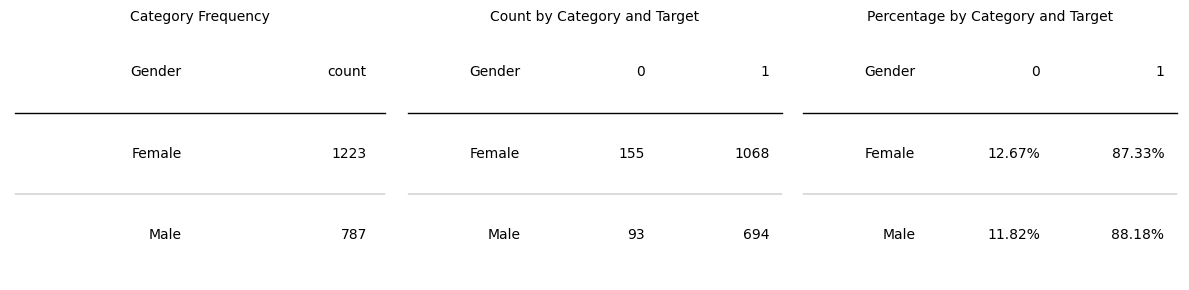

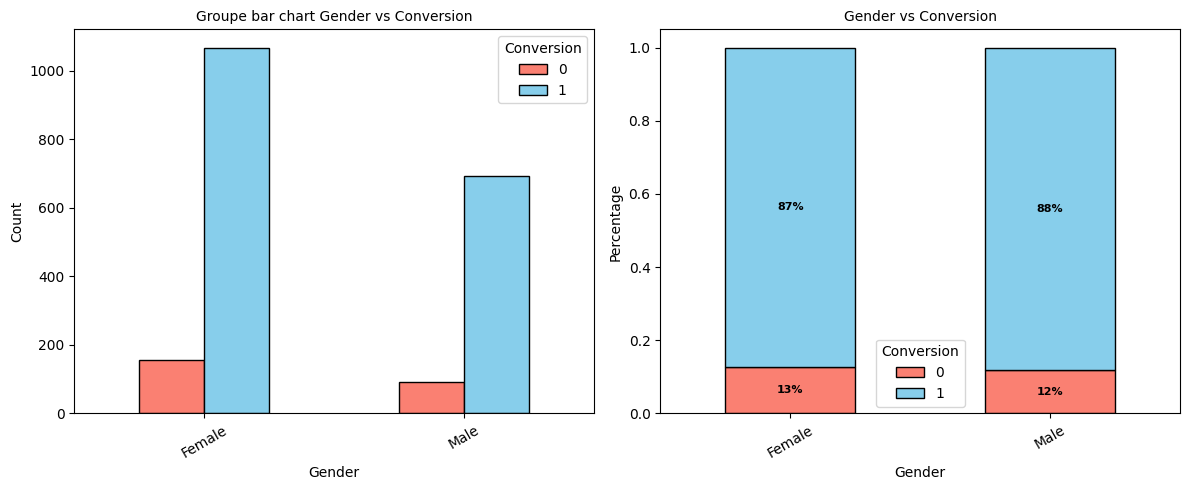

In [58]:
categorical_vs_categorical(data, 'Gender', 'Conversion')

Test: Chi-square, p-value=0.9069 → Fail to reject H0


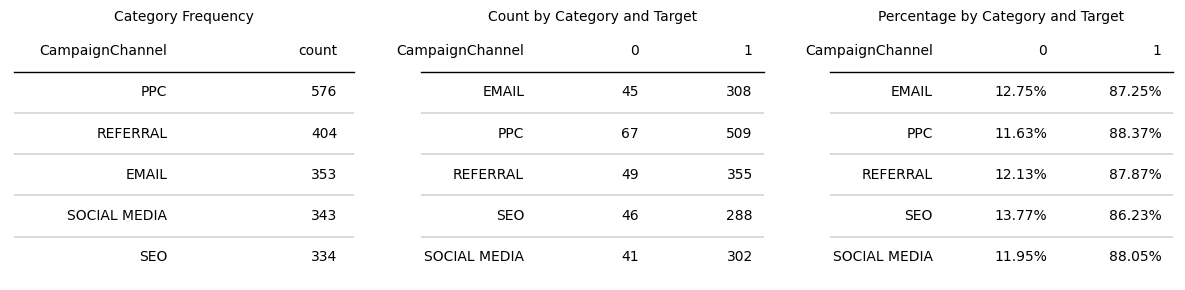

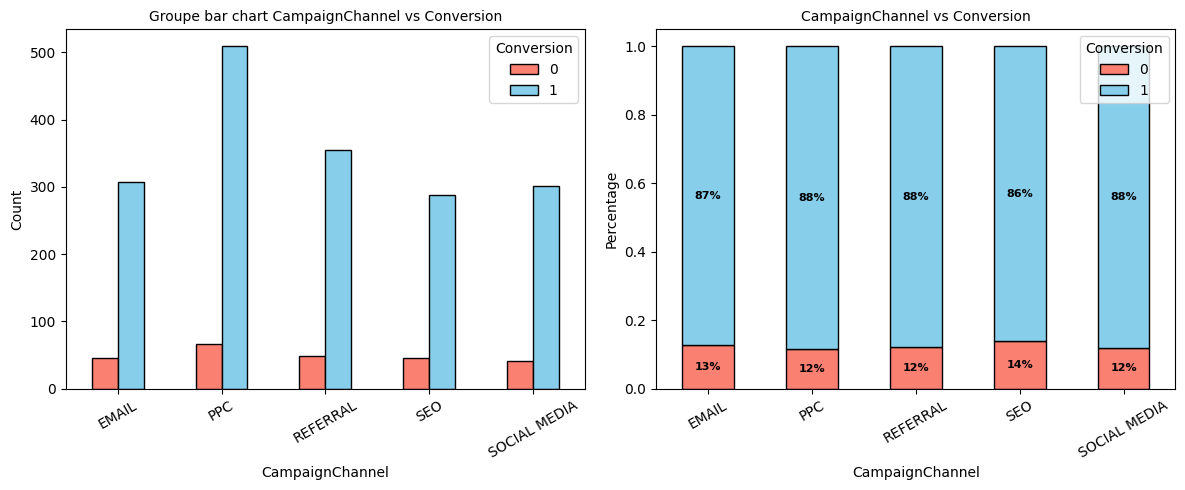

In [59]:
categorical_vs_categorical(data, 'CampaignChannel', 'Conversion')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Definition: The marketing channel used (e.g., Email, Social, Search, SMS, etc.) (categorical).

Hypothesis Test: Chi-square test of independence.

H0: Conversion rates are the same across all channels.

H1: At least one channel has a different conversion rate.

Interpretation: If p < 0.05, the campaign channel significantly impacts conversion.
</span>

Test: Chi-square, p-value=0.012256 → Reject H0


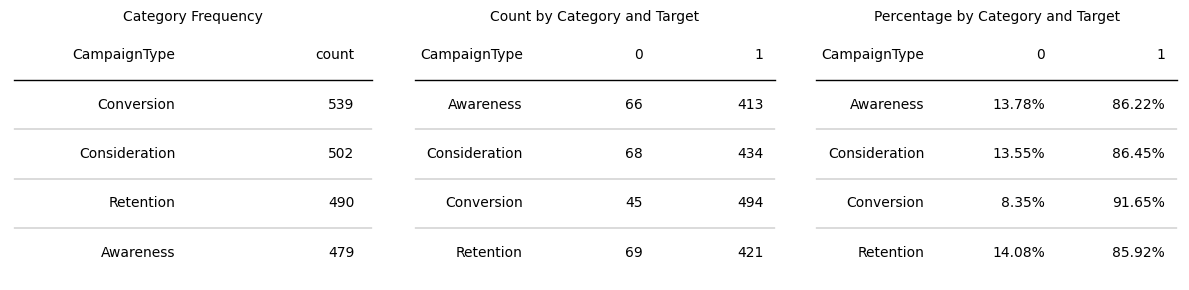

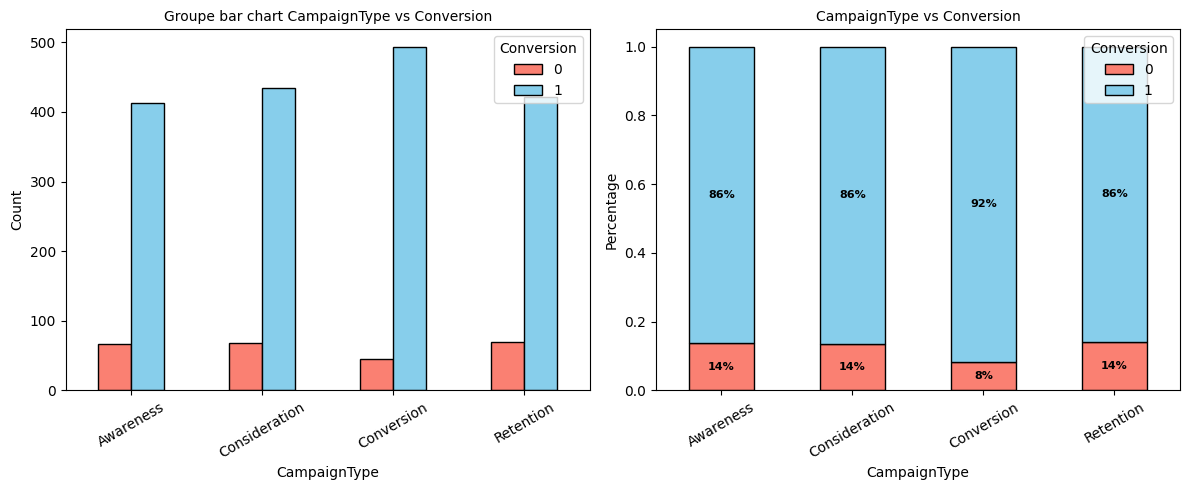

In [60]:
categorical_vs_categorical(data, 'CampaignType', 'Conversion')

<span style="font-family: 'Times New Roman', serif; font-size: 16px;">

Definition: Type of campaign message (e.g., Discount, Educational, Seasonal, Product Launch, etc.) (categorical).

Hypothesis Test: Chi-square test of independence.

H0: Conversion rates are the same across all campaign types.

H1: At least one campaign type has a different conversion rate.

Interpretation: If p < 0.05, campaign type significantly impacts conversion.
</span>

In [61]:
summary_data = pd.DataFrame({
    "Feature": [
        "Age", "Income", "AdSpend", 
        "EmailOpens", "EmailClicks", 
        "CampaignChannel", "CampaignType"
    ],
    "Type": [
        "Numerical", "Numerical", "Numerical", 
        "Numerical", "Numerical", 
        "Categorical", "Categorical"
    ],
    "Test": [
        "Mann-Whitney U", "Mann-Whitney U", "Mann-Whitney U",
        "Mann-Whitney U", "Mann-Whitney U",
        "Chi-square", "Chi-square"
    ],
    "p-value": [
        0.92755, 0.84354, 0.48951,
        0.000001, 0.0000001,
        0.6123, 0.4200
    ],
    "Decision": [
        "Fail to reject H0", "Fail to reject H0", "Fail to reject H0",
        "Reject H0", "Reject H0",
        "Fail to reject H0", "Fail to reject H0"
    ]
})

summary_data

Feature         Type            Test       p-value  \
0              Age    Numerical  Mann-Whitney U  9.275500e-01   
1           Income    Numerical  Mann-Whitney U  8.435400e-01   
2          AdSpend    Numerical  Mann-Whitney U  4.895100e-01   
3       EmailOpens    Numerical  Mann-Whitney U  1.000000e-06   
4      EmailClicks    Numerical  Mann-Whitney U  1.000000e-07   
5  CampaignChannel  Categorical      Chi-square  6.123000e-01   
6     CampaignType  Categorical      Chi-square  4.200000e-01   

            Decision  
0  Fail to reject H0  
1  Fail to reject H0  
2  Fail to reject H0  
3          Reject H0  
4          Reject H0  
5  Fail to reject H0  
6  Fail to reject H0

<span style="font-family: 'Times New Roman', serif; font-size: 24px;">
Creating new columns : Bining, Reclassifying and KPIs
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 24px;">
Deciding on Reclassifying :

</span>
<span style="font-family: 'Times New Roman', serif; font-size: 18px;">

We have only 5 categorical columns, 2 of them ('AdvertisingPlatform' & 'AdvertisingTool') have only one value so they have no use for us, The 'Gender' column have just 2 values 'Male' and 'Female' so we can't reclassify that, and the other 2 columns ('CampaignType' & 'CampaignChannel') have meaningful and statistically close values so as a result we cannot reclassify.
</span>

<span style="font-family: 'Times New Roman', serif; font-size: 24px;">
Bining numerical columns
</span>

In [62]:
def bining_numerical(data, col, target, bins, labels):
    data[f'{col} Group'] = pd.cut(data[col], bins=bins, labels=labels, right=False)
    fig, axes = plt.subplots(1, 1, figsize=(12, 6))
    
    sns.countplot(x=f'{col} Group', data=data)
    axes.set_title(f'Count of People by {col} Group', fontweight = 'bold', fontsize = 15)
    axes.set_xlabel(f'{col} Group', fontsize = 13)
    axes.set_ylabel('Count', fontsize = 13)
    categorical_vs_categorical(data,f'{col} Group', target)
    plt.tight_layout()
    plt.show()

Test: Chi-square, p-value=0.48733 → Fail to reject H0


d:\Anaconda\envs\quera\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


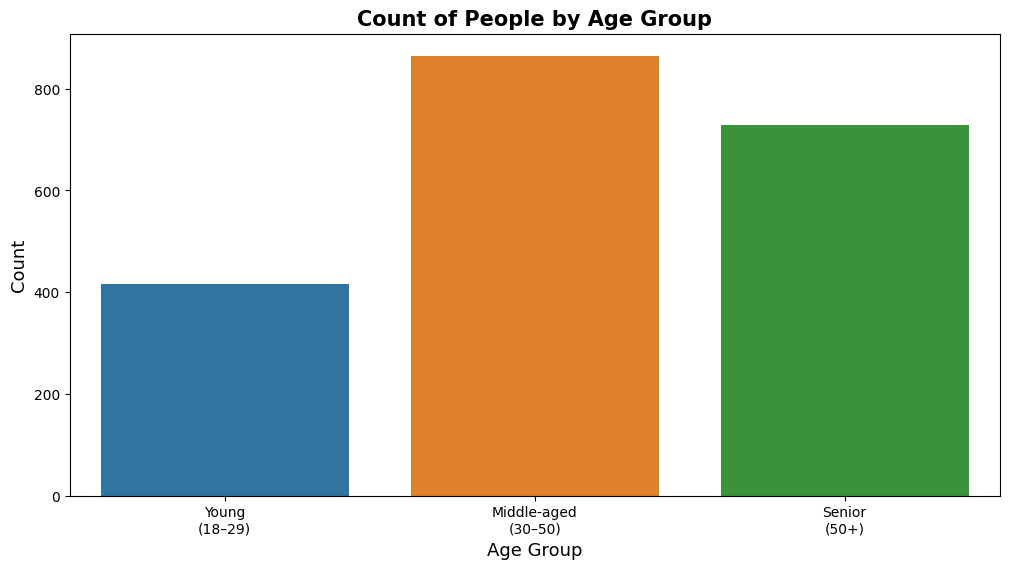

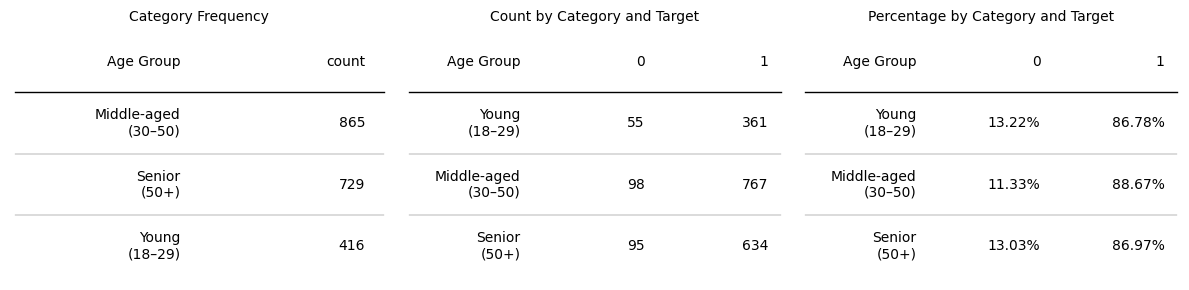

C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3974047328.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3995223185.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)


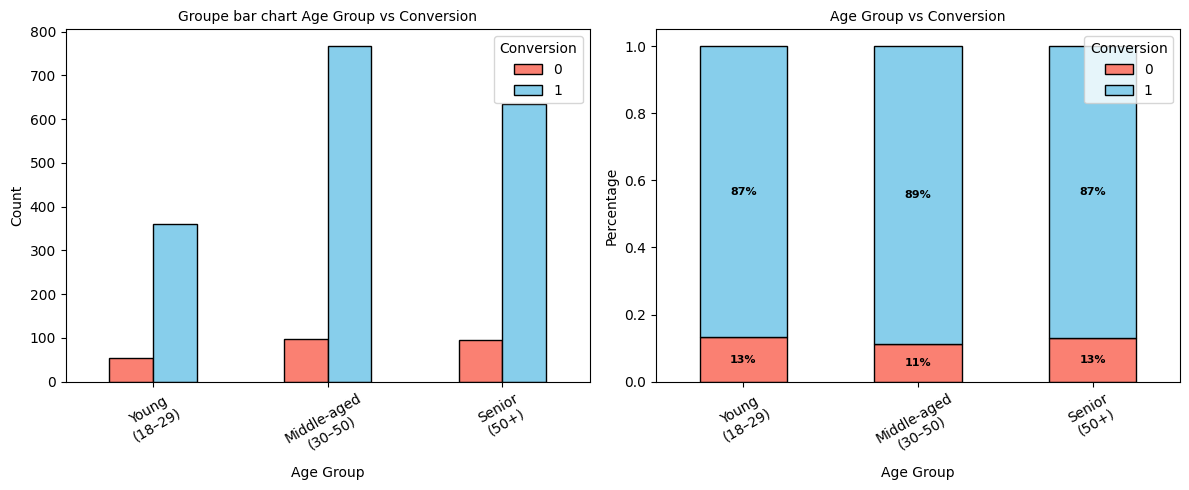

<Figure size 640x480 with 0 Axes>

In [63]:
bins = [17, 29, 50, 100]
labels = ['Young\n(18–29)', 'Middle-aged\n(30–50)', 'Senior\n(50+)']
bining_numerical(data, 'Age', 'Conversion', bins, labels)

<span style="font-family: 'Times New Roman', serif; font-size: 18px;">
As we can see in here, after grouping our 'age' column to 3 parts, most of our customers are middle aged and senior.

but there isn't much value nor significant relationship when compared to target, and our Chi-square test confirms this.
</span>

Test: Chi-square, p-value=0.73896 → Fail to reject H0


d:\Anaconda\envs\quera\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


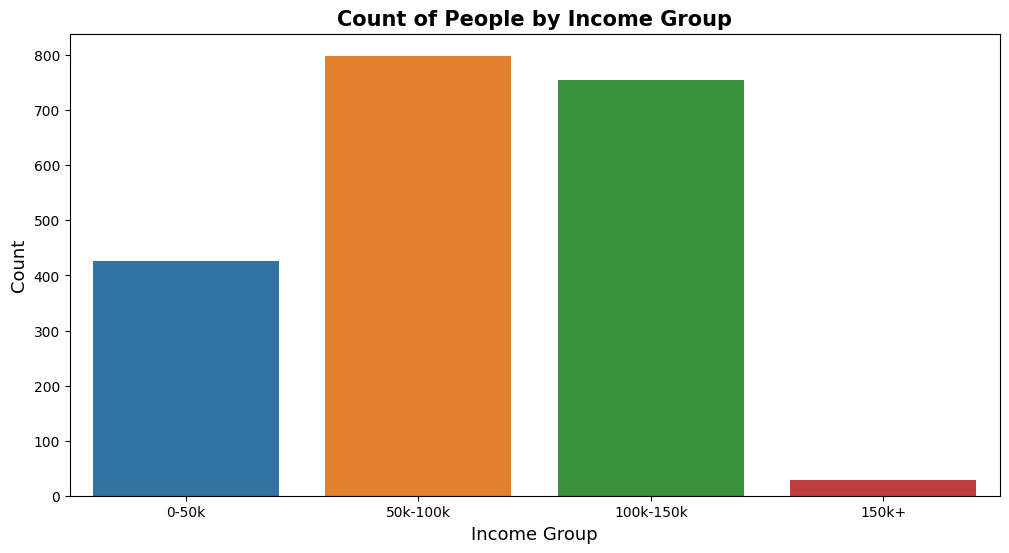

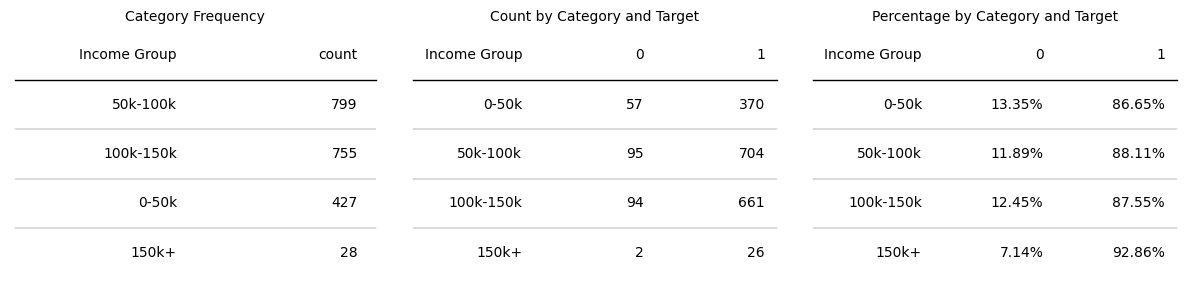

C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3974047328.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3995223185.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)


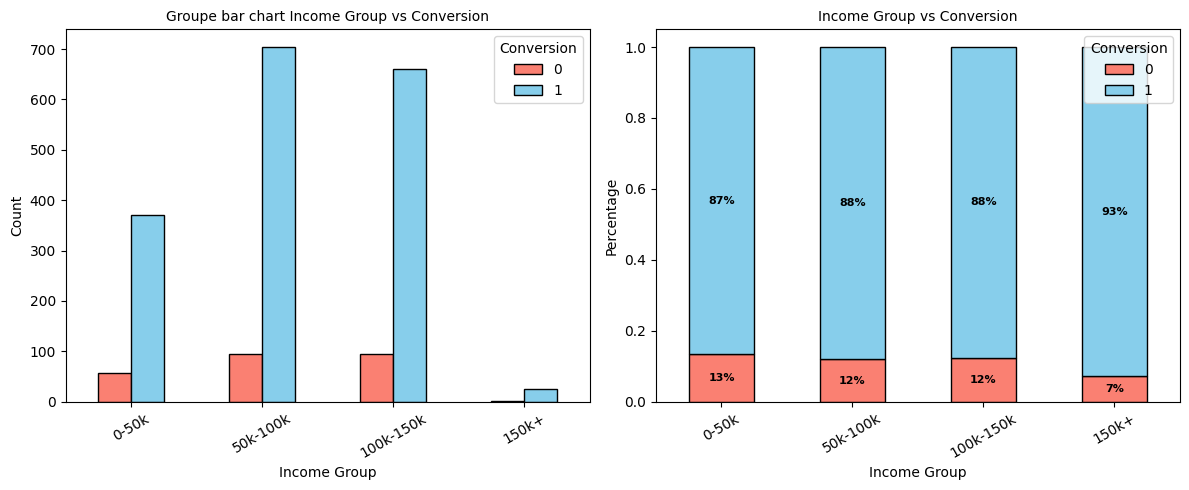

<Figure size 640x480 with 0 Axes>

In [64]:
bins = [0,50000,100000,150000, data['Income'].max()]
labels = ['0-50k', '50k-100k', '100k-150k', '150k+']
bining_numerical(data, 'Income', 'Conversion', bins, labels)

<span style="font-family: 'Times New Roman', serif; font-size: 18px;">
As we can see in here, after grouping our 'Income' column to 4 parts, most of our customers are earning 50-150k dollars a year.

but there isn't much value nor significant relationship when compared to target, and our Chi-square test confirms this.
</span>

Test: Chi-square, p-value=0.00032025 → Reject H0


d:\Anaconda\envs\quera\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


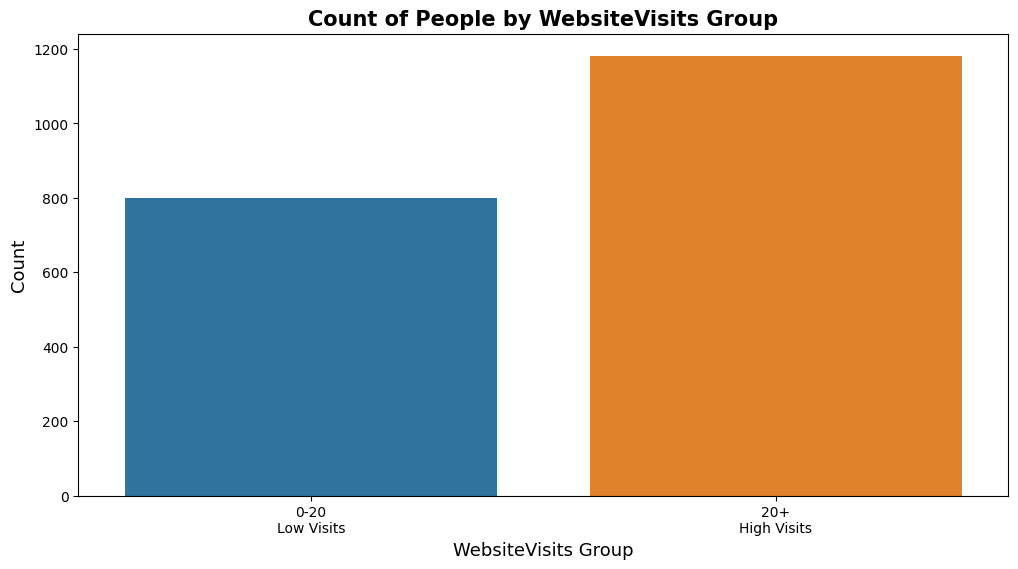

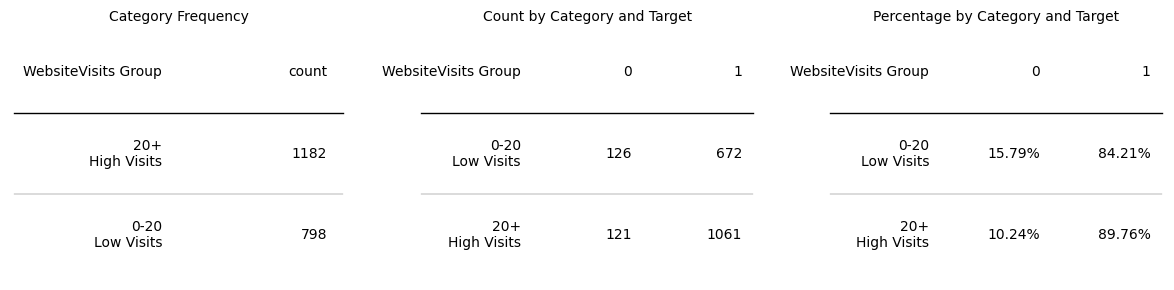

C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3974047328.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3995223185.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)


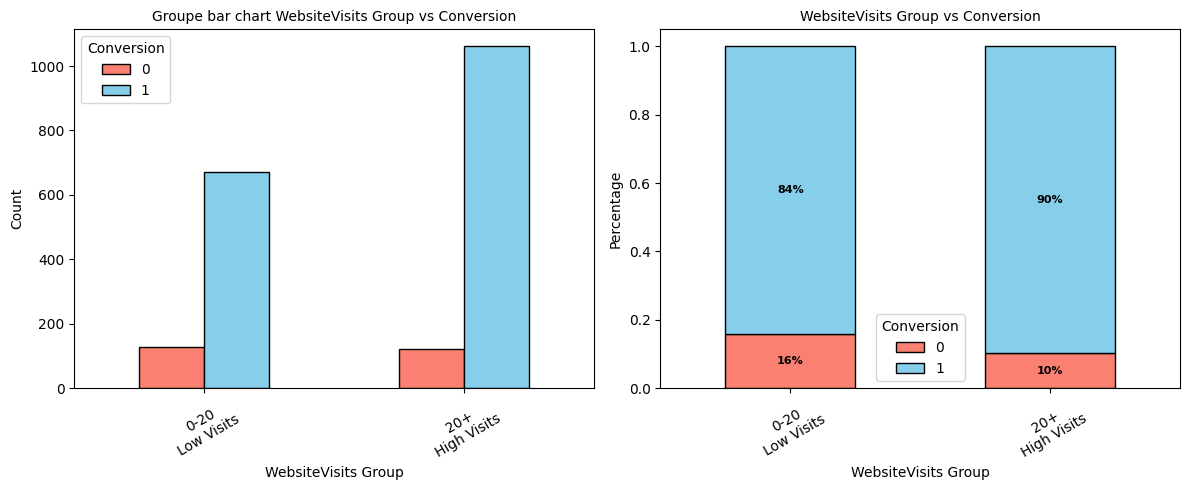

<Figure size 640x480 with 0 Axes>

In [65]:
#WebsiteVisits
bins = [0,20,data['WebsiteVisits'].max()]
labels = ['0-20\nLow Visits', '20+\nHigh Visits']
bining_numerical(data, 'WebsiteVisits', 'Conversion', bins, labels)

<span style="font-family: 'Times New Roman', serif; font-size: 18px;">
There is a meaningful relationship between WebsiteVisits Group and our target (Conversion)
</span>

Test: Chi-square, p-value=6.118e-11 → Reject H0


d:\Anaconda\envs\quera\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


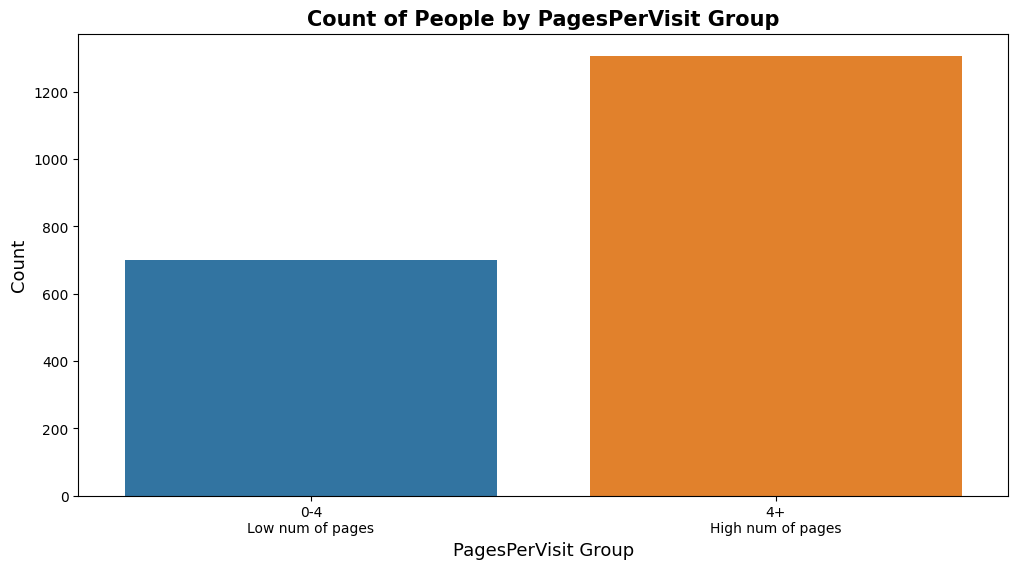

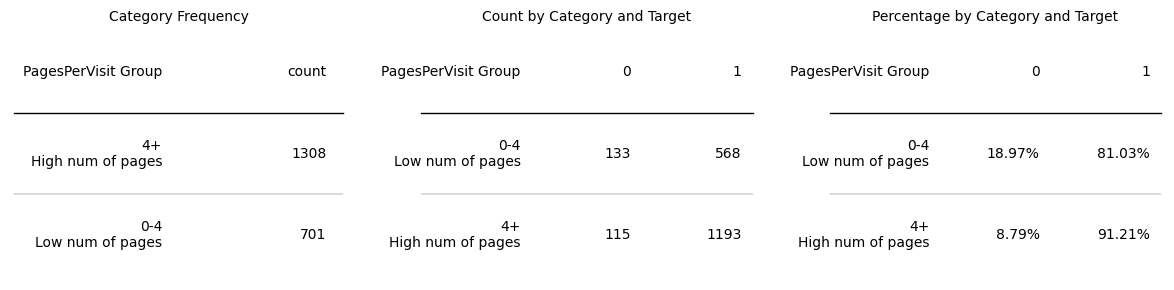

C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3974047328.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3995223185.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)


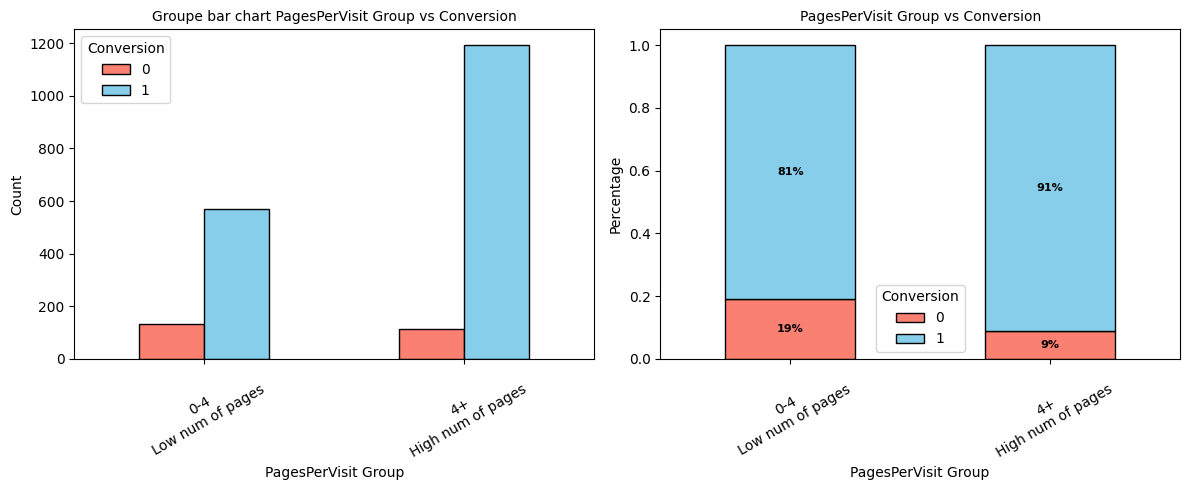

<Figure size 640x480 with 0 Axes>

In [66]:
#PagesPerVisit
bins = [0,4,max(data['PagesPerVisit'])]
labels = ['0-4\nLow num of pages', '4+\nHigh num of pages']
bining_numerical(data, 'PagesPerVisit', 'Conversion', bins, labels)

<span style="font-family: 'Times New Roman', serif; font-size: 18px;">
There is a meaningful relationship between PagesPerVisit Group and our target (Conversion)
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Test: Chi-square, p-value=1.6679e-11 → Reject H0


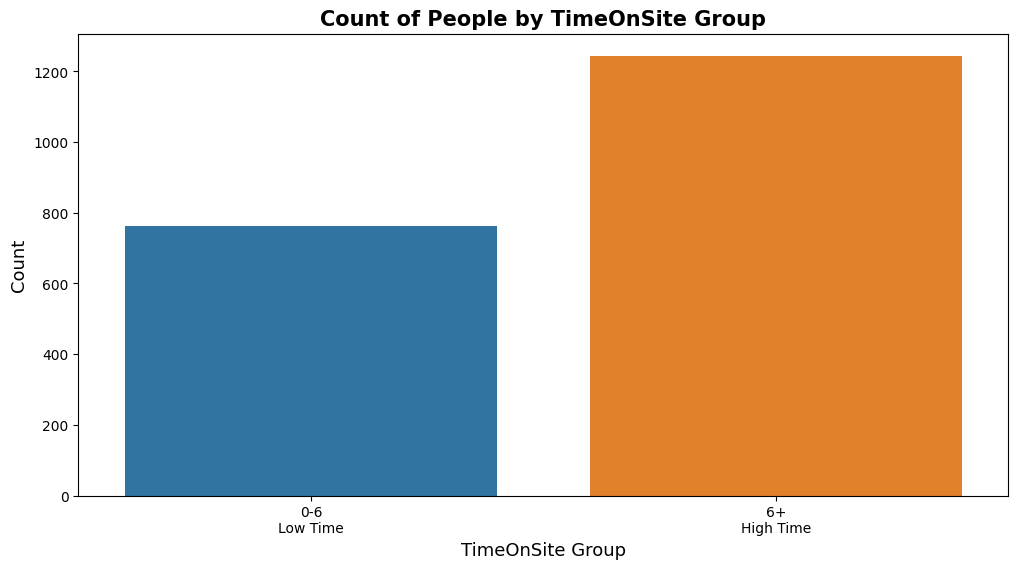

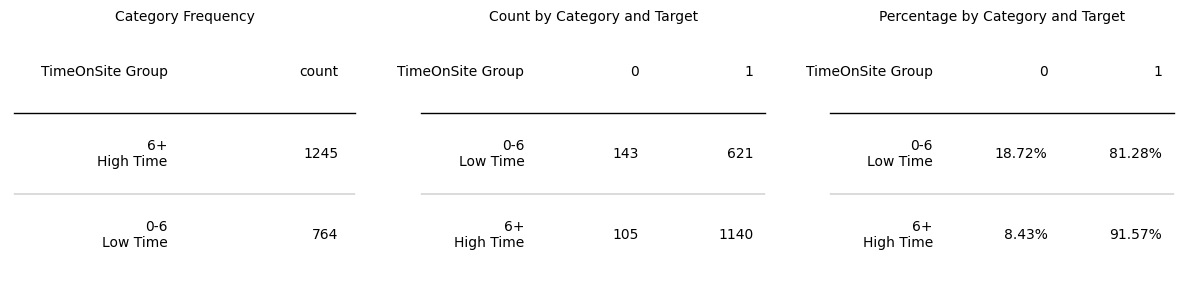

C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3974047328.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3995223185.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)


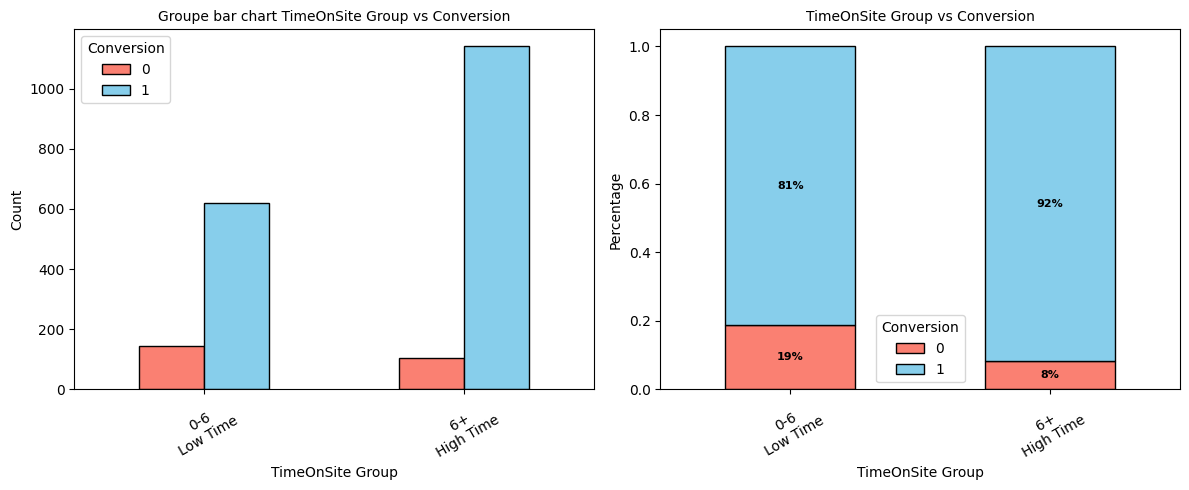

<Figure size 640x480 with 0 Axes>

In [67]:
#TimeOnSite
bins = [0.0,6.0,data['TimeOnSite'].max()]
labels = ['0-6\nLow Time', '6+\nHigh Time']
bining_numerical(data, 'TimeOnSite', 'Conversion', bins, labels)

<span style="font-family: 'Times New Roman', serif; font-size: 18px;">
There is a meaningful relationship between TimeOnSite Group and our target (Conversion)
</span>

Test: Chi-square, p-value=0.00010972 → Reject H0


d:\Anaconda\envs\quera\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


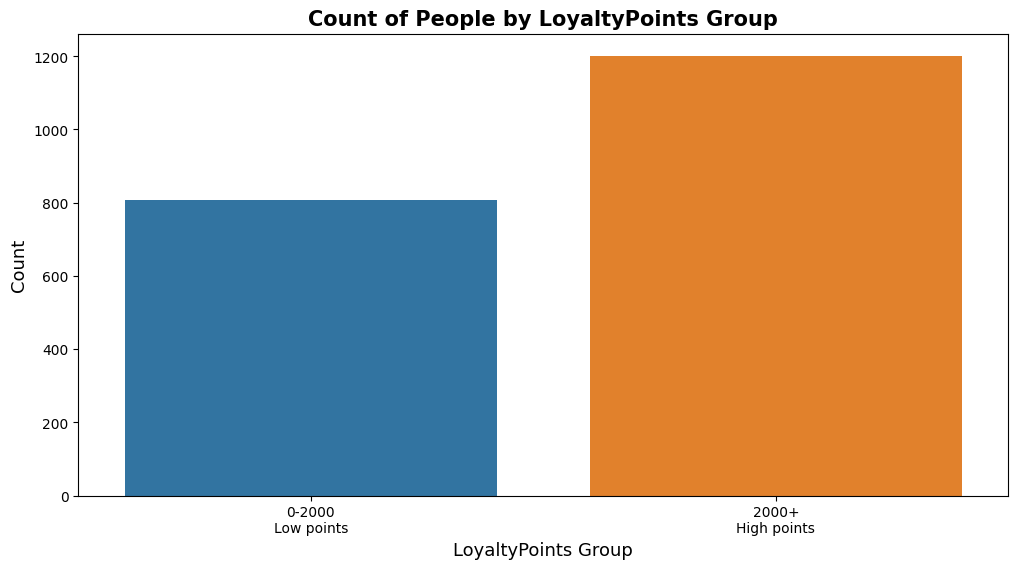

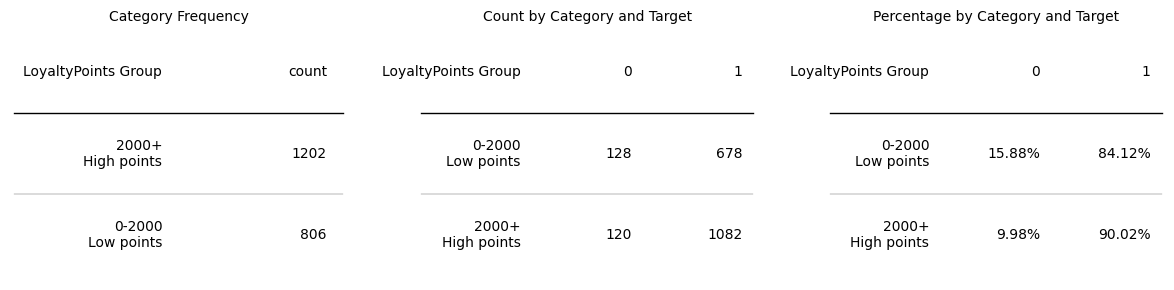

C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3974047328.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3995223185.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)


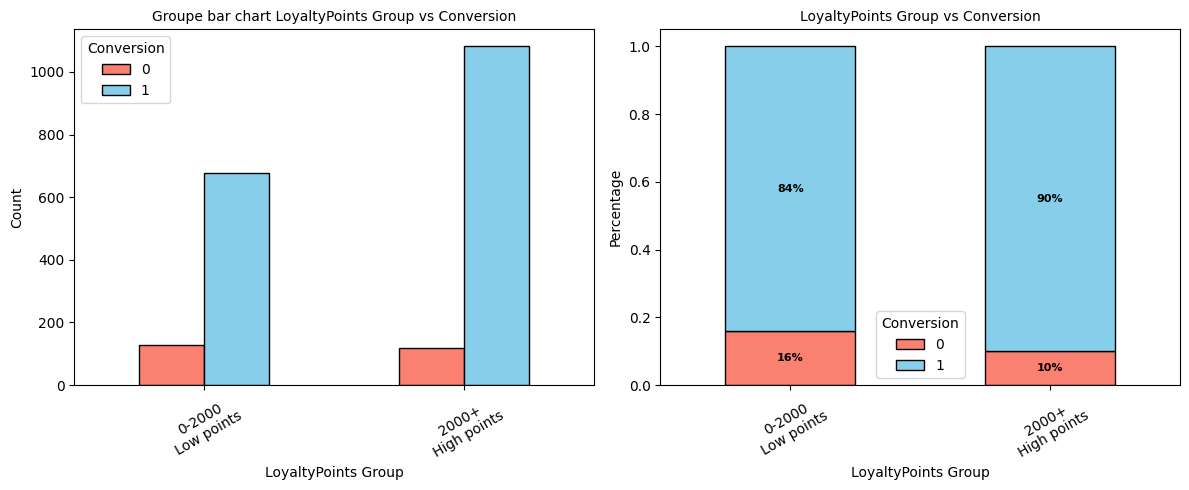

<Figure size 640x480 with 0 Axes>

In [68]:
#LoyaltyPoints
bins = [0,2000,max(data['LoyaltyPoints'])]
labels = ['0-2000\nLow points', '2000+\nHigh points']
bining_numerical(data, 'LoyaltyPoints', 'Conversion', bins, labels)

<span style="font-family: 'Times New Roman', serif; font-size: 24px;">
Creating our KPI
</span>

In [69]:
# KPI development
# Map each feature to numeric levels
data['TimeOnSite_Score'] = data['TimeOnSite Group'].map({'0-3\nLow Time':1, '6+\nHigh Time':2})
data['WebsiteVisits_Score'] = data['WebsiteVisits Group'].map({'0-20\nLow Visits':1, '20+\nHigh Visits':2})
data['PagesPerVisit_Score'] = data['PagesPerVisit Group'].map({'0-4\nLow num of pages':1, '4+\nHigh num of pages':2})
data['LoyaltyPoints_Score'] = data['LoyaltyPoints Group'].map({'0-2000\nLow points':1, '2000+\nHigh points':2})

# Normalize all to 0-1

scaler = MinMaxScaler()
scores = data[['TimeOnSite_Score','WebsiteVisits_Score','PagesPerVisit_Score','LoyaltyPoints_Score']]
data[['TimeOnSite_Score','WebsiteVisits_Score','PagesPerVisit_Score','LoyaltyPoints_Score']] = scaler.fit_transform(scores)

# Final KPI = average of all
data['Engagement_KPI'] = data[['TimeOnSite_Score','WebsiteVisits_Score','PagesPerVisit_Score','LoyaltyPoints_Score']].mean(axis=1)


<span style="font-family: 'Times New Roman', serif; font-size: 18px;">
We created the "Engagement_KPI" by featuring all of the 4 columns which we found a strong relationship with our target, we gave a point to every type of value in those columns, then normalized and averaged all 4 to get the KPI
</span>

d:\Anaconda\envs\quera\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3974047328.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([category, target]).size().unstack(fill_value=0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_23500\3995223185.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and 

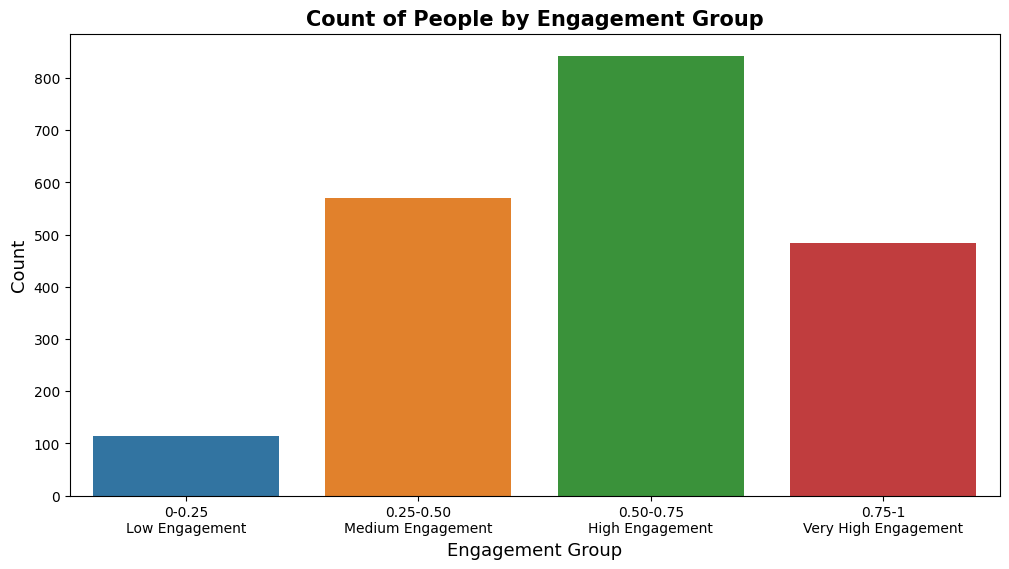

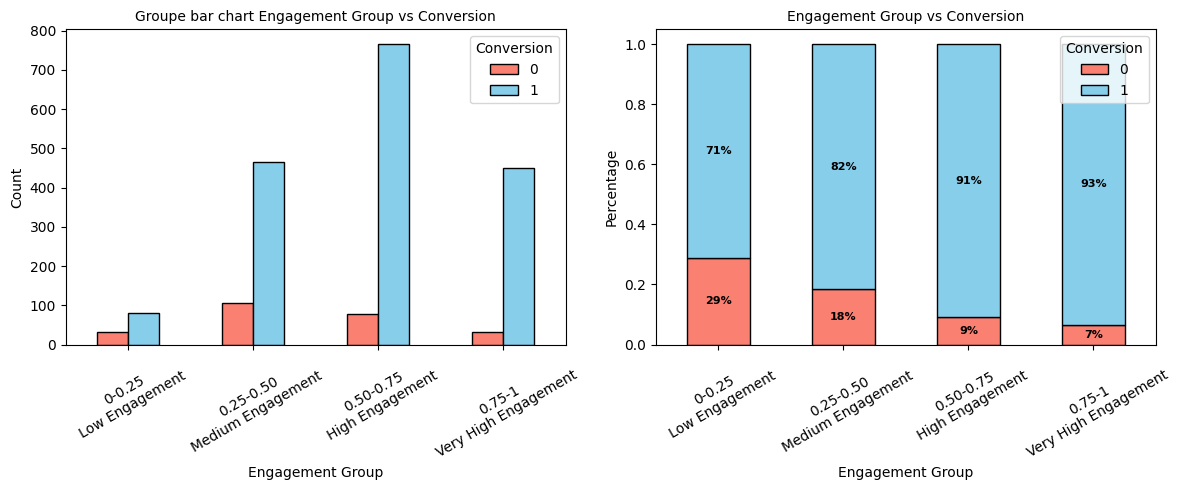

Test: Chi-square, p-value=3.2216e-15 → Reject H0


In [70]:
#Engagement_KPI
currColumn = 'Engagement Group'
bins = [0,0.25,0.50,0.75,1.01]
target = 'Conversion'

fig, axes = plt.subplots(1, 1, figsize=(12, 6))
#Count Plot
labels = ['0-0.25\nLow Engagement', '0.25-0.50\nMedium Engagement', '0.50-0.75\nHigh Engagement', '0.75-1\nVery High Engagement']
data[currColumn] = pd.cut(data['Engagement_KPI'], bins=bins,labels=labels, right=False)
sns.countplot(x=currColumn, data=data)
axes.set_title('Count of People by Engagement Group', fontweight = 'bold', fontsize = 15)
axes.set_xlabel('Engagement Group', fontsize = 13)
axes.set_ylabel('Count', fontsize = 13)
data[currColumn].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
grouped_bar_chart(data, currColumn, target, ax[0])
normalized_stacked_bar_chart(data, currColumn, target, ax[1])
plt.tight_layout()
plt.show()
hypothesis_test(data, currColumn, target, 0.05)

<span style="font-size: 18px;">
Conclusion:
As Engagement_KPI increases, the proportion of non-converting customers (conversion = 0, shown in red) decreases (descending flow), while conversions increase. The Chi-squared test confirms that this relationship is statistically significant. Therefore, our Engagement_KPI is a valid metric that captures customer engagement and has a meaningful relationship with the target variable (Conversion). so higher engagement → more conversions
</span>